In [1]:
import os
import pandas as pd

# Install libraries for special formats if not installed
try:
    import pyreadstat  # for .sav and .dta
except:
    !pip install pyreadstat
    import pyreadstat

folder = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella"

print("Scanning folder:", folder)
files = os.listdir(folder)

print("\nFiles found:")
for f in files:
    print(" -", f)

datasets = {}

print("\n\n=== LOADING DATASETS ===\n")

for file in files:
    path = os.path.join(folder, file)
    name = os.path.splitext(file)[0]
    ext = os.path.splitext(file)[1].lower()

    try:
        if ext == ".csv":
            print(f"Loading CSV: {file}")
            df = pd.read_csv(path, encoding="utf-8", errors="ignore")
            datasets[name] = df

        elif ext in [".xlsx", ".xls"]:
            print(f"Loading Excel file: {file}")
            df = pd.read_excel(path)
            datasets[name] = df

        elif ext == ".sav":
            print(f"Loading SPSS file: {file}")
            df, meta = pyreadstat.read_sav(path)
            datasets[name] = df

        elif ext == ".dta":
            print(f"Loading STATA file: {file}")
            df, meta = pyreadstat.read_dta(path)
            datasets[name] = df

        elif ext == ".zip":
            print(f"ZIP file detected: {file} — manually inspect or unzip if needed.")
            continue

        else:
            print(f"Skipping unsupported file: {file}")

    except Exception as e:
        print(f"Error loading {file}: {e}")

print("\n\n=== SUMMARY OF LOADED DATASETS ===\n")

for name, df in datasets.items():
    print("\n----------------------------------------------------")
    print(f"Dataset: {name}")
    print("Shape:", df.shape)
    print("Columns:", list(df.columns)[:20])  # show first few columns
    print(df.head())
    print("----------------------------------------------------\n")

print("\n\nDONE. Review the outputs above to identify which dataset contains:")
print(" - corruption perception variables")
print(" - trust in government variables")
print(" - local governance questions")
print(" - possible Kumasi/Ashanti-region identifiers")


   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------- ----- 2.1/2.4 MB 14.7 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 12.9 MB/s eta 0:00:00

  Attempting uninstall: narwhals

    Found existing installation: narwhals 1.31.0

    Uninstalling narwhals-1.31.0:

      Successfully uninstalled narwhals-1.31.0

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ----------------

In [2]:
# Check unique region codes from both datasets
print("Regions in data 1:")
print(datasets["data 1"]["REGION"].unique())

print("\nRegions in data 2:")
print(datasets["data 2"]["REGION"].unique())


Regions in data 1:
[265. 266. 270. 267. 269. 263. 260. 262. 271. 275. 261. 274. 272. 268.
 273. 264.]

Regions in data 2:
[274. 262. 263. 264. 275. 260. 267. 261. 266. 271. 270. 269. 265. 273.
 272. 268.]


In [3]:
ASHANTI_CODE = 267

ashanti1 = datasets["data 1"][datasets["data 1"]["REGION"] == ASHANTI_CODE].copy()
ashanti2 = datasets["data 2"][datasets["data 2"]["REGION"] == ASHANTI_CODE].copy()

print("Ashanti respondents in data 1:", ashanti1.shape)
print("Ashanti respondents in data 2:", ashanti2.shape)


Ashanti respondents in data 1: (424, 405)
Ashanti respondents in data 2: (421, 398)


In [4]:
# Identify corruption-related variables in data 1
corruption_cols = [c for c in ashanti1.columns 
                   if "corrupt" in c.lower() or "q70" in c.lower() 
                   or "bribe" in c.lower() or "q71" in c.lower()]

print("Corruption-related variables found:\n")
for col in corruption_cols:
    print(col)


Corruption-related variables found:

Q70A
Q70B
Q70C
Q71A
Q71B


In [5]:
keywords = [
    "gov", "trust", "perform", "q60", "q61", "q62", "q63", "q64",
    "service", "q100", "q101", "q102", "q103", "q104", "q105",
    "development", "local", "leaders", "lead"
]

governance_cols = [c for c in ashanti1.columns 
                   if any(k in c.lower() for k in keywords)]

print("Governance / Reform-related variables found:\n")
for col in governance_cols:
    print(col)


Governance / Reform-related variables found:

Q60A
Q60B
Q61A
Q61B
Q62A
Q62B
Q62C
Q62D
Q63A
Q63B
Q63C
Q63D
Q63E_GHA
Q63F_GHA
Q64A
Q64B
Q64C
Q64D
Q64E
Q100
Q101
Q102
Q102Other
Q103
Q104A
Q104B
Q104C
Q104D
Q104E


In [6]:
import pandas as pd
import os

# Define path
save_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data.csv"

# Corruption variables
corruption_vars = ["Q70A", "Q70B", "Q70C", "Q71A", "Q71B"]

# Governance / reform variables
governance_vars = [
    "Q60A","Q60B","Q61A","Q61B","Q62A","Q62B","Q62C","Q62D",
    "Q63A","Q63B","Q63C","Q63D","Q63E_GHA","Q63F_GHA",
    "Q64A","Q64B","Q64C","Q64D","Q64E",
    "Q100","Q101","Q102","Q102Other","Q103",
    "Q104A","Q104B","Q104C","Q104D","Q104E"
]

# Core identifiers
id_vars = ["RESPNO", "REGION", "URBRUR"]

# Combine all needed variables
selected_vars = id_vars + corruption_vars + governance_vars

# Extract only Ashanti region respondents (from data 1)
ASHANTI_CODE = 267
final_df = ashanti1[selected_vars].copy()

# Save dataset
final_df.to_csv(save_path, index=False, encoding="utf-8")

print("Final_Dataset created and saved at:")
print(save_path)
print("\nShape of final dataset:", final_df.shape)
print("Columns included:\n", list(final_df.columns))


Final_Dataset created and saved at:
C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data.csv

Shape of final dataset: (424, 37)
Columns included:
 ['RESPNO', 'REGION', 'URBRUR', 'Q70A', 'Q70B', 'Q70C', 'Q71A', 'Q71B', 'Q60A', 'Q60B', 'Q61A', 'Q61B', 'Q62A', 'Q62B', 'Q62C', 'Q62D', 'Q63A', 'Q63B', 'Q63C', 'Q63D', 'Q63E_GHA', 'Q63F_GHA', 'Q64A', 'Q64B', 'Q64C', 'Q64D', 'Q64E', 'Q100', 'Q101', 'Q102', 'Q102Other', 'Q103', 'Q104A', 'Q104B', 'Q104C', 'Q104D', 'Q104E']


In [7]:
import pyreadstat

# Load the .sav file with metadata (labels)
sav_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\data 1.sav"
df_raw, meta = pyreadstat.read_sav(sav_path, apply_value_formats=False)

# Extract value labels
value_labels = meta.variable_value_labels

print("=== VALUE LABELS FOUND IN FILE ===\n")
for var, labels in value_labels.items():
    print(var, labels)


=== VALUE LABELS FOUND IN FILE ===

URBRUR {1.0: 'Urban', 2.0: 'Rural'}
REGION {260.0: 'WESTERN', 261.0: 'WESTERN NORTH', 262.0: 'CENTRAL', 263.0: 'GREATER ACCRA', 264.0: 'VOLTA', 265.0: 'OTI', 266.0: 'EASTERN', 267.0: 'ASHANTI', 268.0: 'AHAFO', 269.0: 'BONO', 270.0: 'BONO EAST', 271.0: 'NORTHERN', 272.0: 'SAVANNAH', 273.0: 'NORTH EAST', 274.0: 'UPPER EAST', 275.0: 'UPPER WEST'}
EA_SVC_A {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_SVC_B {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_SVC_C {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_SVC_D {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_SVC_E {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_FAC_A {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_FAC_B {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_FAC_C {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_FAC_D {-1.0: 'Missing',

In [8]:
import pyreadstat

sav_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\data 1.sav"

df_raw, meta = pyreadstat.read_sav(sav_path, apply_value_formats=False)

value_labels = meta.variable_value_labels

print("=== VALUE LABELS FOUND ===\n")
for var, labels in value_labels.items():
    print(var, labels)


=== VALUE LABELS FOUND ===

URBRUR {1.0: 'Urban', 2.0: 'Rural'}
REGION {260.0: 'WESTERN', 261.0: 'WESTERN NORTH', 262.0: 'CENTRAL', 263.0: 'GREATER ACCRA', 264.0: 'VOLTA', 265.0: 'OTI', 266.0: 'EASTERN', 267.0: 'ASHANTI', 268.0: 'AHAFO', 269.0: 'BONO', 270.0: 'BONO EAST', 271.0: 'NORTHERN', 272.0: 'SAVANNAH', 273.0: 'NORTH EAST', 274.0: 'UPPER EAST', 275.0: 'UPPER WEST'}
EA_SVC_A {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_SVC_B {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_SVC_C {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_SVC_D {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_SVC_E {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_FAC_A {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_FAC_B {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_FAC_C {-1.0: 'Missing', 0.0: 'No', 1.0: 'Yes', 9.0: "Can't determine"}
EA_FAC_D {-1.0: 'Missing', 0.0: 'N

In [9]:
import pyreadstat

sav_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\data 1.sav"

df_raw, meta = pyreadstat.read_sav(sav_path, apply_value_formats=False)

value_labels = meta.variable_value_labels

output_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\value_labels_output.txt"

with open(output_path, "w", encoding="utf-8") as f:
    for var, labels in value_labels.items():
        f.write(f"{var}: {labels}\n")

print("File saved at:", output_path)



File saved at: C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\value_labels_output.txt


In [10]:
import pandas as pd

# Load your final dataset
path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data.csv"
df = pd.read_csv(path)

# Summary statistics for numeric variables
summary_stats = df.describe().T

# Add number of missing values
summary_stats["missing"] = df.isna().sum()

print(summary_stats)

# Save summary table
save_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Summary_Statistics.csv"
summary_stats.to_csv(save_path)
print("\nSummary statistics saved to:", save_path)


          count        mean         std    min    25%    50%     75%     max  \
REGION    424.0  267.000000    0.000000  267.0  267.0  267.0  267.00   267.0   
URBRUR    424.0    1.358491    0.480124    1.0    1.0    1.0    2.00     2.0   
Q70A      424.0    4.160377    2.223395    1.0    3.0    4.0    4.25     9.0   
Q70B      424.0    4.294811    2.127246    1.0    3.0    4.0    5.00     9.0   
Q70C      424.0    4.603774    2.004389    1.0    4.0    4.0    5.00     9.0   
Q71A      424.0    1.891509    1.420060    0.0    0.0    3.0    3.00     9.0   
Q71B      424.0   30.988208   41.553433    2.0    5.0    5.0   97.00    99.0   
Q60A      424.0    0.471698    0.648075    0.0    0.0    0.0    1.00     9.0   
Q60B      424.0    5.528302    1.861429    1.0    4.0    7.0    7.00     9.0   
Q61A      424.0    4.547170    2.825524    1.0    1.0    7.0    7.00     9.0   
Q61B      424.0    4.525943    2.829979    1.0    1.0    7.0    7.00     9.0   
Q62A      424.0    5.603774    1.774147 

In [11]:
import pandas as pd

path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data.csv"
df = pd.read_csv(path)

# Function for frequency + percent table
def freq_table(series):
    tbl = series.value_counts(dropna=False).sort_index()
    percent = round((tbl / tbl.sum()) * 100, 2)
    return pd.DataFrame({"Count": tbl, "Percent": percent})

# Generate summary for all variables except RESPNO
summary = {}

for col in df.columns:
    if col != "RESPNO":
        summary[col] = freq_table(df[col])

# Save all tables into a single Excel file
save_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Categorical_Summary.xlsx"
with pd.ExcelWriter(save_path) as writer:
    for col, table in summary.items():
        table.to_excel(writer, sheet_name=col)

print("Categorical summary tables saved to:", save_path)


Categorical summary tables saved to: C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Categorical_Summary.xlsx


In [12]:
import pandas as pd
import re
import ast

# Paths
data_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data.csv"
labels_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\value_labels_output.txt"
save_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data_Labeled.csv"

# Load the data
df = pd.read_csv(data_path)

# -----------------------------
# STEP 1: Read the value label file
# -----------------------------
label_dict = {}

with open(labels_path, "r", encoding="utf-8") as f:
    for line in f:
        # Example line: Q70A: {1: 'Not corrupt', 2: 'Somewhat corrupt'}
        if ":" in line:
            var, mapping = line.split(":", 1)
            var = var.strip()
            mapping = mapping.strip()

            try:
                mapping_dict = ast.literal_eval(mapping)
                label_dict[var] = mapping_dict
            except:
                pass  # skip malformed lines

# -----------------------------
# STEP 2: Decode variables
# -----------------------------
decoded_df = df.copy()

for col in df.columns:
    if col in label_dict:   # Only decode columns with known labels
        new_col_name = col + "_label"
        decoded_df[new_col_name] = df[col].map(label_dict[col])

# -----------------------------
# STEP 3: Save final labeled dataset
# -----------------------------
decoded_df.to_csv(save_path, index=False, encoding="utf-8")

print("Final labeled dataset created and saved at:")
print(save_path)

print("\nShape:", decoded_df.shape)
print("Sample columns:", decoded_df.columns[:20])


Final labeled dataset created and saved at:
C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data_Labeled.csv

Shape: (424, 72)
Sample columns: Index(['RESPNO', 'REGION', 'URBRUR', 'Q70A', 'Q70B', 'Q70C', 'Q71A', 'Q71B',
       'Q60A', 'Q60B', 'Q61A', 'Q61B', 'Q62A', 'Q62B', 'Q62C', 'Q62D', 'Q63A',
       'Q63B', 'Q63C', 'Q63D'],
      dtype='object')


In [18]:
import pandas as pd

# Load labeled data
path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data_Labeled.csv"
df = pd.read_csv(path)

# Only include *_label columns (human-readable)
label_cols = [c for c in df.columns if c.endswith("_label")]

# Function: frequency + percentage
def freq_table(series):
    tbl = series.value_counts(dropna=False)
    percent = round((tbl / tbl.sum()) * 100, 2)
    return pd.DataFrame({"Count": tbl, "Percent": percent})

# Generate tables
summary_tables = {}

for col in label_cols:
    summary_tables[col] = freq_table(df[col])

# Save to Excel
save_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Summary_Tables.xlsx"
with pd.ExcelWriter(save_path) as writer:
    for col, table in summary_tables.items():
        table.to_excel(writer, sheet_name=col[:30])  # sheet name limit 31 chars

print("Summary tables saved at:")
print(save_path)


Summary tables saved at:
C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Summary_Tables.xlsx


In [19]:
import pandas as pd

# Load the labeled dataset
path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data_Labeled.csv"
df = pd.read_csv(path)

# Select all human-readable columns
label_cols = [c for c in df.columns if c.endswith("_label")]

# Function for frequency + percentage
def freq_table(series):
    tbl = series.value_counts(dropna=False)
    percent = round((tbl / tbl.sum()) * 100, 2)
    return pd.DataFrame({"Count": tbl, "Percent": percent})

# Print summary for each variable
for col in label_cols:
    print("\n" + "="*60)
    print(f"SUMMARY TABLE FOR: {col}")
    print("="*60)
    print(freq_table(df[col]))



SUMMARY TABLE FOR: REGION_label
              Count  Percent
REGION_label                
ASHANTI         424    100.0

SUMMARY TABLE FOR: URBRUR_label
              Count  Percent
URBRUR_label                
Urban           272    64.15
Rural           152    35.85

SUMMARY TABLE FOR: Q70A_label
                                        Count  Percent
Q70A_label                                            
Agree                                     193    45.52
Disagree                                   61    14.39
Don't know/Haven't heard enough to say     57    13.44
Strongly agree                             49    11.56
Strongly disagree                          40     9.43
Neither Agree nor disagree                 24     5.66

SUMMARY TABLE FOR: Q70B_label
                                        Count  Percent
Q70B_label                                            
Agree                                     179    42.22
Strongly agree                             81    19.10
Don't kno

In [22]:
import pyreadstat

sav_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\data 1.sav"

df_raw, meta = pyreadstat.read_sav(sav_path, apply_value_formats=False)

# List of variable names
var_names = meta.column_names

# List of variable labels (same order as var_names)
var_labels = meta.column_labels

print("VARIABLE LABELS:\n")

for name, label in zip(var_names, var_labels):
    print(name, ":", label)


VARIABLE LABELS:

RESPNO : Respondent number
URBRUR : Urban or Rural Primary Sampling Unit
REGION : Province or region
LOCATION.LEVEL.1 : District Name
EA_SVC_A : EA-SVC-A. Electricity grid in the PSU/EA
EA_SVC_B : EA-SVC-B. Piped water system in the PSU/EA
EA_SVC_C : EA-SVC-C. Sewage system in the PSU/EA
EA_SVC_D : EA-SVC-D. Mobile phone service in the PSU/EA
EA_SVC_E : EA-SVC-E.  Borehole or tubewell in PSU/EA
EA_FAC_A : EA-FAC-A. Post office in the PSU/EA
EA_FAC_B : EA-FAC-B. School in the PSU/EA
EA_FAC_C : EA-FAC-C. Police station in the PSU/EA
EA_FAC_D : EA-FAC-D. Health Clinic in the PSU/EA
EA_FAC_E : EA-FAC-E. Market stalls in the PSU/EA
EA_FAC_F : EA-FAC-F. Bank or money services in the PSU/EA
EA_FAC_F2 : EA-FAC-F2. Social/govt center/office in PSU/EA
EA_FAC_G : EA-FAC-G. Paid transport in the PSU/EA
EA_SEC_A : EA-SEC-A. Police in the PSU/EA
EA_SEC_B : EA-SEC-B. Soldiers/army in the PSU/EA
EA_SEC_C : EA-SEC-C. Roadblocks by police/army in the PSU/EA
EA_SEC_D : EA-SEC-D. Customs

In [24]:
import pyreadstat
import pandas as pd

sav_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\data 1.sav"
df_raw, meta = pyreadstat.read_sav(sav_path, apply_value_formats=False)

# dict: SPSS variable name -> SPSS variable label (question text)
varname_to_label = dict(zip(meta.column_names, meta.column_labels))


In [25]:
csv_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data_Labeled.csv"
df = pd.read_csv(csv_path)

# find columns that look like "question_label"
label_cols = [c for c in df.columns if c.endswith("_label")]

# create mapping: csv column -> readable question text
rename_map = {}
for col in label_cols:
    base = col[:-6]  # removes "_label"
    if base in varname_to_label and varname_to_label[base]:
        readable = varname_to_label[base]
    elif col in varname_to_label and varname_to_label[col]:
        # sometimes the sav var could already include the suffix
        readable = varname_to_label[col]
    else:
        # fallback: keep original name but mark not found
        readable = f"{col} (no label found)"
    rename_map[col] = readable

# Inspect the mapping for verification
for k, v in rename_map.items():
    print(f"{k}  ->  {v}")

# If you are happy with the mapping, rename the dataframe columns:
df_renamed = df.rename(columns=rename_map)
# now df_renamed has human-readable headers for the _label cols


REGION_label  ->  Province or region
URBRUR_label  ->  Urban or Rural Primary Sampling Unit
Q70A_label  ->  Q70a. Regional organisation recognizes our country's needs/interests
Q70B_label  ->  Q70b. African Union recognizes our country's needs/interests
Q70C_label  ->  Q70c. African countries should have greater influence in international bodies
Q71A_label  ->  Q71a. Considered emigration to other country
Q71B_label  ->  Q71b. Most likely country for emigration
Q60A_label  ->  Q60a. Heard about climate change
Q60B_label  ->  Q60b. Climate change: affecting country
Q61A_label  ->  Q61a. Climate change: main cause
Q61B_label  ->  Q61b. Main responsibility for causing climate change
Q62A_label  ->  Q62a. Government must act now to limit climate change
Q62B_label  ->  Q62b. Rich countries must act now to limit climate change
Q62C_label  ->  Q62c. Rich countries should contribute to climate adaptation costs
Q62D_label  ->  Q62d. Who primarily responsible for limiting climate change
Q63A_lab

In [26]:
# pick a variable base name, e.g. Q71A
base_var = "Q71A"  # change to the variable you want to inspect

# Try a couple of possible attributes for value labels
value_labels = {}
if hasattr(meta, "variable_value_labels"):
    # this is often a dict mapping variable name -> {code: label, ...}
    value_labels = getattr(meta, "variable_value_labels")
elif hasattr(meta, "value_labels"):
    # sometimes it's available under value_labels
    value_labels = getattr(meta, "value_labels")

vl = value_labels.get(base_var, {})
print(f"Value labels for {base_var}:")
print(vl)


Value labels for Q71A:
{-1.0: 'Missing', 0.0: 'Not at all', 1.0: 'A little bit', 2.0: 'Somewhat', 3.0: 'A lot', 8.0: 'Don’t know', 9.0: 'Refused to answer'}


In [27]:
print(varname_to_label["Q71A"])


Q71a. Considered emigration to other country


In [29]:
# ================================================================
# PUBLIC OPINION ON CORRUPTION & GOVERNMENT REFORM – FULL ANALYSIS
# ================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ----------------------------
# LOAD DATA
# ----------------------------
path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data_Labeled.csv"
df = pd.read_csv(path)

# Create output folder
output_dir = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Figures"
os.makedirs(output_dir, exist_ok=True)

# ----------------------------
# IDENTIFY LABEL VARIABLES
# ----------------------------
label_cols = [c for c in df.columns if c.endswith("_label")]

print("FOUND LABEL VARIABLES:")
print(label_cols)

# ----------------------------
# SUMMARY TABLE FUNCTION
# ----------------------------
def freq_table(series):
    tbl = series.value_counts(dropna=False)
    percent = round((tbl / tbl.sum()) * 100, 2)
    return pd.DataFrame({"Count": tbl, "Percent": percent})

# ----------------------------
# GENERATE SUMMARY TABLES
# ----------------------------
summary_tables = {}

for col in label_cols:
    print("\n===========================")
    print(f"SUMMARY FOR: {col}")
    print("===========================\n")
    table = freq_table(df[col])
    summary_tables[col] = table
    print(table)


   

FOUND LABEL VARIABLES:
['REGION_label', 'URBRUR_label', 'Q70A_label', 'Q70B_label', 'Q70C_label', 'Q71A_label', 'Q71B_label', 'Q60A_label', 'Q60B_label', 'Q61A_label', 'Q61B_label', 'Q62A_label', 'Q62B_label', 'Q62C_label', 'Q62D_label', 'Q63A_label', 'Q63B_label', 'Q63C_label', 'Q63D_label', 'Q63E_GHA_label', 'Q63F_GHA_label', 'Q64A_label', 'Q64B_label', 'Q64C_label', 'Q64D_label', 'Q64E_label', 'Q100_label', 'Q101_label', 'Q102_label', 'Q103_label', 'Q104A_label', 'Q104B_label', 'Q104C_label', 'Q104D_label', 'Q104E_label']

SUMMARY FOR: REGION_label

              Count  Percent
REGION_label                
ASHANTI         424    100.0

SUMMARY FOR: URBRUR_label

              Count  Percent
URBRUR_label                
Urban           272    64.15
Rural           152    35.85

SUMMARY FOR: Q70A_label

                                        Count  Percent
Q70A_label                                            
Agree                                     193    45.52
Disagree           

In [30]:
import pyreadstat
import pandas as pd
import os

# ---- PATHS ----
csv_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data_Labeled.csv"
sav_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\data 1.sav"
output_folder = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\SummaryTables"
os.makedirs(output_folder, exist_ok=True)

# ---- LOAD SPSS METADATA ----
df_raw, meta = pyreadstat.read_sav(sav_path, apply_value_formats=False)

# Dict: SPSS variable → question label
varname_to_label = dict(zip(meta.column_names, meta.column_labels))


In [31]:
df = pd.read_csv(csv_path)


In [32]:
label_cols = [c for c in df.columns if c.endswith("_label")]

rename_map = {}

for col in label_cols:
    base = col[:-6]  # remove "_label"
    if base in varname_to_label and varname_to_label[base]:
        rename_map[col] = varname_to_label[base]
    else:
        rename_map[col] = col  # fallback

# APPLY RENAME
df_renamed = df.rename(columns=rename_map)

print("COLUMN RENAME COMPLETE!")
print(rename_map)


COLUMN RENAME COMPLETE!
{'REGION_label': 'Province or region', 'URBRUR_label': 'Urban or Rural Primary Sampling Unit', 'Q70A_label': "Q70a. Regional organisation recognizes our country's needs/interests", 'Q70B_label': "Q70b. African Union recognizes our country's needs/interests", 'Q70C_label': 'Q70c. African countries should have greater influence in international bodies', 'Q71A_label': 'Q71a. Considered emigration to other country', 'Q71B_label': 'Q71b. Most likely country for emigration', 'Q60A_label': 'Q60a. Heard about climate change', 'Q60B_label': 'Q60b. Climate change: affecting country', 'Q61A_label': 'Q61a. Climate change: main cause', 'Q61B_label': 'Q61b. Main responsibility for causing climate change', 'Q62A_label': 'Q62a. Government must act now to limit climate change', 'Q62B_label': 'Q62b. Rich countries must act now to limit climate change', 'Q62C_label': 'Q62c. Rich countries should contribute to climate adaptation costs', 'Q62D_label': 'Q62d. Who primarily responsibl

In [33]:
def summary_table(series):
    tbl = series.value_counts(dropna=False)
    pct = (tbl / tbl.sum() * 100).round(2)
    return pd.DataFrame({"Count": tbl, "Percent": pct})

# LOOP AND SAVE
for col in rename_map.values():   # readable names
    table = summary_table(df_renamed[col])
    safe_name = col.replace("/", "_").replace("?", "").replace(":", "").replace("*", "")
    save_path = os.path.join(output_folder, f"{safe_name}.csv")
    table.to_csv(save_path)
    print(f"Saved: {save_path}")


Saved: C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\SummaryTables\Province or region.csv
Saved: C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\SummaryTables\Urban or Rural Primary Sampling Unit.csv
Saved: C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\SummaryTables\Q70a. Regional organisation recognizes our country's needs_interests.csv
Saved: C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\SummaryTables\Q70b. African Union recognizes our country's needs_interests.csv
Saved: C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\SummaryTables\Q70c. African countries should have greater influence in international bodies.csv
Saved: C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\SummaryTables\Q71a. Considered emigration to other country.csv
Saved: C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\SummaryTables\Q71b. Most likely country for emigration.csv
Saved: C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\SummaryTables\Q60a. Heard about climate change.csv
Saved: C:\Users\PC\OneDri

In [34]:
import pandas as pd
import pyreadstat

# -----------------------------
# PATHS
# -----------------------------
csv_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data_Labeled.csv"
sav_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\data 1.sav"

# -----------------------------
# LOAD METADATA FROM SPSS
# -----------------------------
df_raw, meta = pyreadstat.read_sav(sav_path, apply_value_formats=False)

# Mapping: variable name → full question label
varname_to_label = dict(zip(meta.column_names, meta.column_labels))

# -----------------------------
# LOAD YOUR LABELED CSV
# -----------------------------
df = pd.read_csv(csv_path)

# -----------------------------
# FIND COLUMNS ENDING IN "_label"
# -----------------------------
label_cols = [c for c in df.columns if c.endswith("_label")]

# -----------------------------
# BUILD RENAME MAP (Q62D_label → Full Question Text)
# -----------------------------
rename_map = {}

for col in label_cols:
    base = col[:-6]        # remove "_label"
    if base in varname_to_label and varname_to_label[base]:
        rename_map[col] = varname_to_label[base]     # full question text
    else:
        rename_map[col] = col                       # fallback

# -----------------------------
# APPLY RENAME
# -----------------------------
df_readable = df.rename(columns=rename_map)

# -----------------------------
# SUMMARY TABLE FUNCTION
# -----------------------------
def summary_table(series):
    tbl = series.value_counts(dropna=False)
    pct = (tbl / tbl.sum() * 100).round(2)
    return pd.DataFrame({"Count": tbl, "Percent (%)": pct})

# -----------------------------
# PRINT SUMMARY TABLES
# -----------------------------
for old, new in rename_map.items():
    print("\n" + "="*70)
    print(f"SUMMARY FOR: {new}")
    print("="*70)
    print(summary_table(df_readable[new]))



SUMMARY FOR: Province or region
                    Count  Percent (%)
Province or region                    
ASHANTI               424        100.0

SUMMARY FOR: Urban or Rural Primary Sampling Unit
                                      Count  Percent (%)
Urban or Rural Primary Sampling Unit                    
Urban                                   272        64.15
Rural                                   152        35.85

SUMMARY FOR: Q70a. Regional organisation recognizes our country's needs/interests
                                                    Count  Percent (%)
Q70a. Regional organisation recognizes our coun...                    
Agree                                                 193        45.52
Disagree                                               61        14.39
Don't know/Haven't heard enough to say                 57        13.44
Strongly agree                                         49        11.56
Strongly disagree                                      40     


📊 Generating charts for:
Province or region



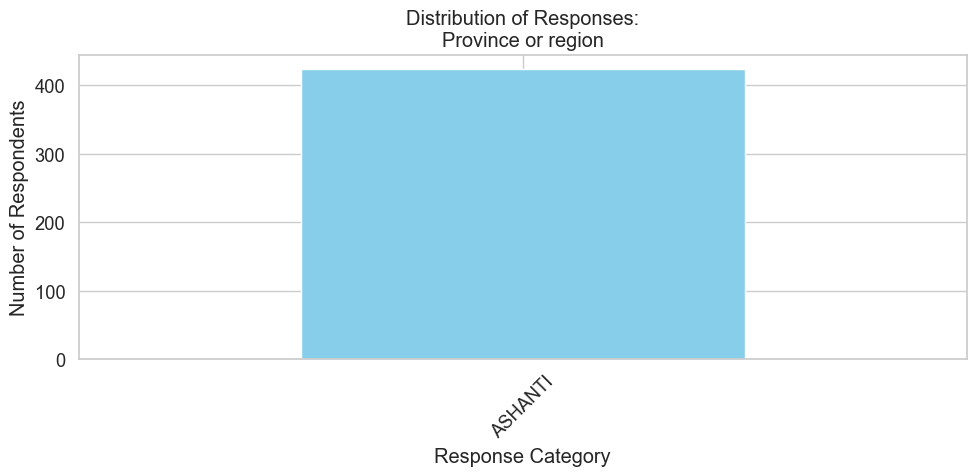

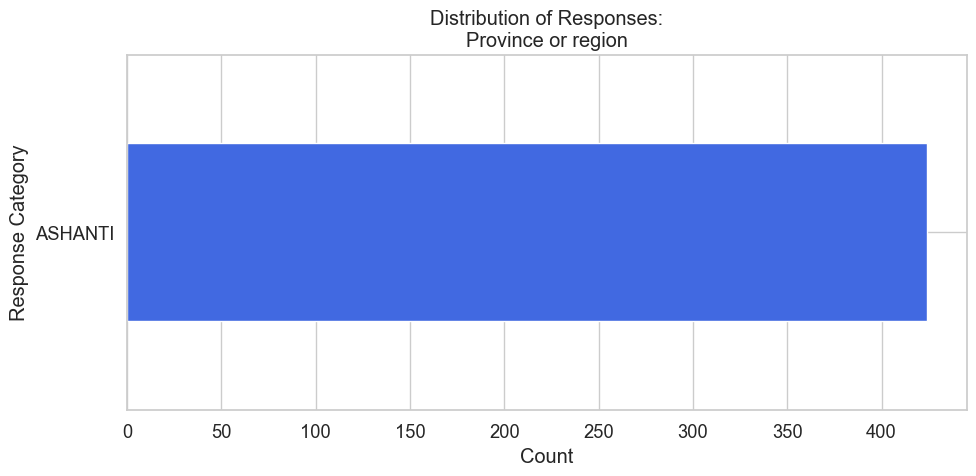

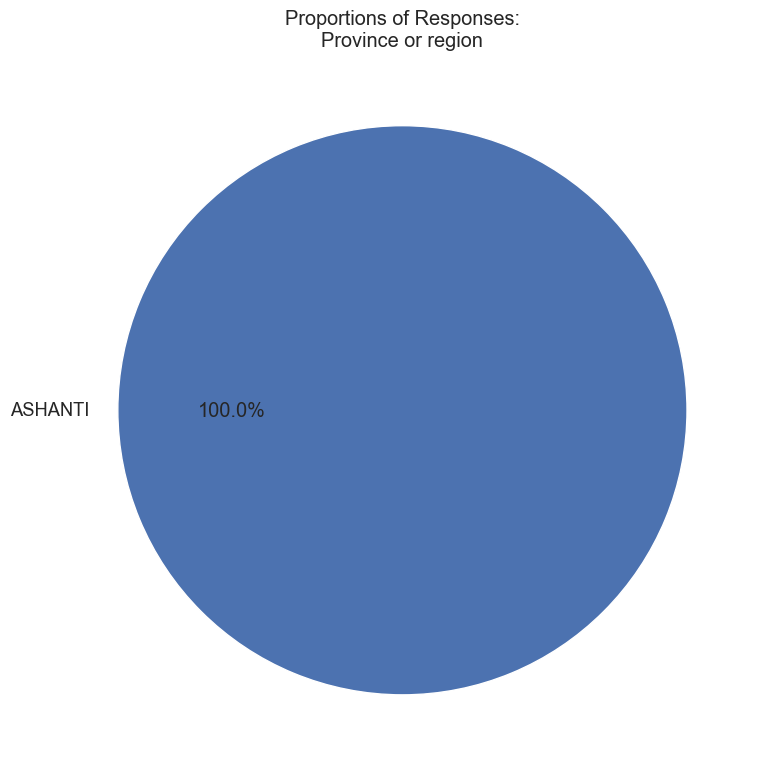


📊 Generating charts for:
Urban or Rural Primary Sampling Unit



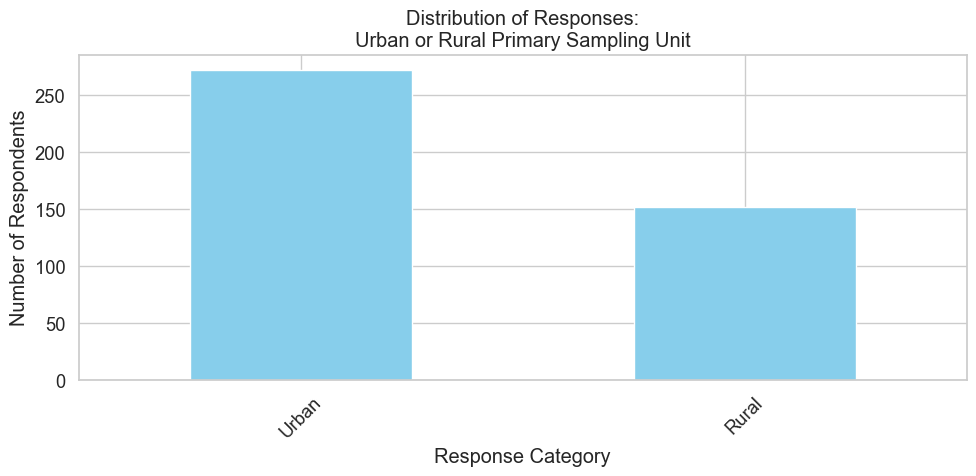

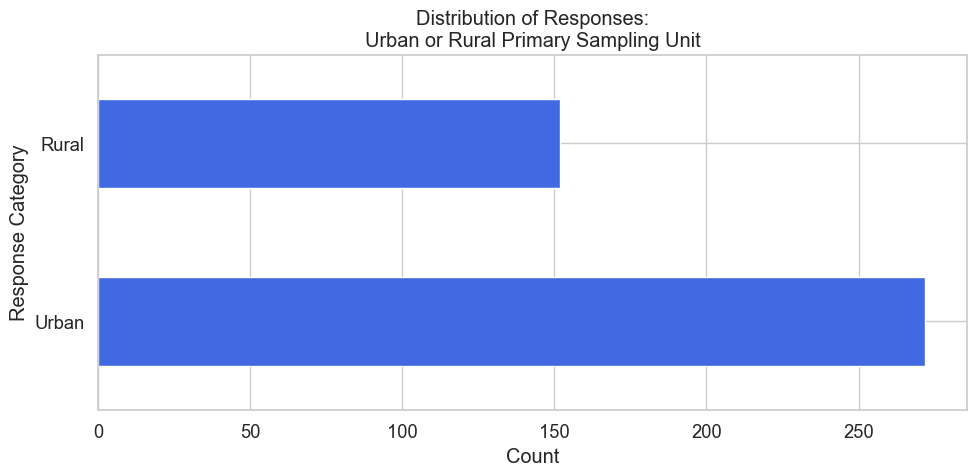

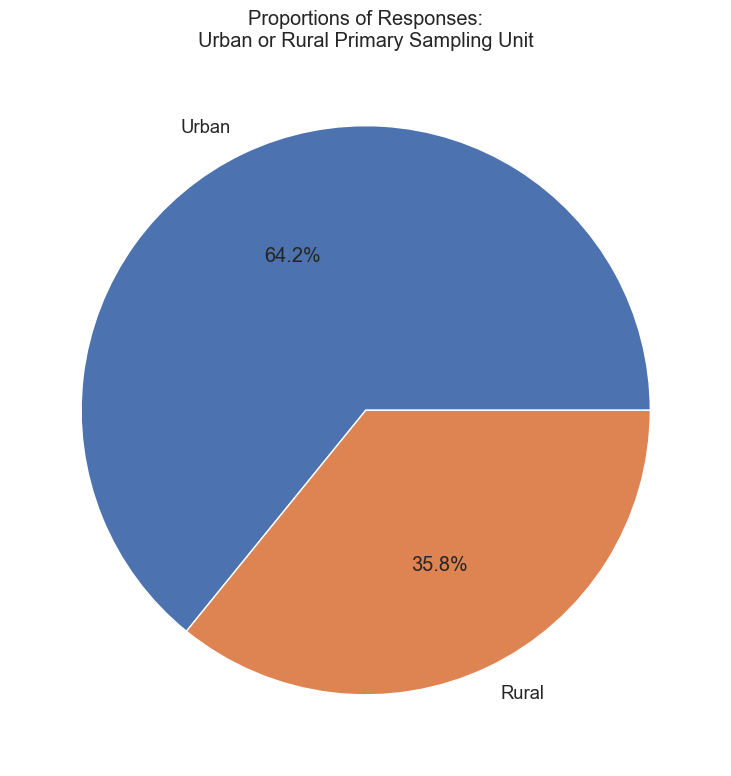


📊 Generating charts for:
Q70a. Regional organisation recognizes our country's needs/interests



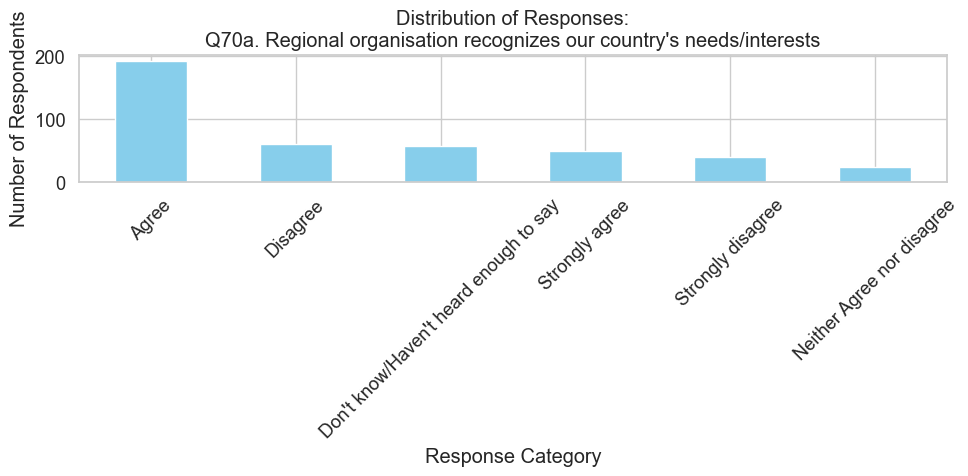

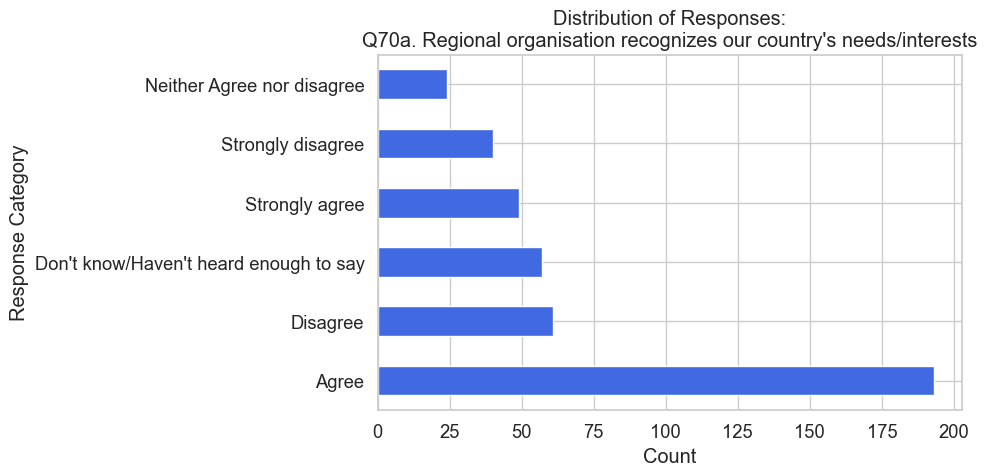

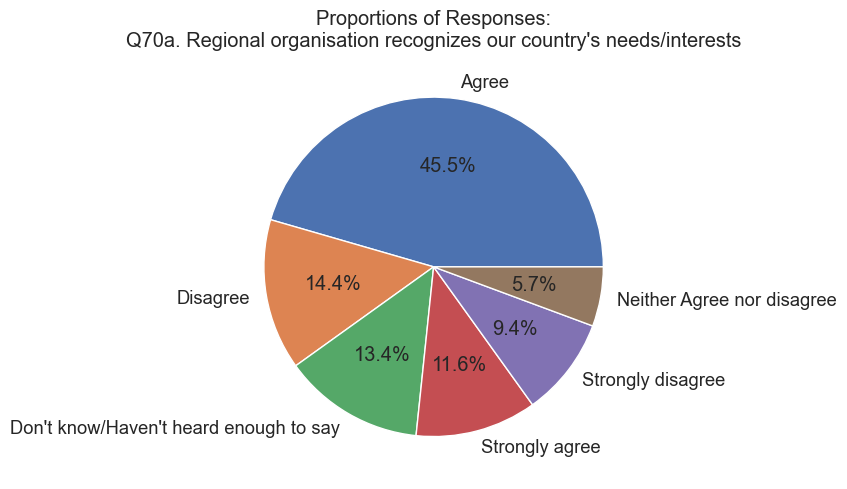


📊 Generating charts for:
Q70b. African Union recognizes our country's needs/interests



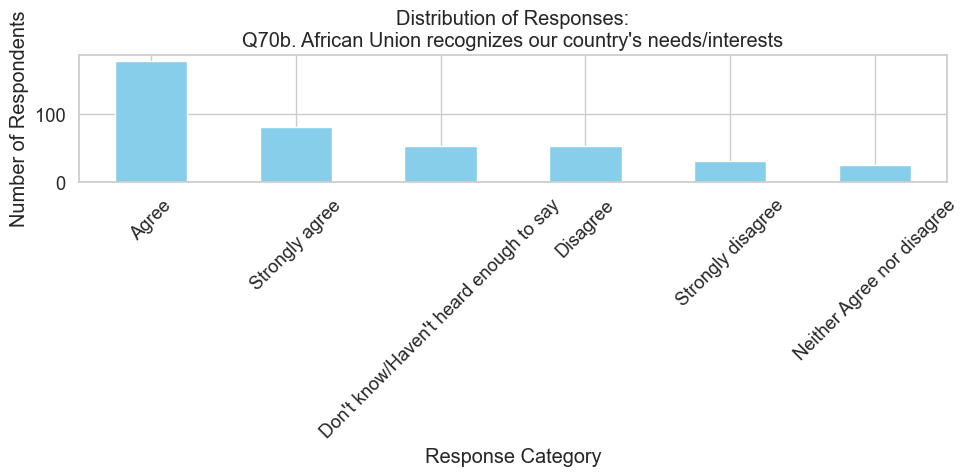

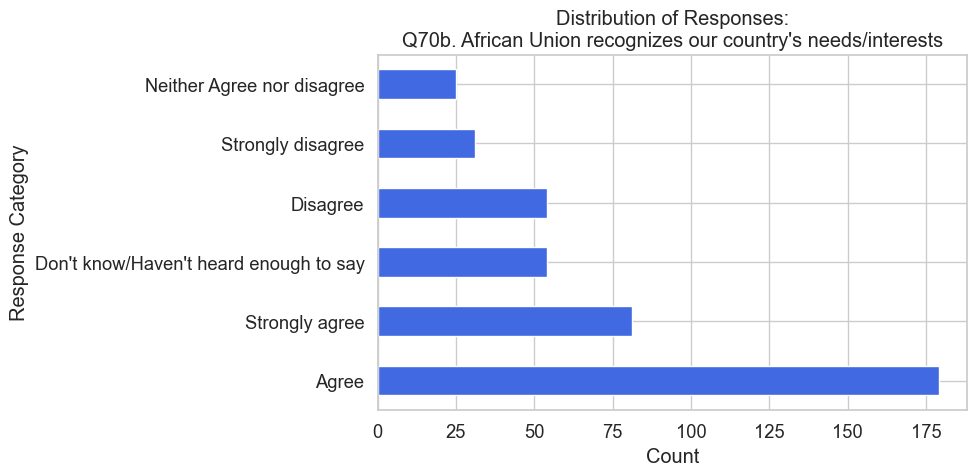

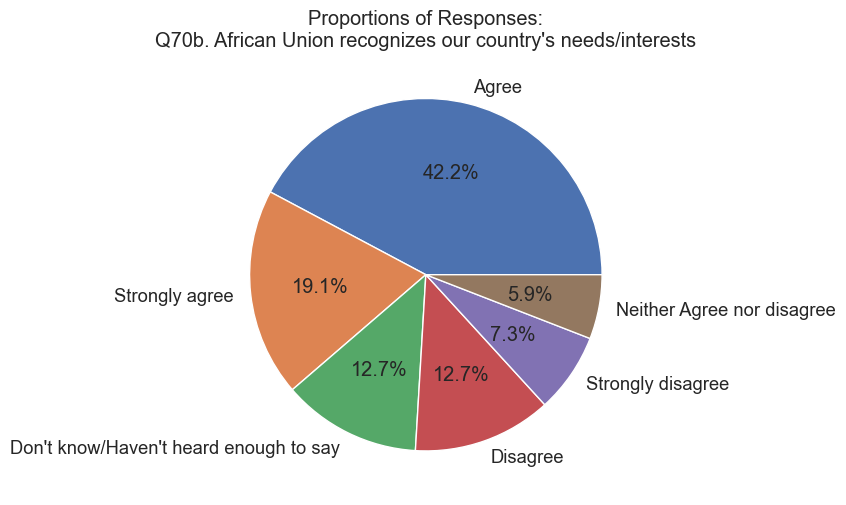


📊 Generating charts for:
Q70c. African countries should have greater influence in international bodies



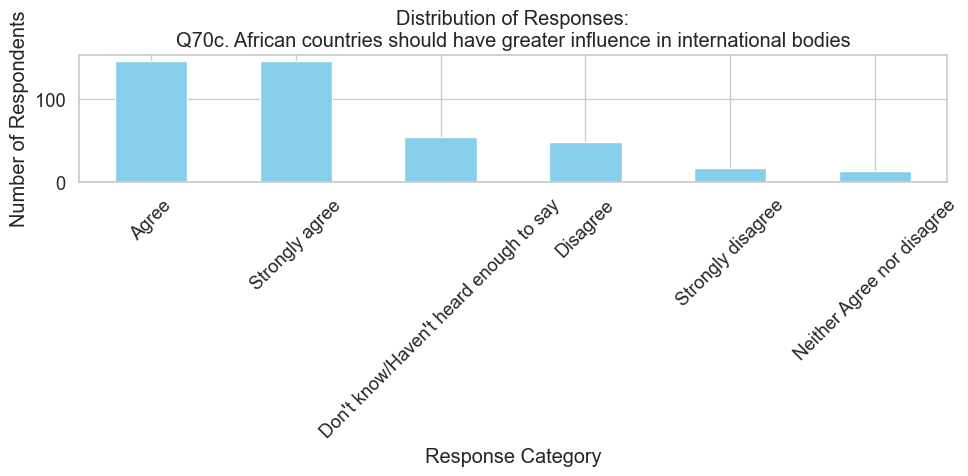

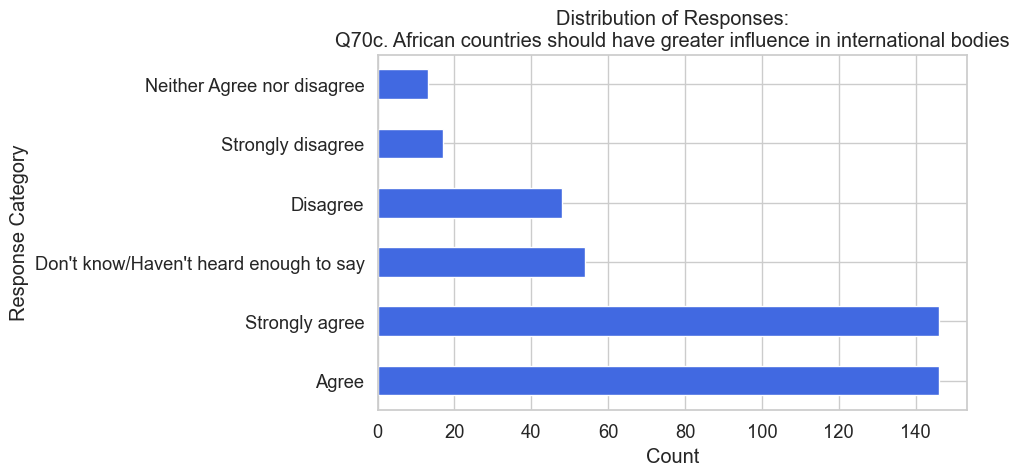

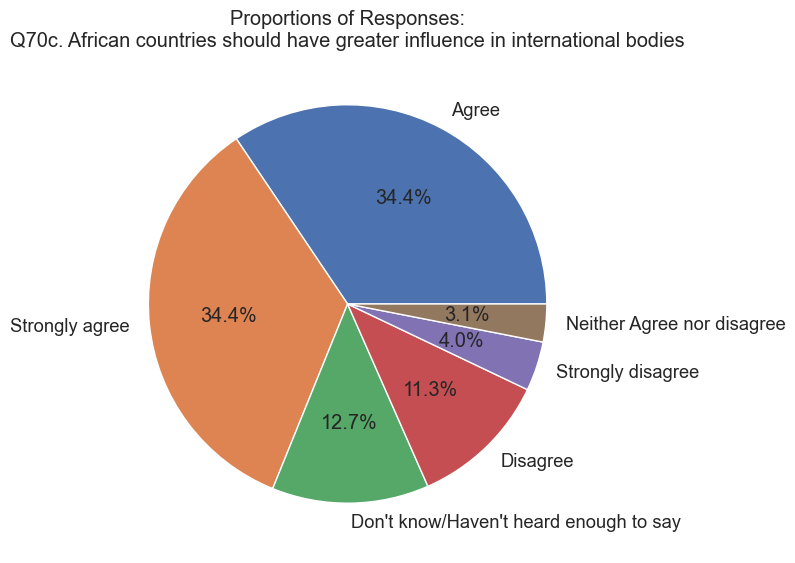


📊 Generating charts for:
Q71a. Considered emigration to other country



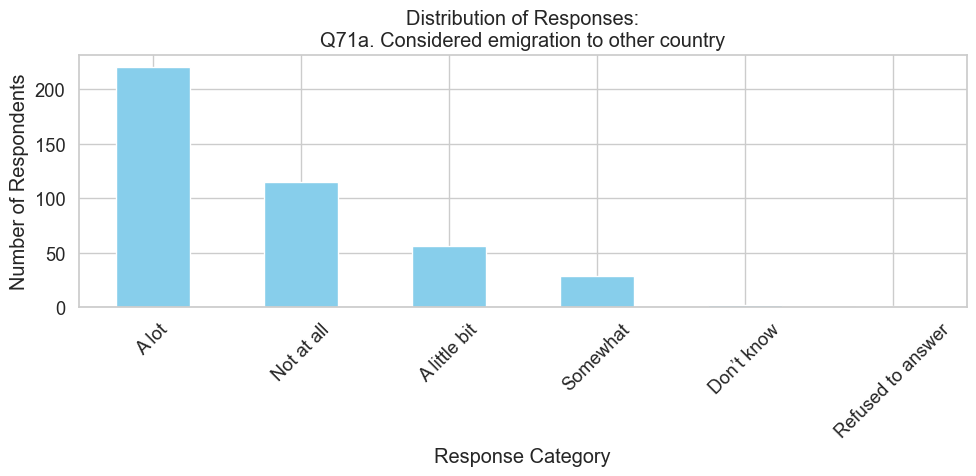

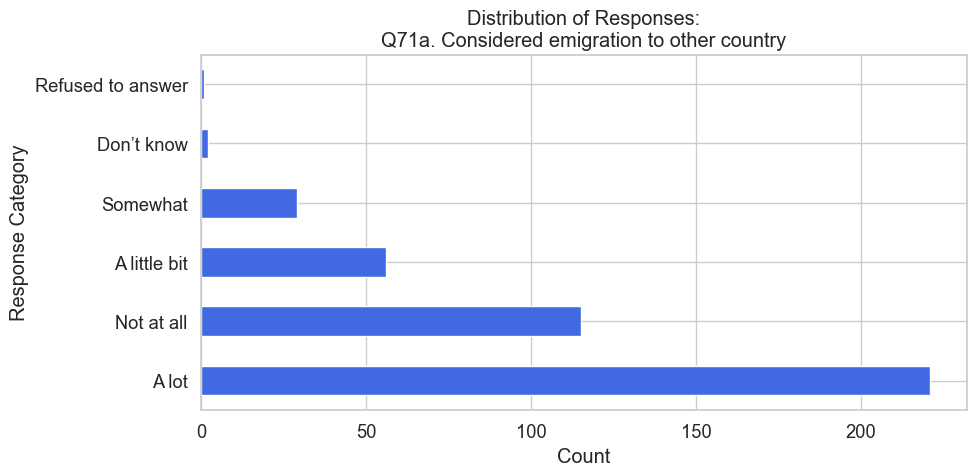

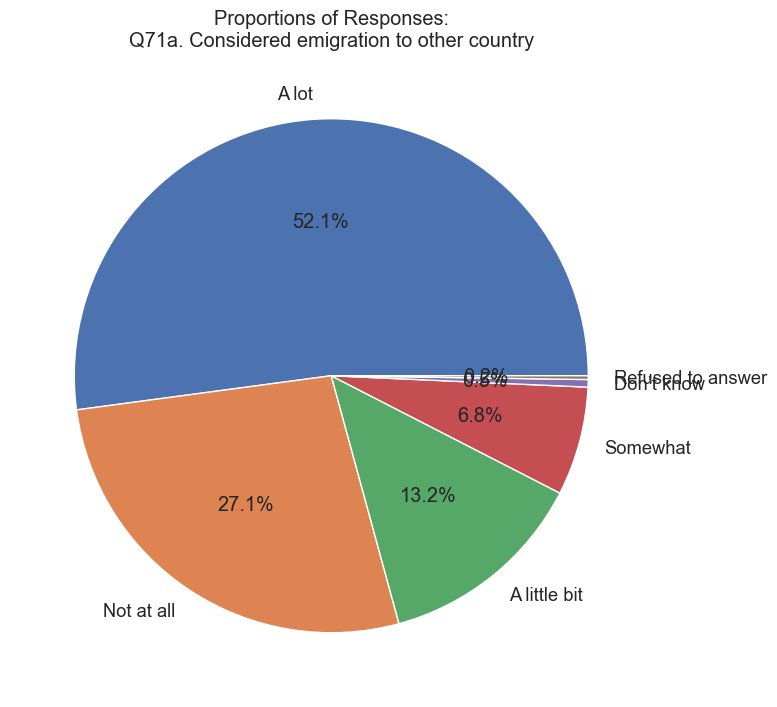

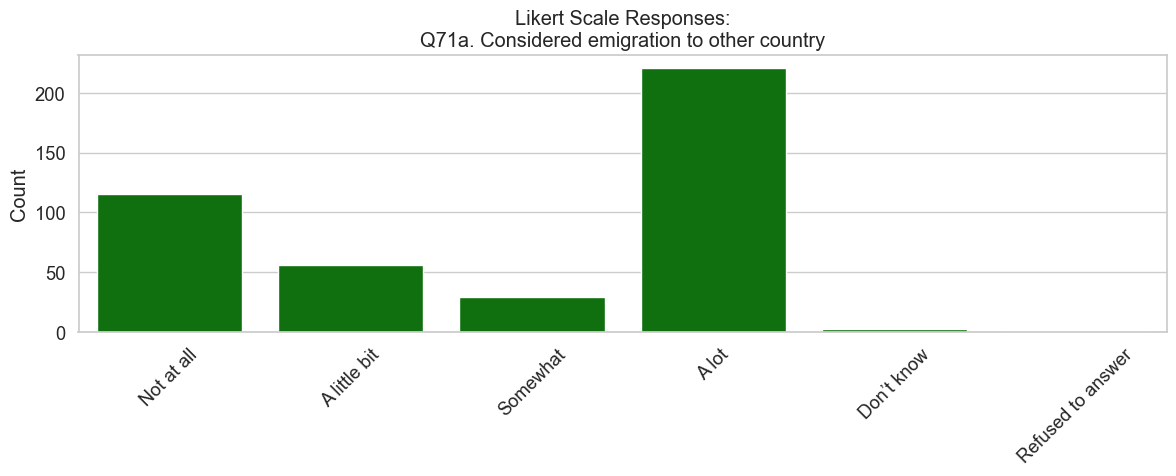


📊 Generating charts for:
Q71b. Most likely country for emigration



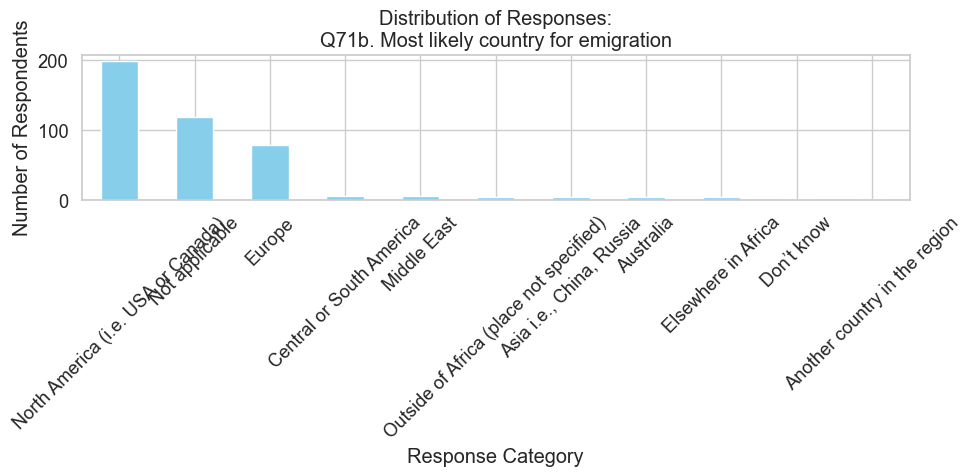

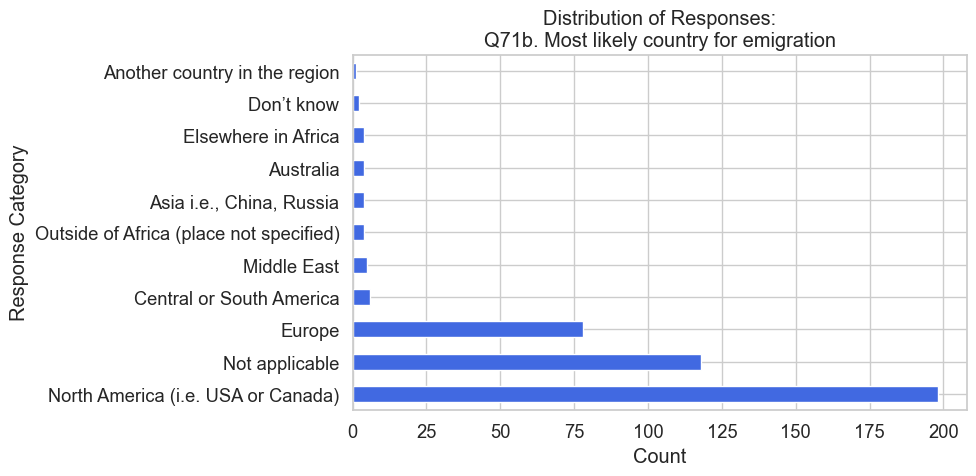

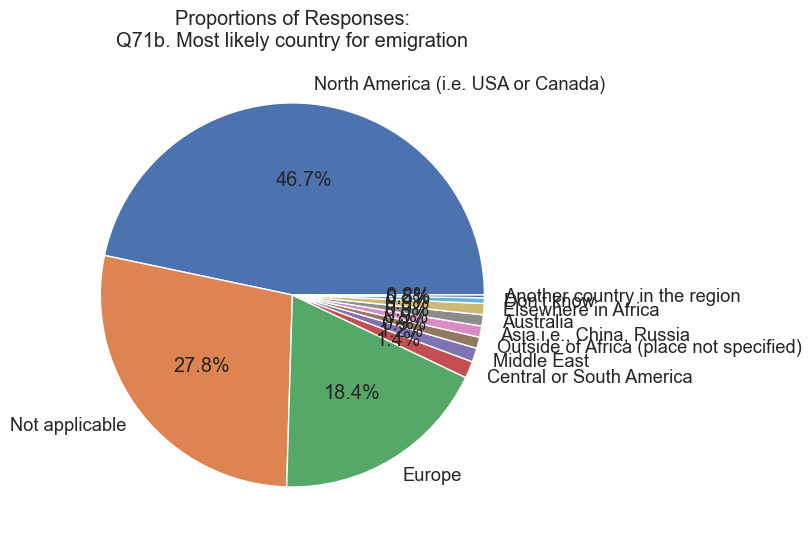

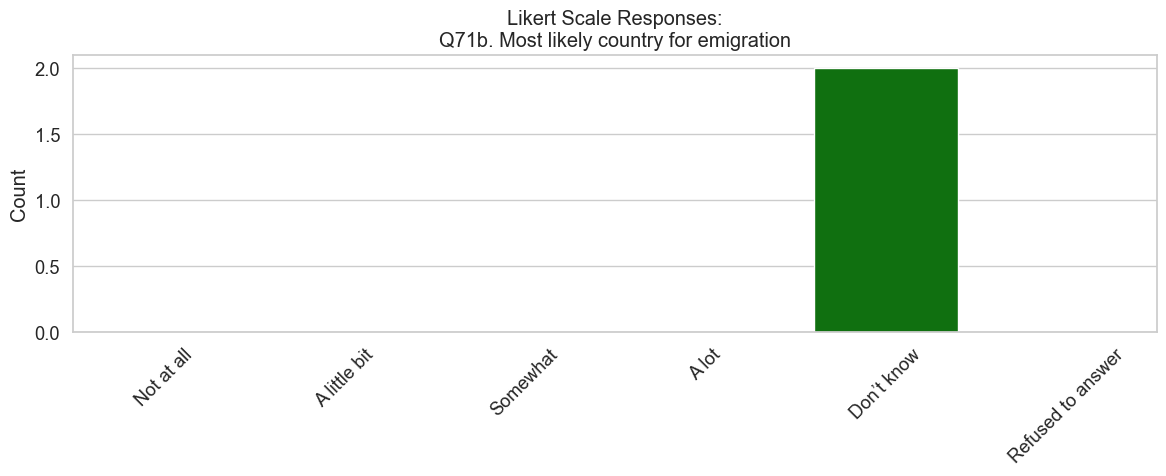


📊 Generating charts for:
Q60a. Heard about climate change



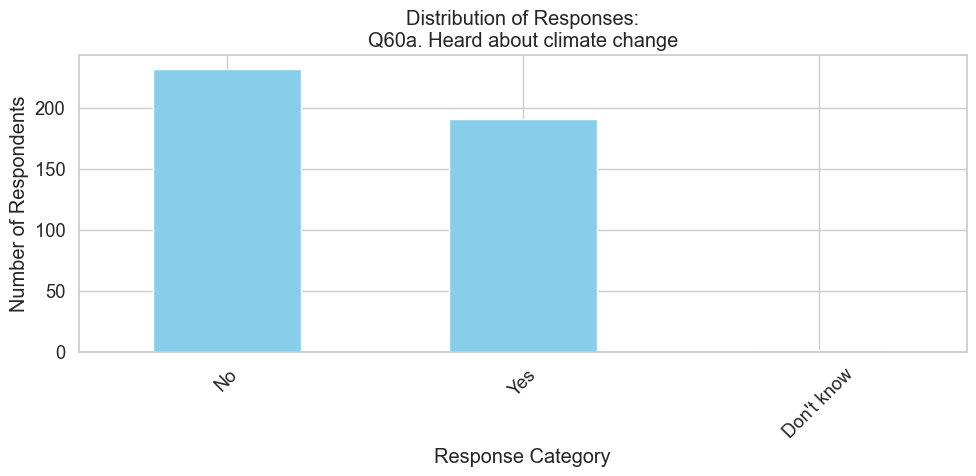

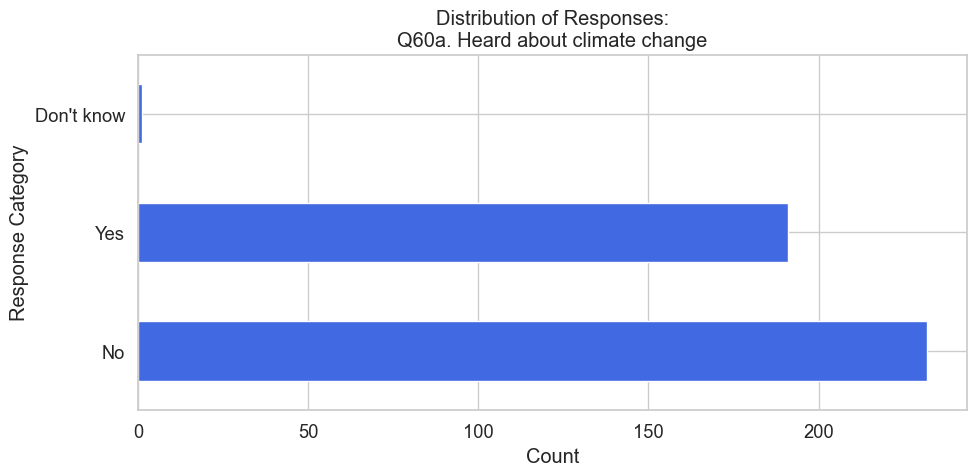

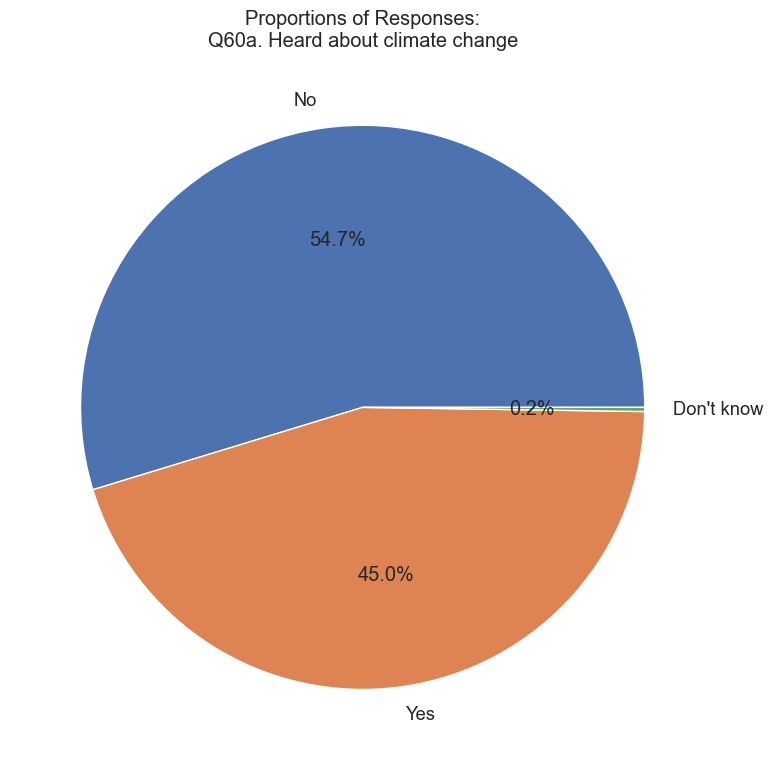


📊 Generating charts for:
Q60b. Climate change: affecting country



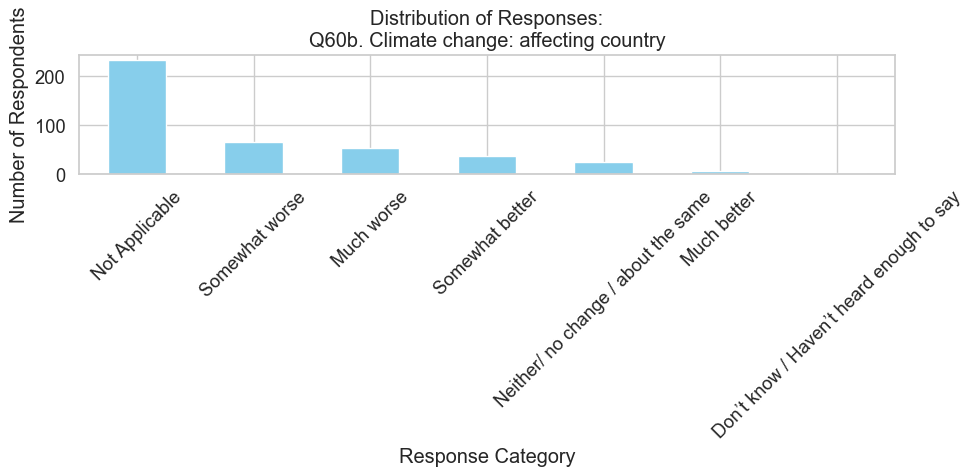

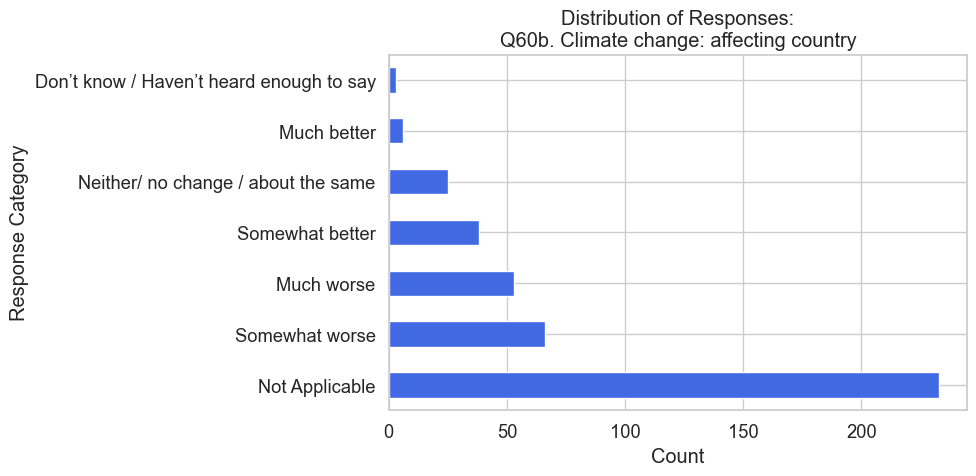

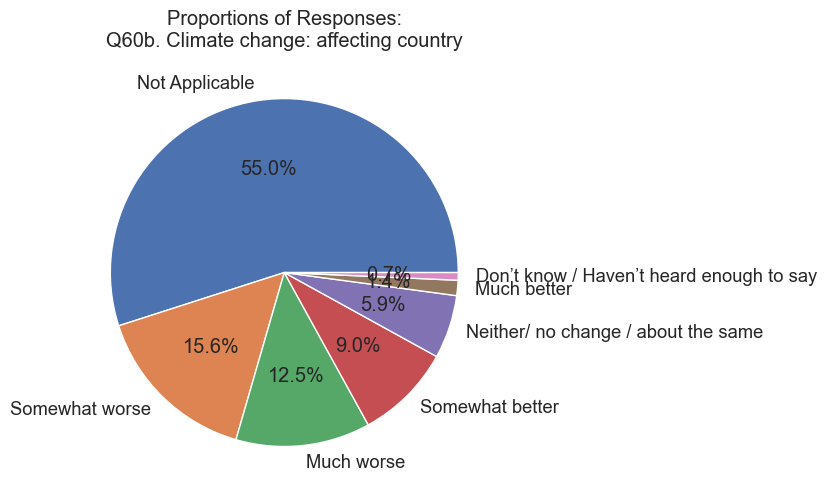


📊 Generating charts for:
Q61a. Climate change: main cause



C:\Users\PC\AppData\Local\Temp\ipykernel_18668\3671823272.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


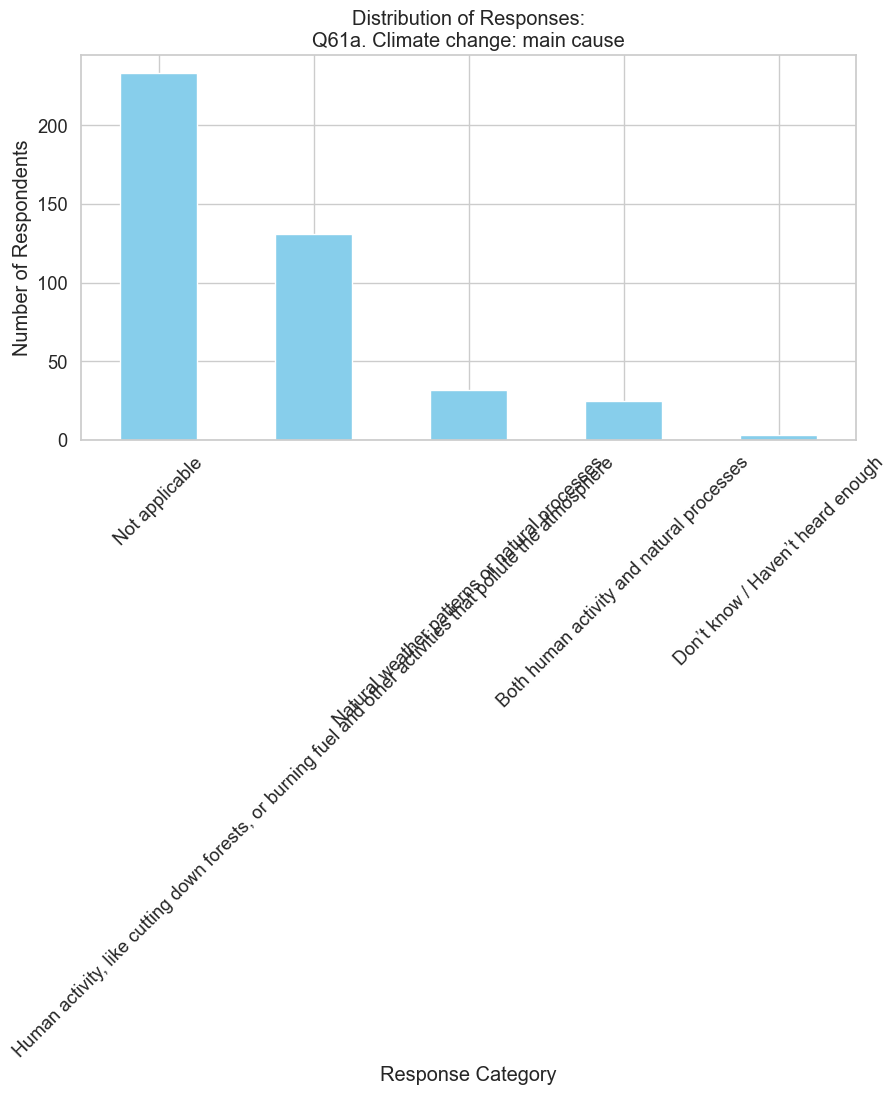

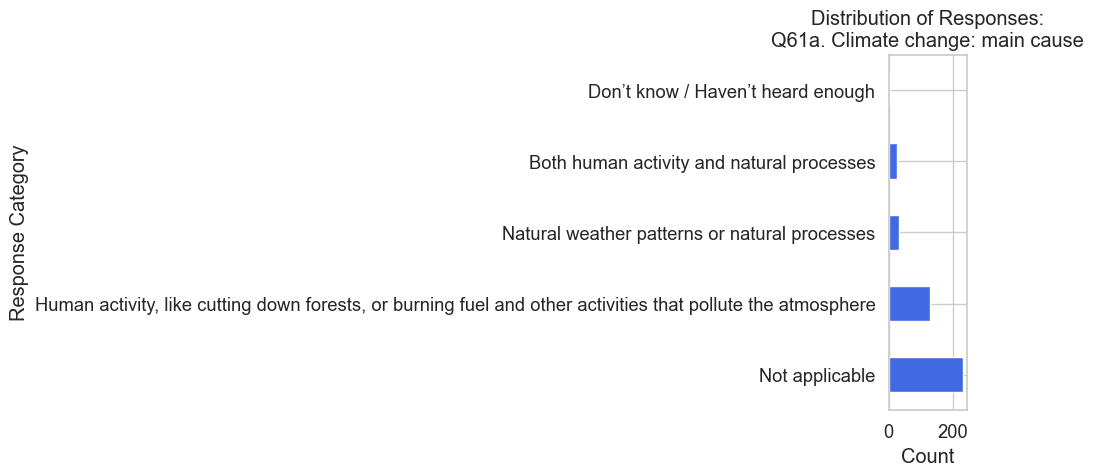

C:\Users\PC\AppData\Local\Temp\ipykernel_18668\3671823272.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


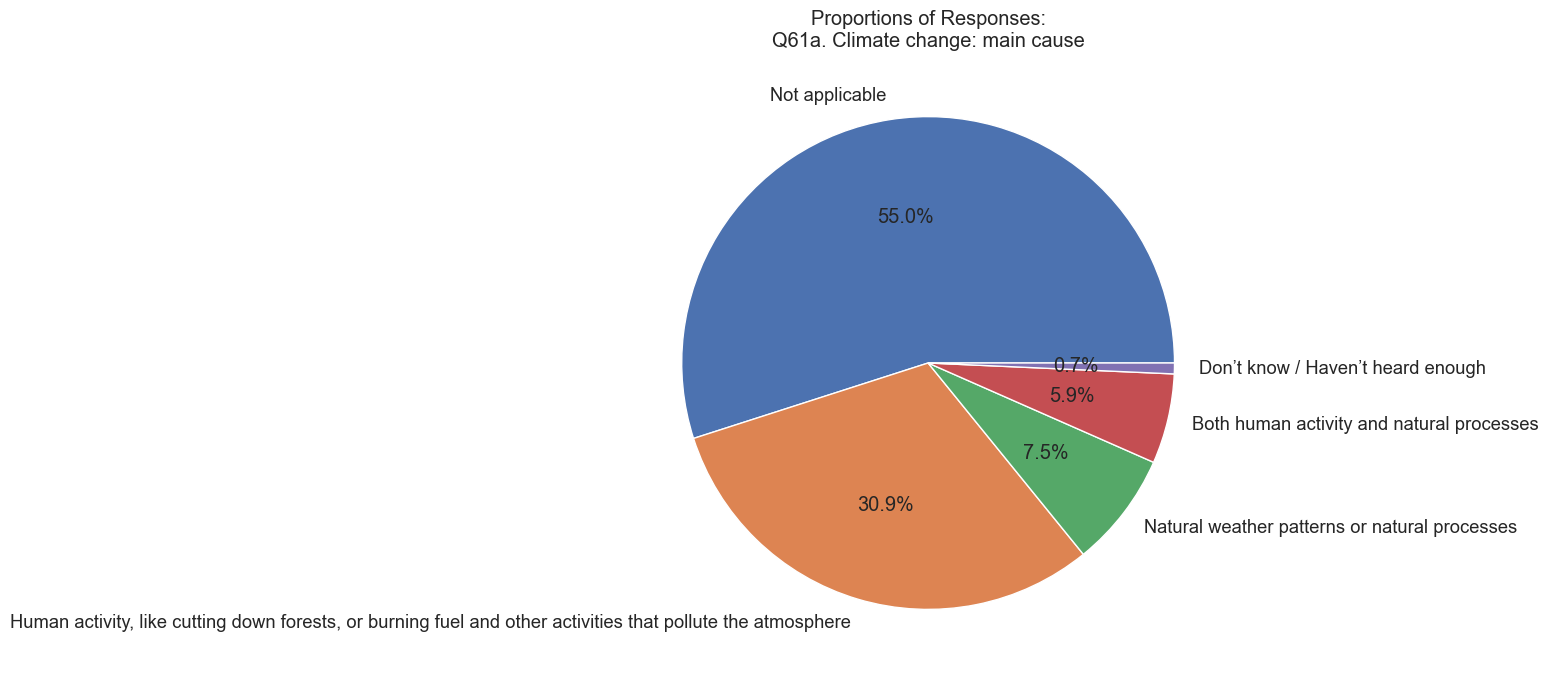


📊 Generating charts for:
Q61b. Main responsibility for causing climate change



C:\Users\PC\AppData\Local\Temp\ipykernel_18668\3671823272.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


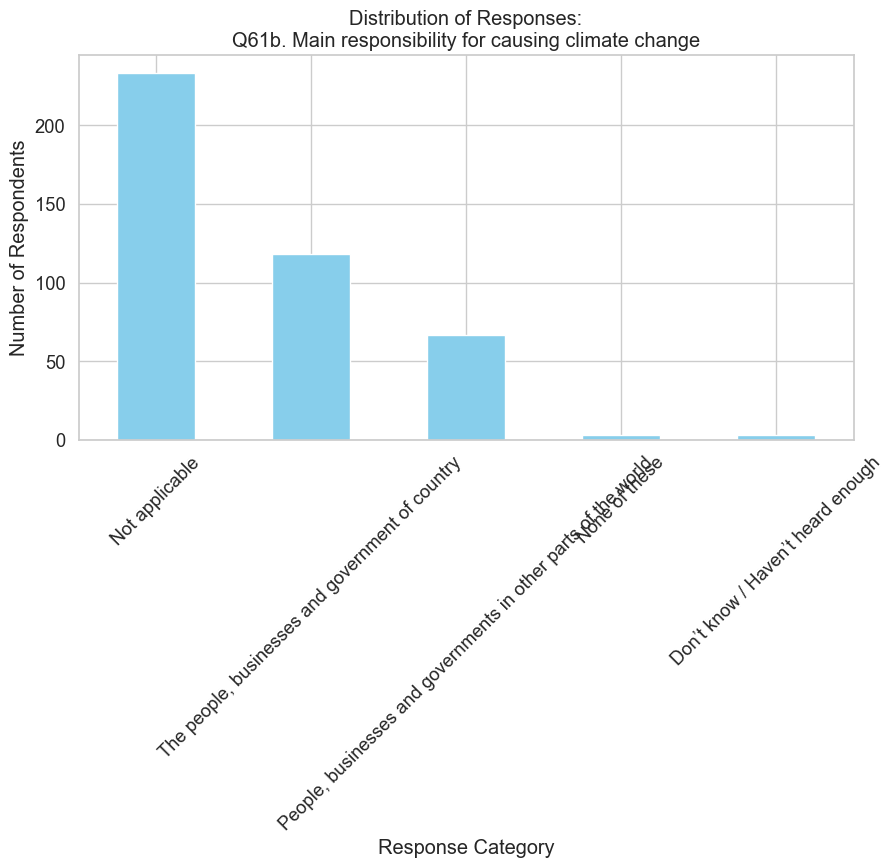

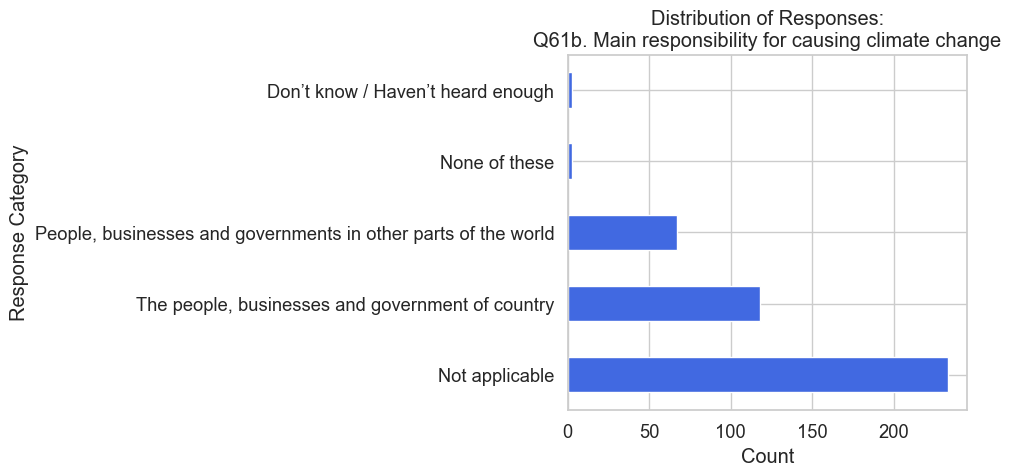

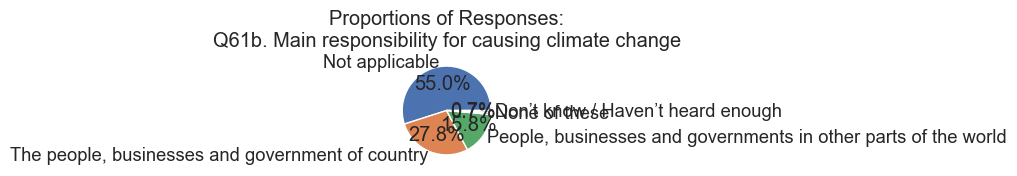


📊 Generating charts for:
Q62a. Government must act now to limit climate change



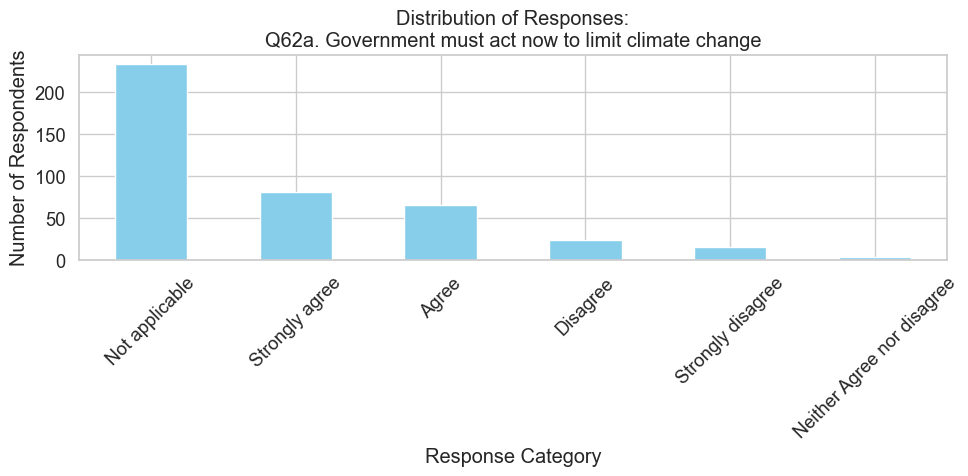

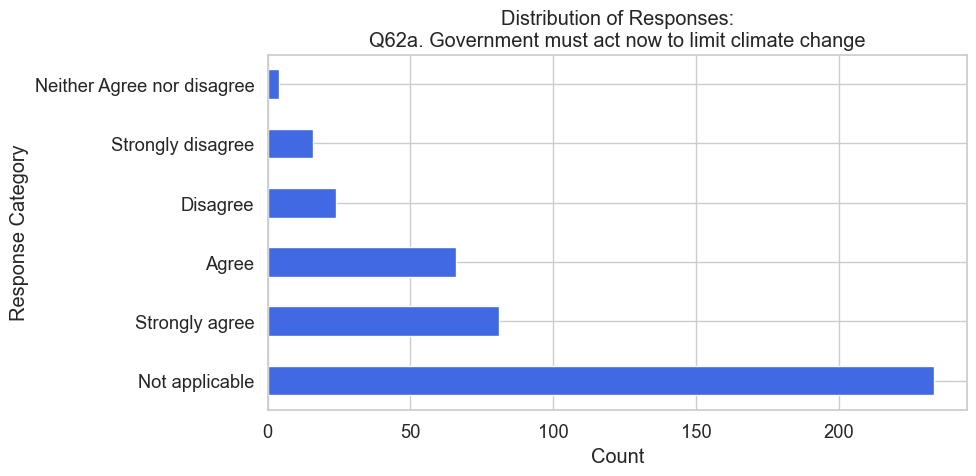

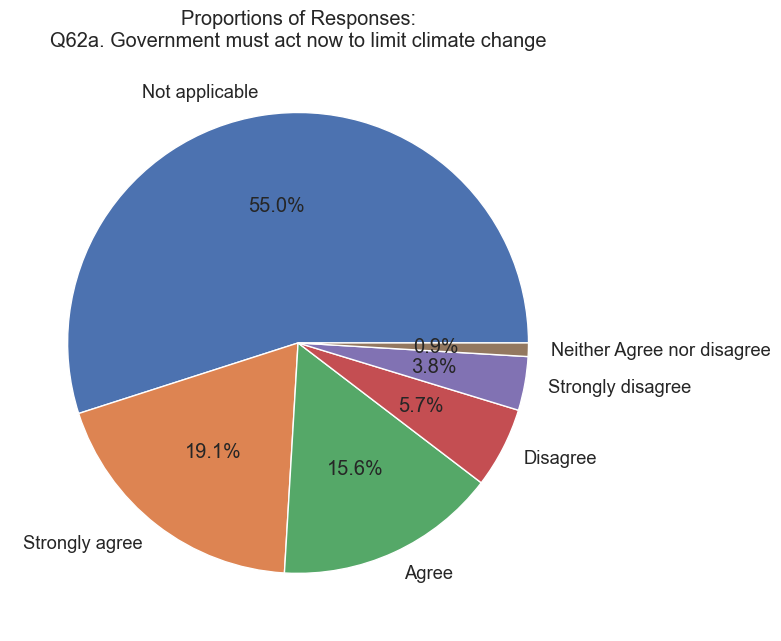


📊 Generating charts for:
Q62b. Rich countries must act now to limit climate change



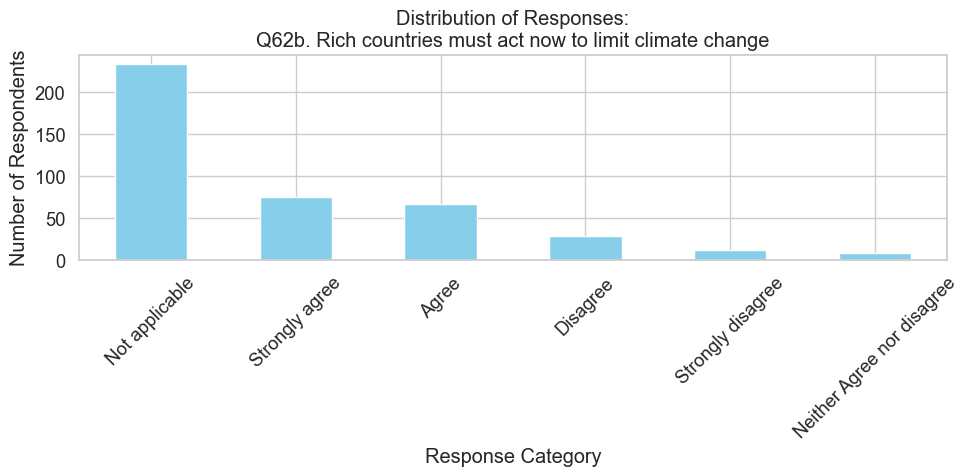

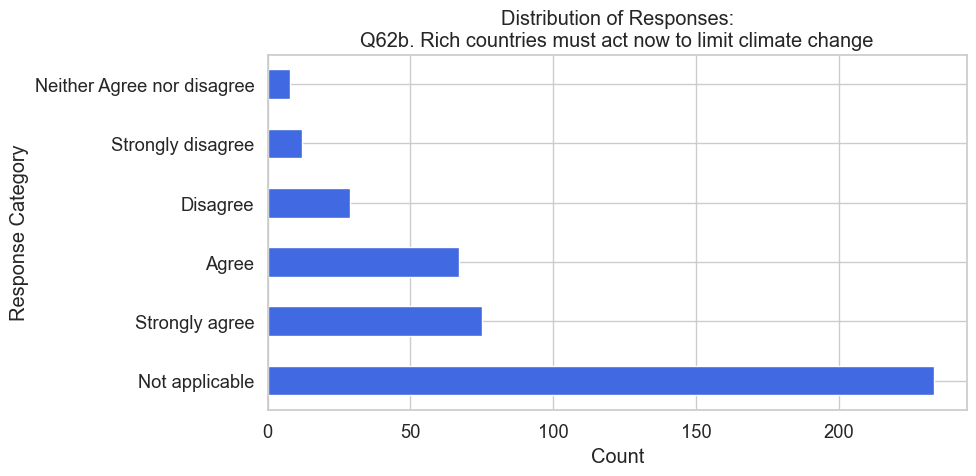

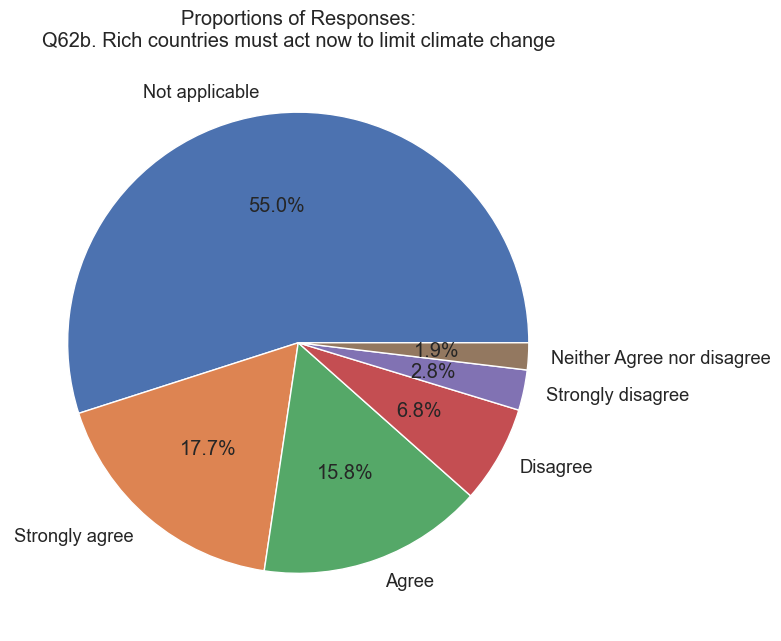


📊 Generating charts for:
Q62c. Rich countries should contribute to climate adaptation costs



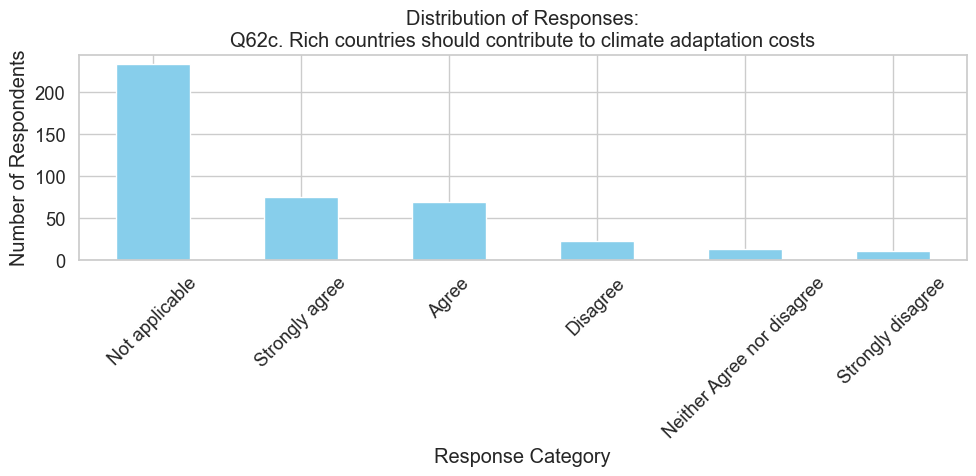

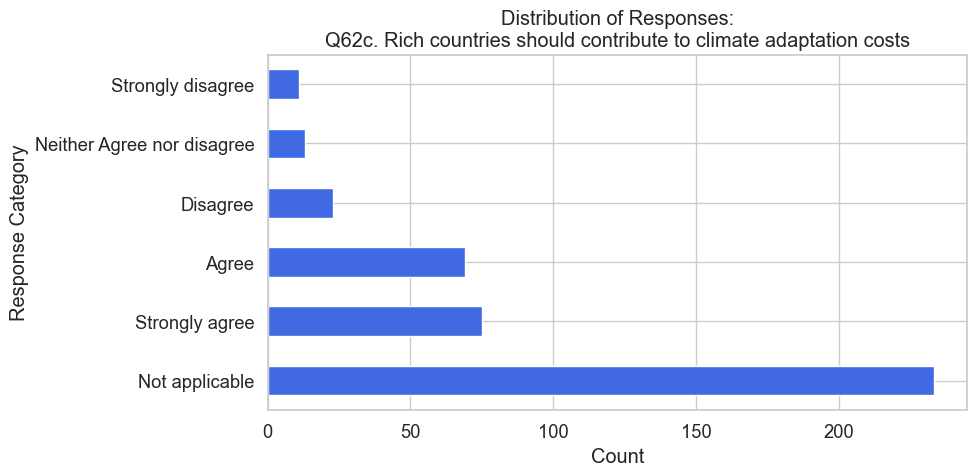

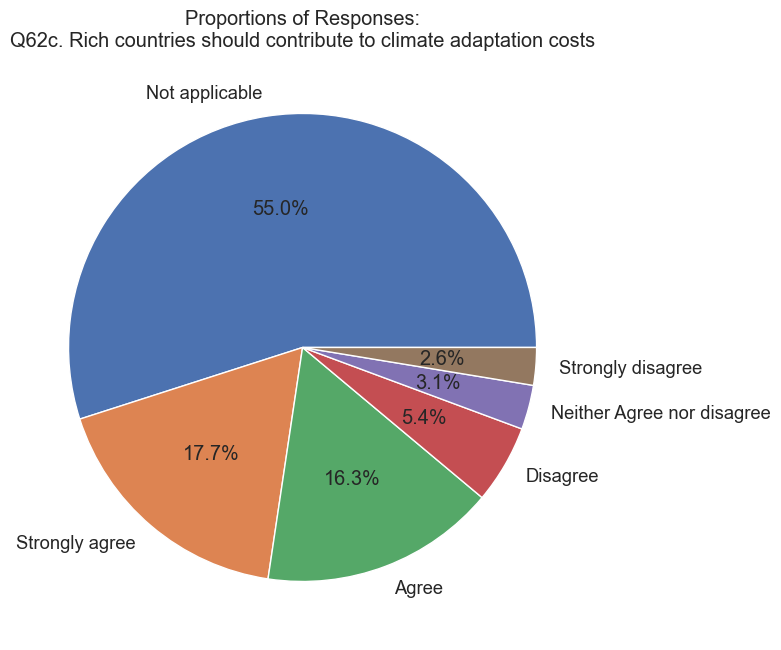


📊 Generating charts for:
Q62d. Who primarily responsible for limiting climate change



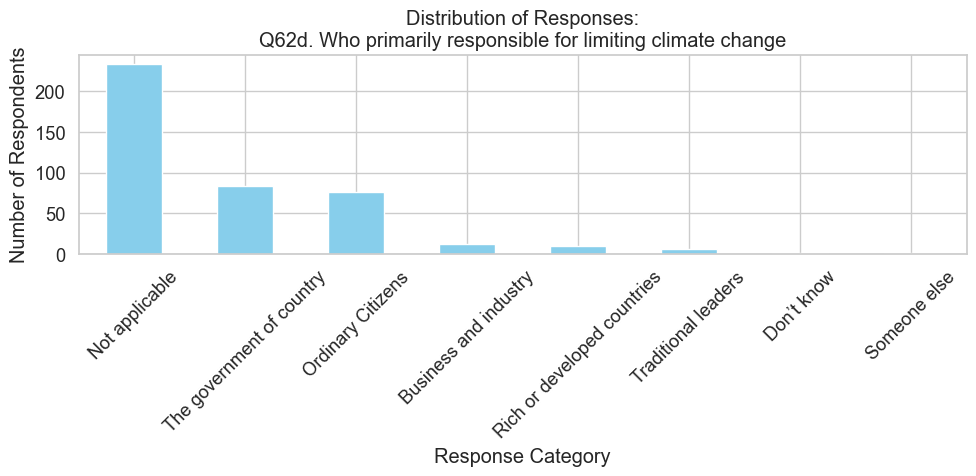

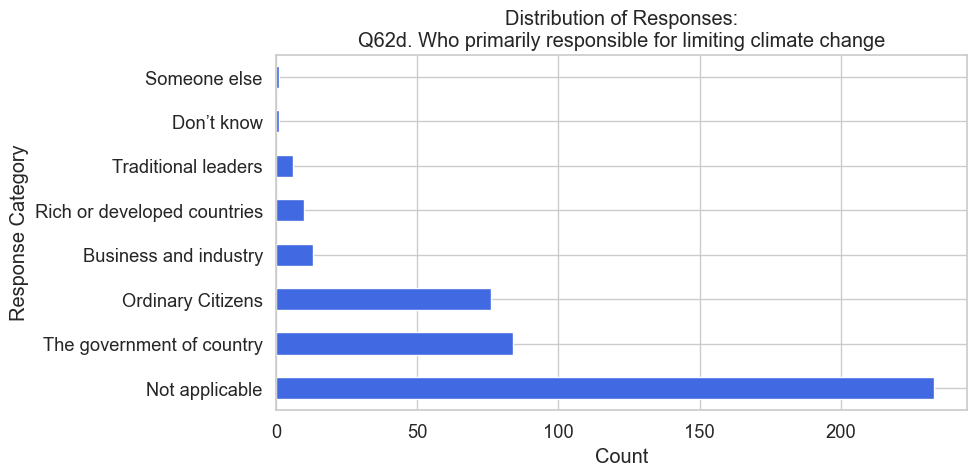

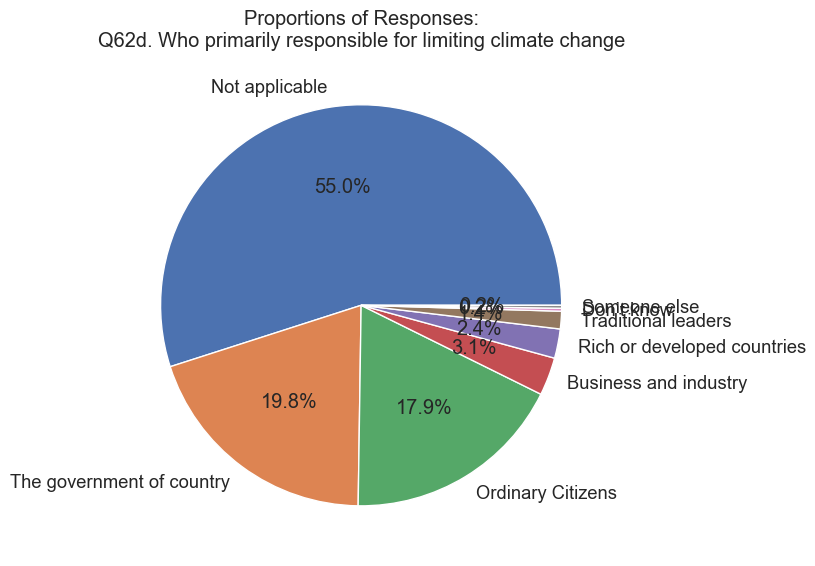

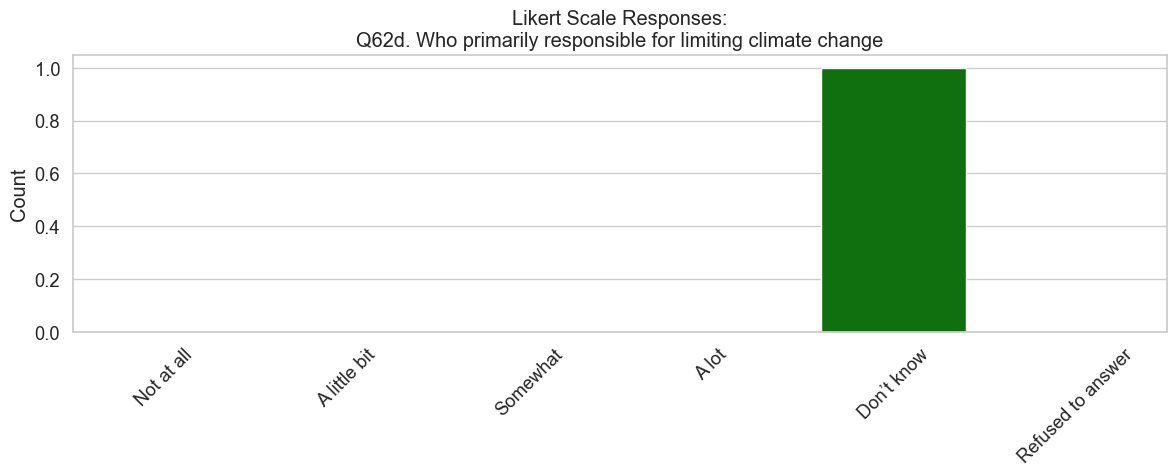


📊 Generating charts for:
Q63a. Ban tree cutting for firewood/charcoal even if fuel more costly



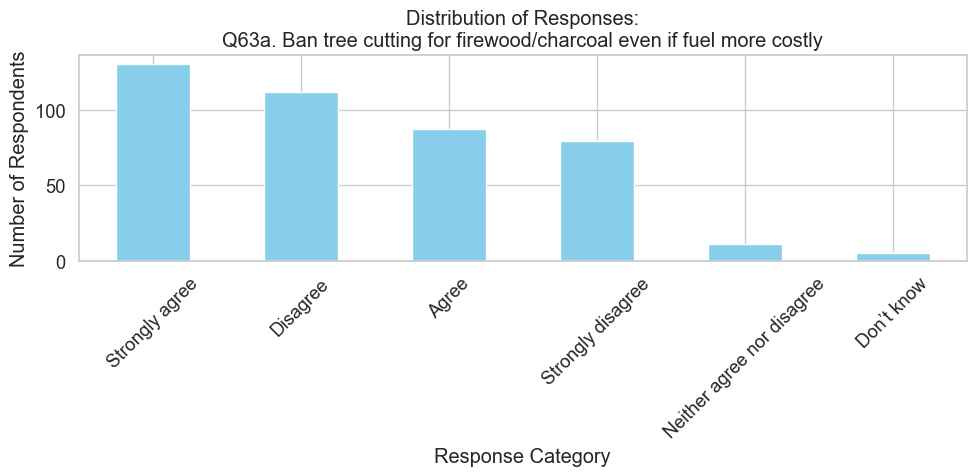

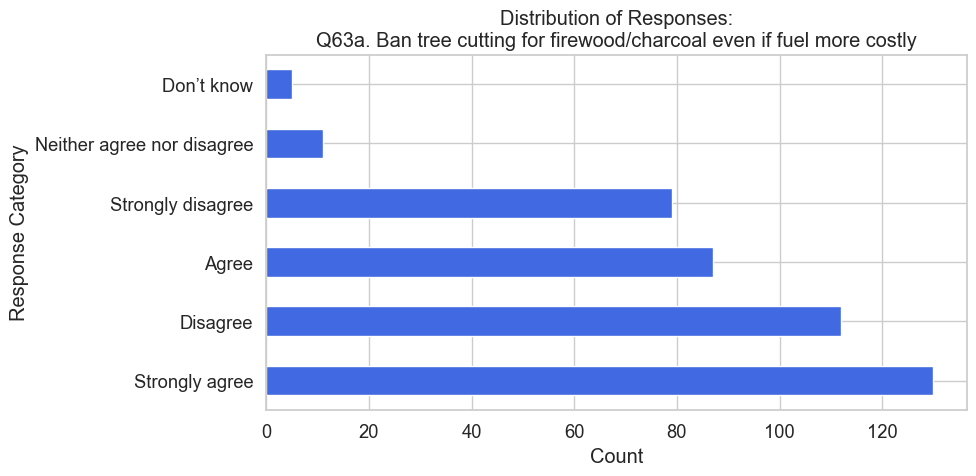

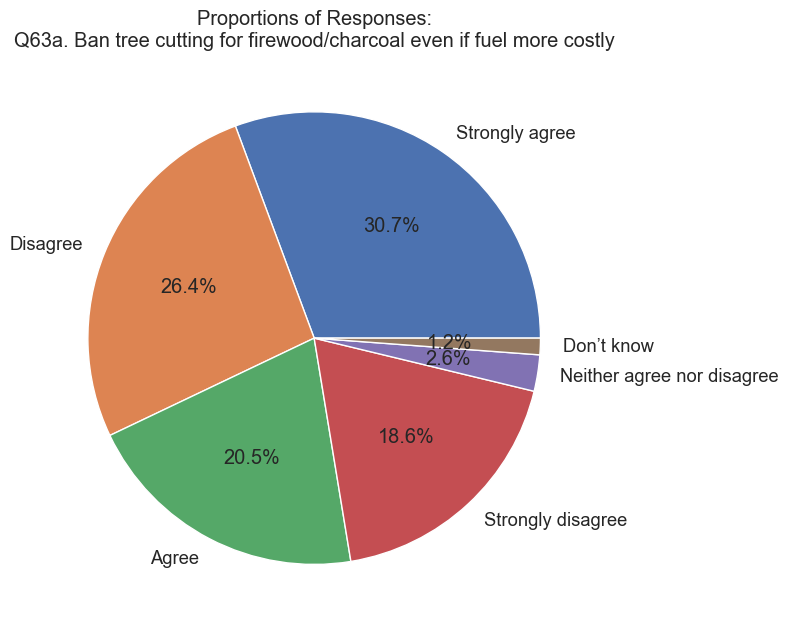

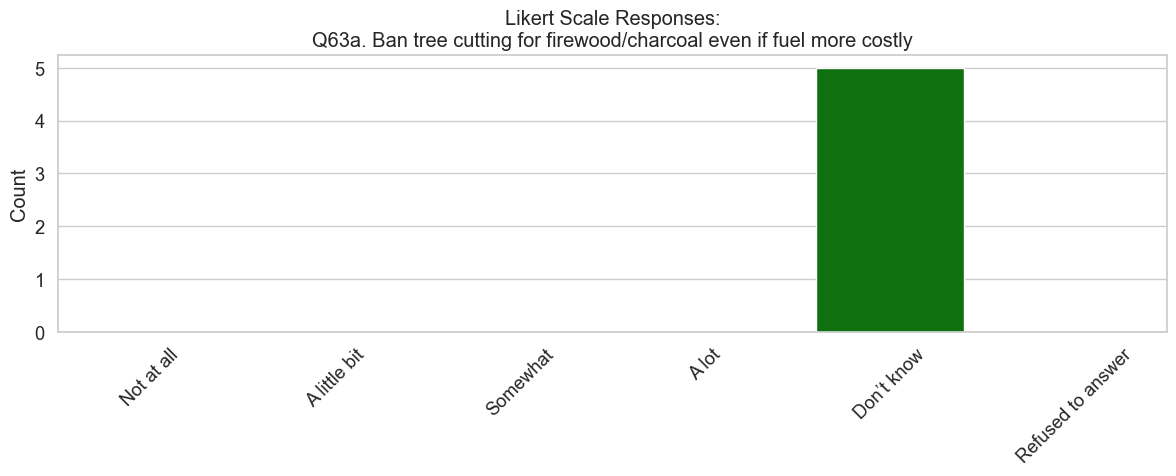


📊 Generating charts for:
Q63b. Require cleaner fuel cookstoves even if more costly



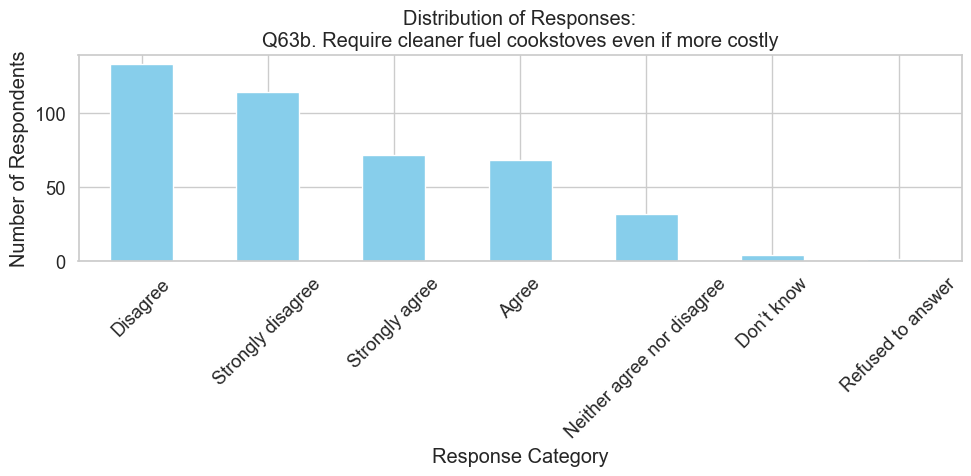

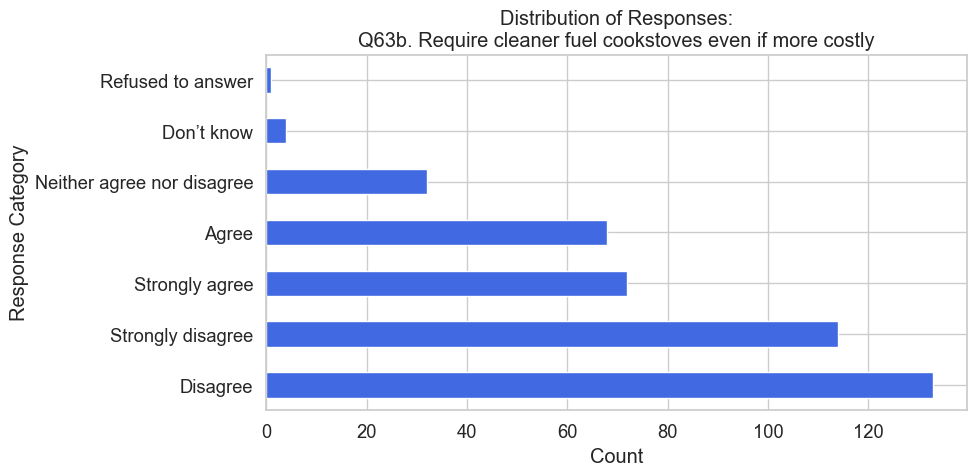

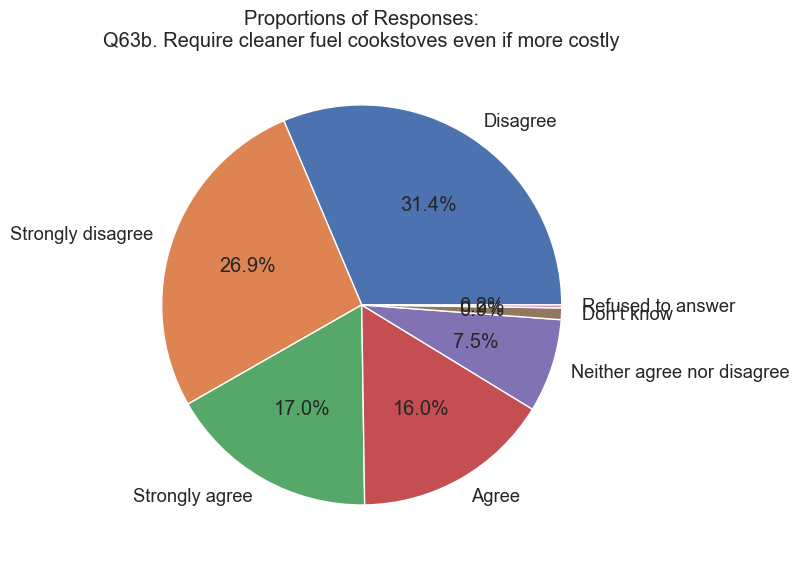

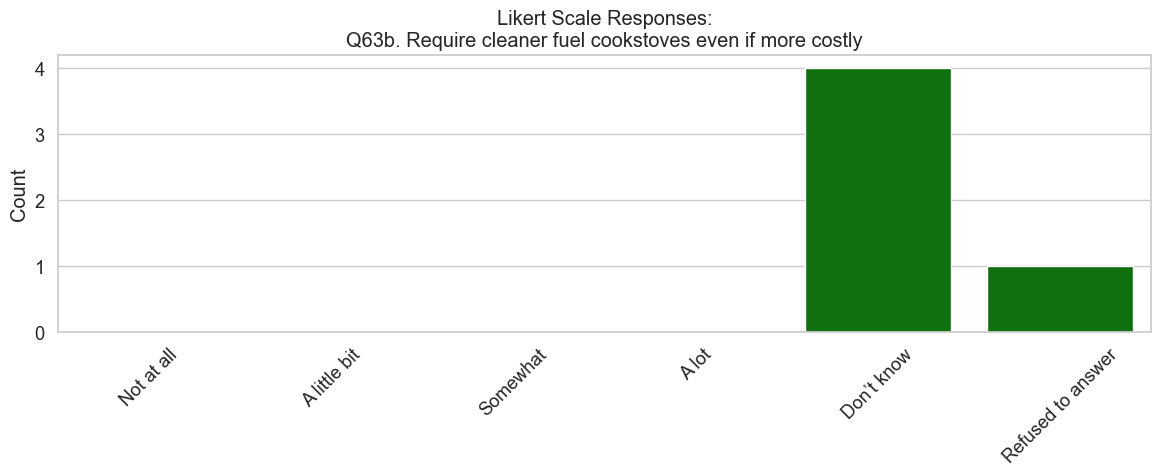


📊 Generating charts for:
Q63c. Invest in infrastructure for climate resilience



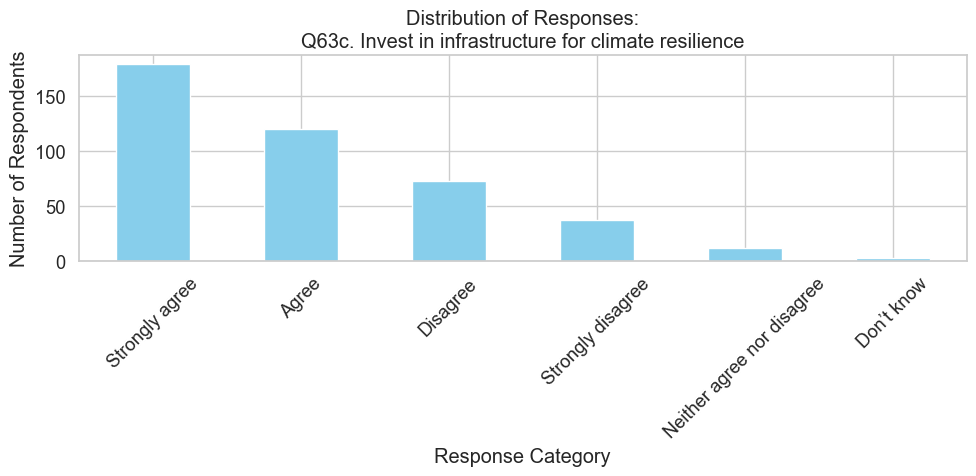

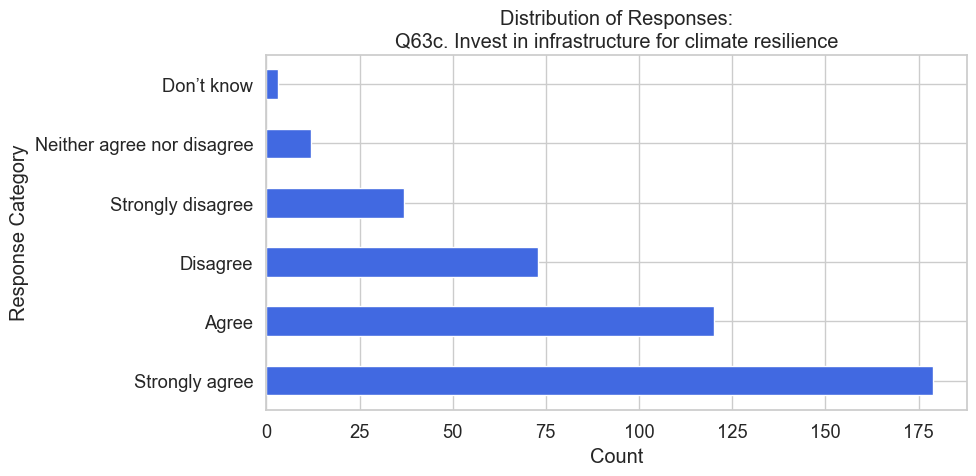

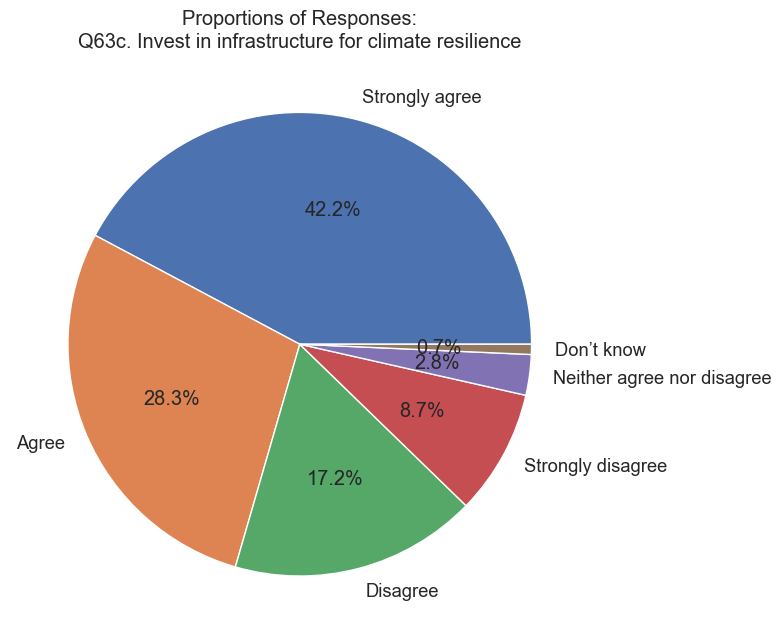

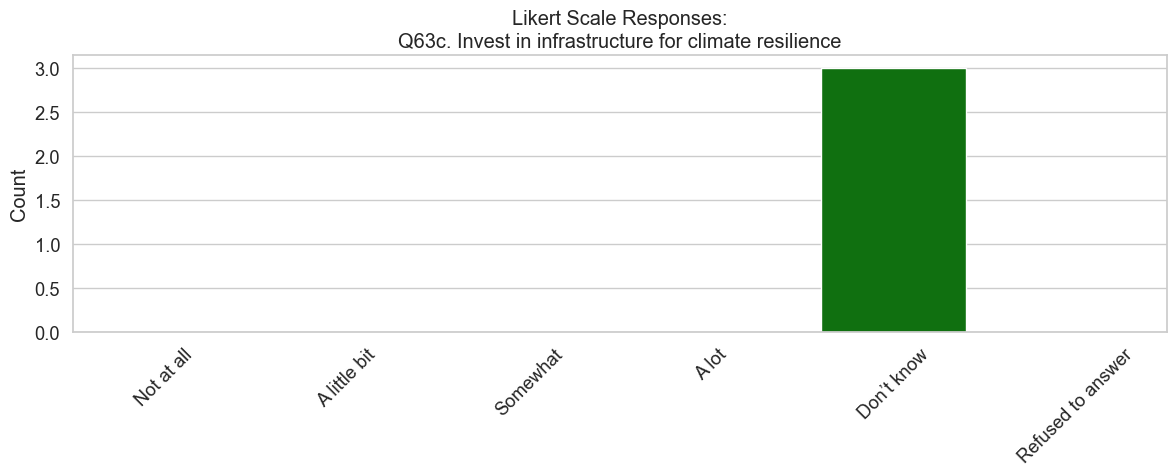


📊 Generating charts for:
Q63d. Pressure rich countries to provide climate change aid



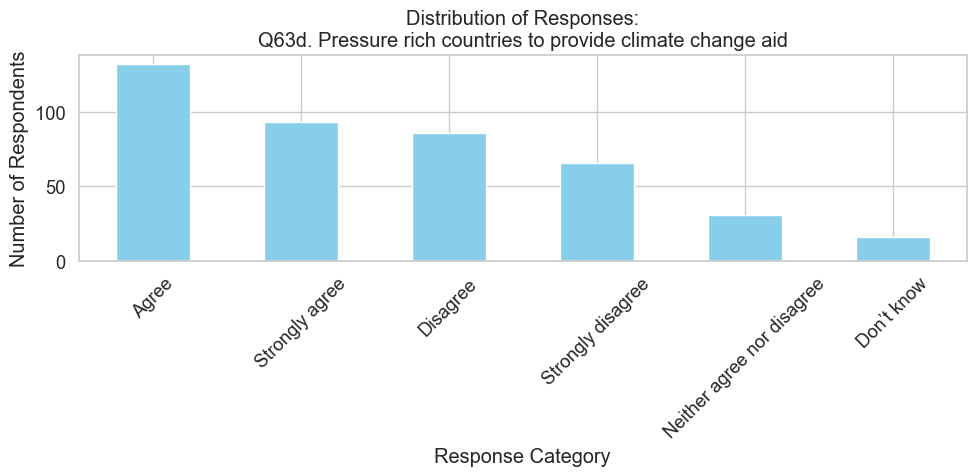

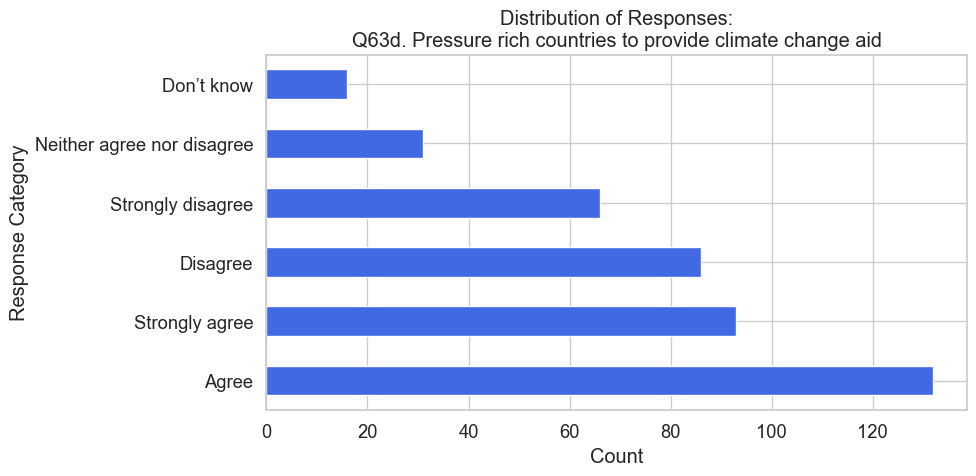

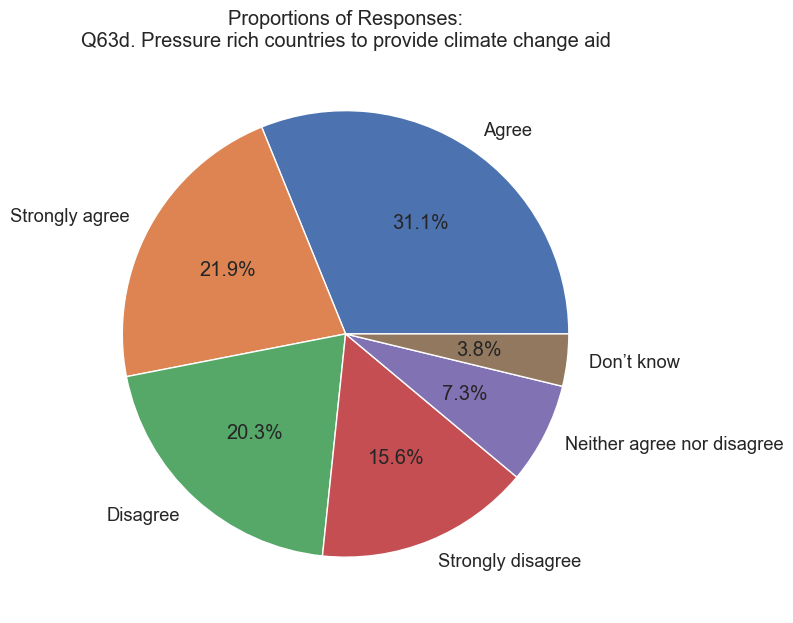

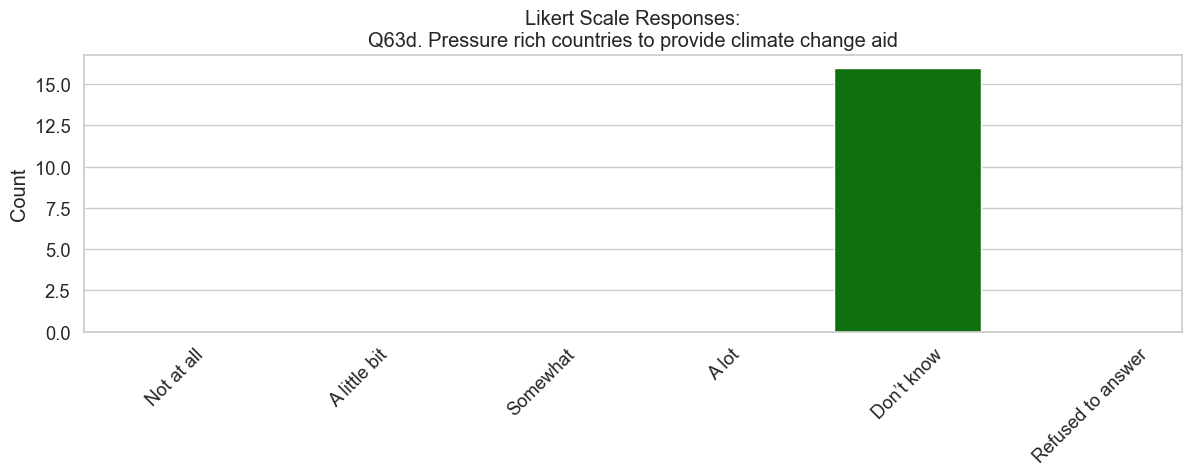


📊 Generating charts for:
Q63e-gha. Promote electric taxis/buses even if more costly



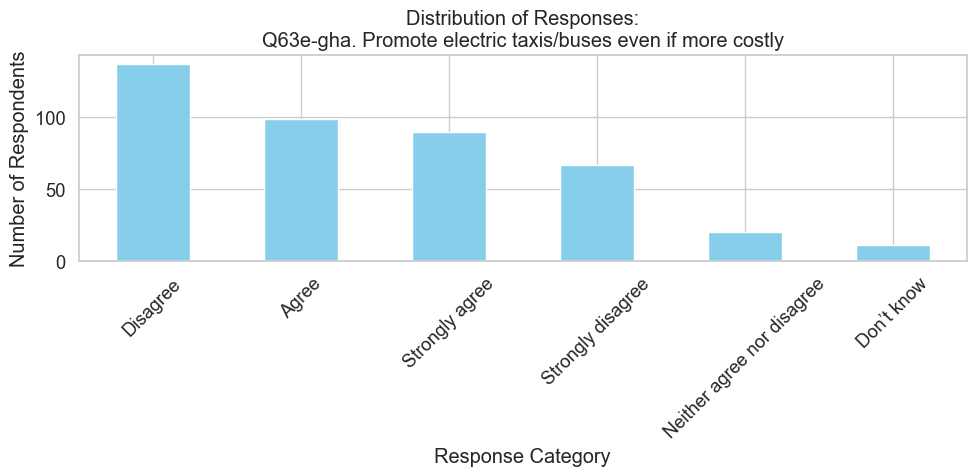

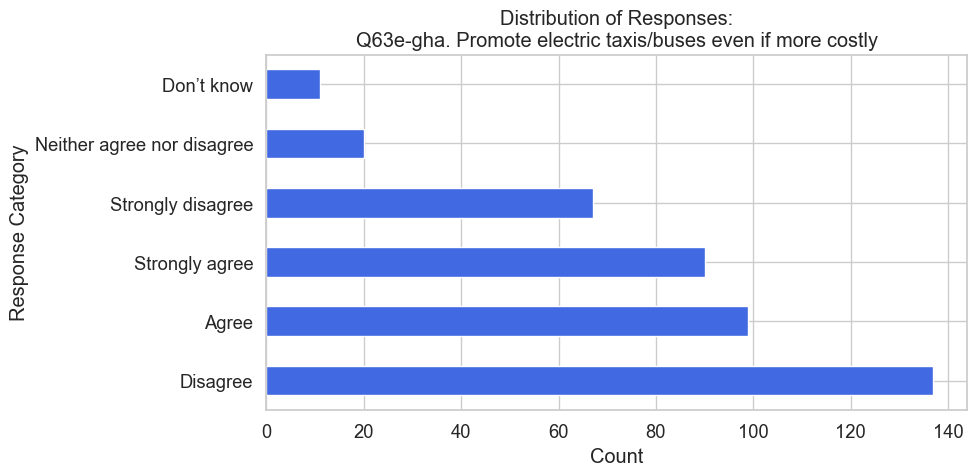

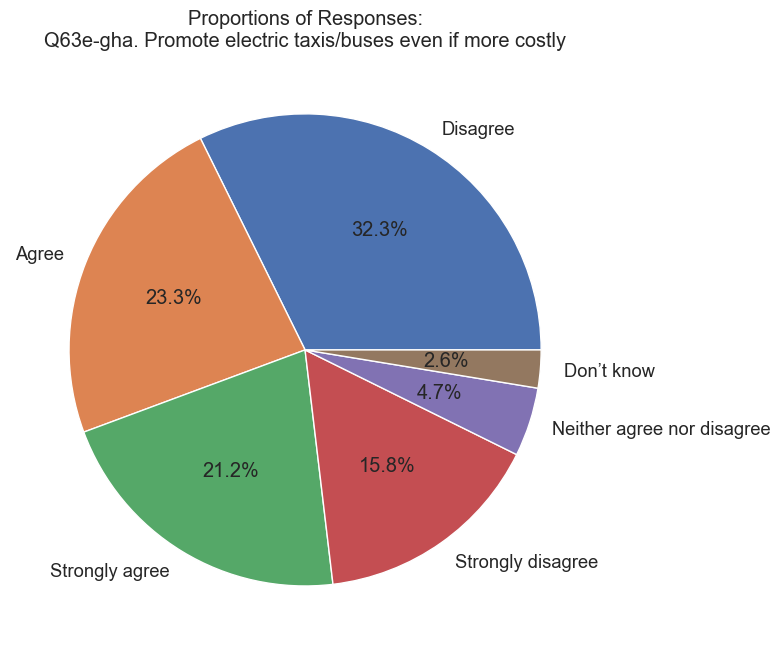

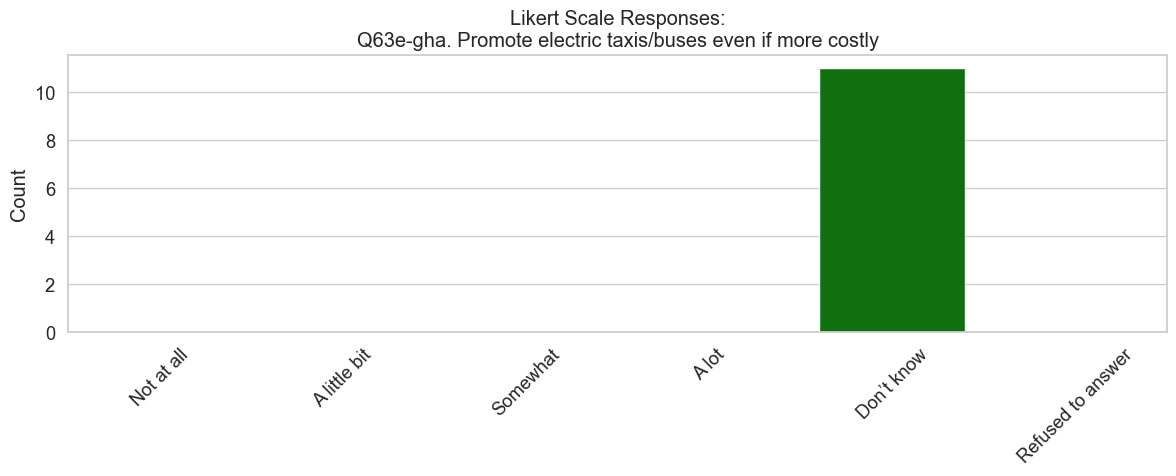


📊 Generating charts for:
Q63f-gha. Invest in wind/solar energy even if more costly



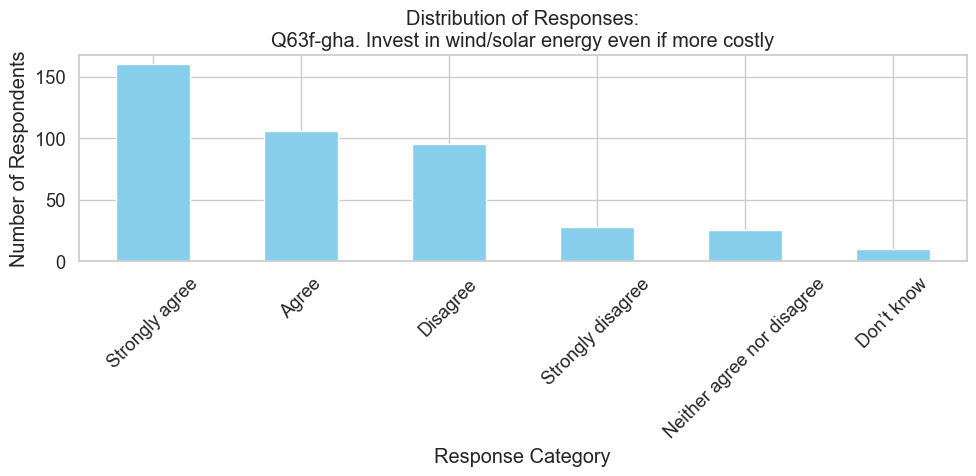

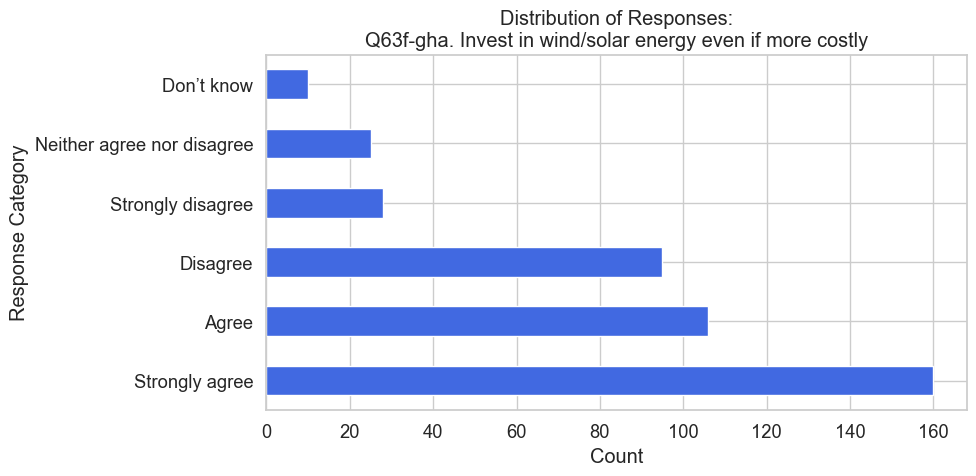

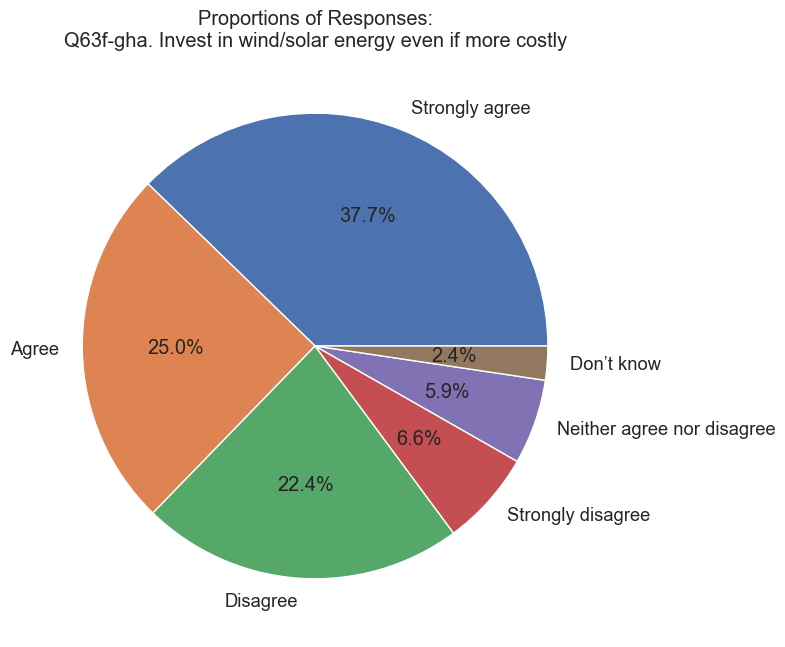

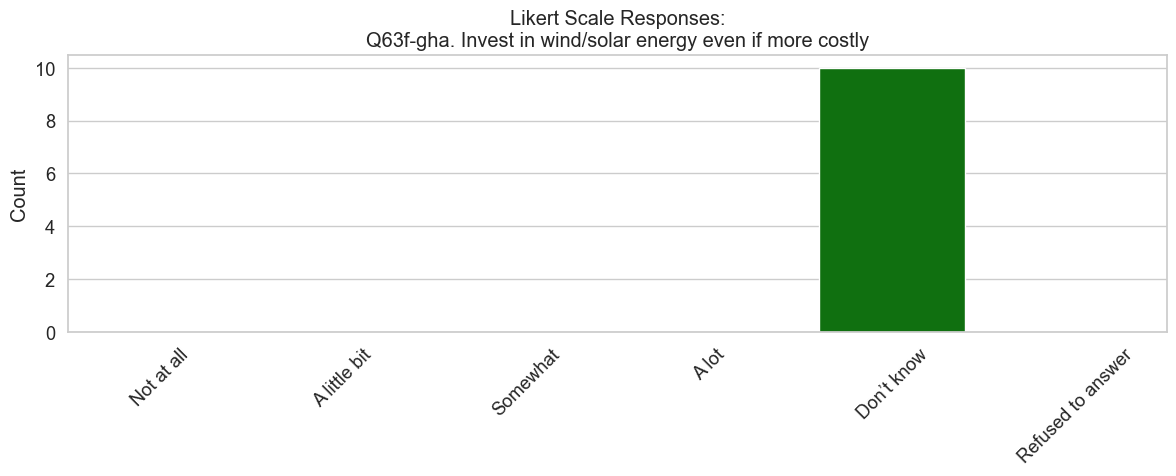


📊 Generating charts for:
Q64a. Climate change adaptation: change water consumption



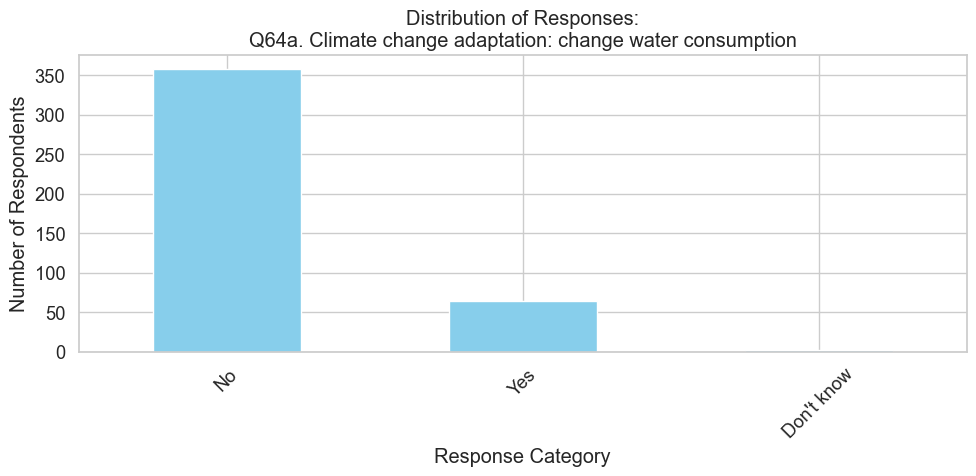

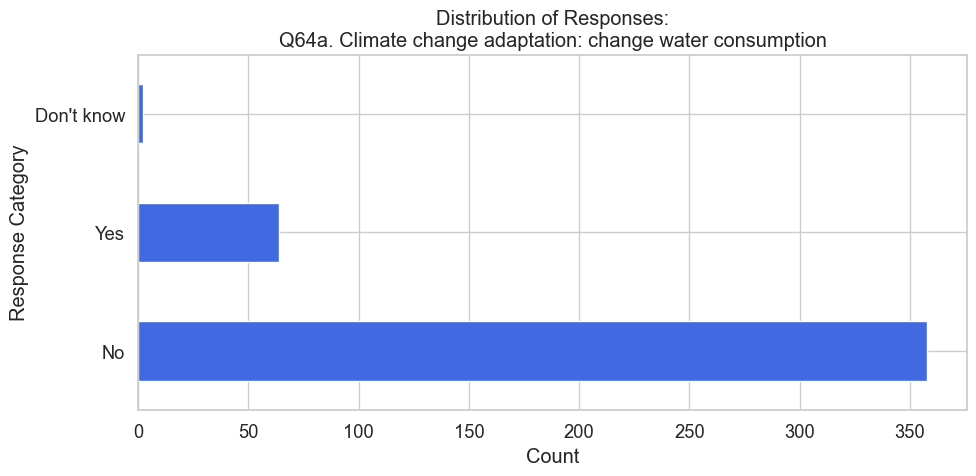

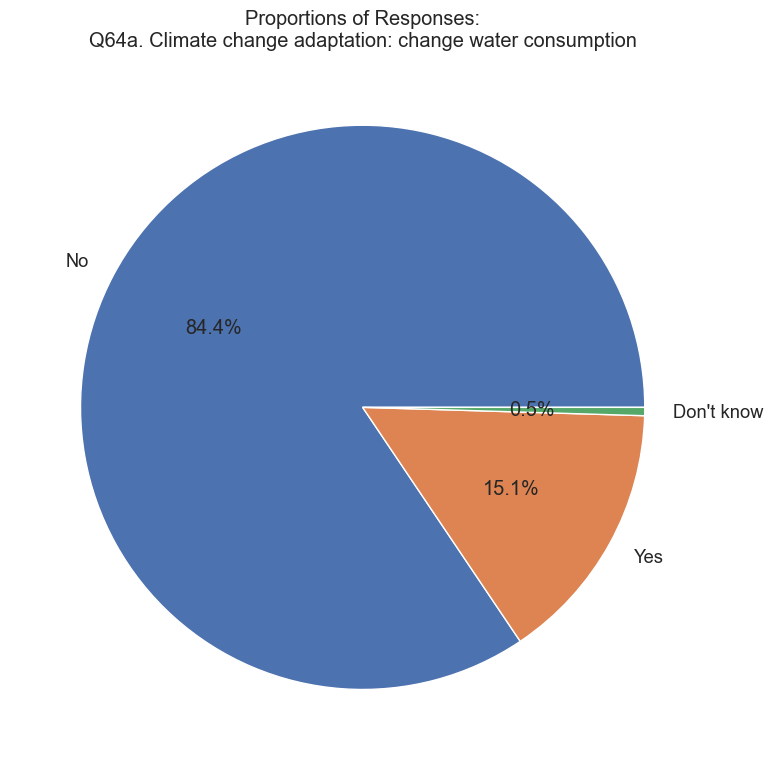


📊 Generating charts for:
Q64b. Climate change adaptation: change outdoor work



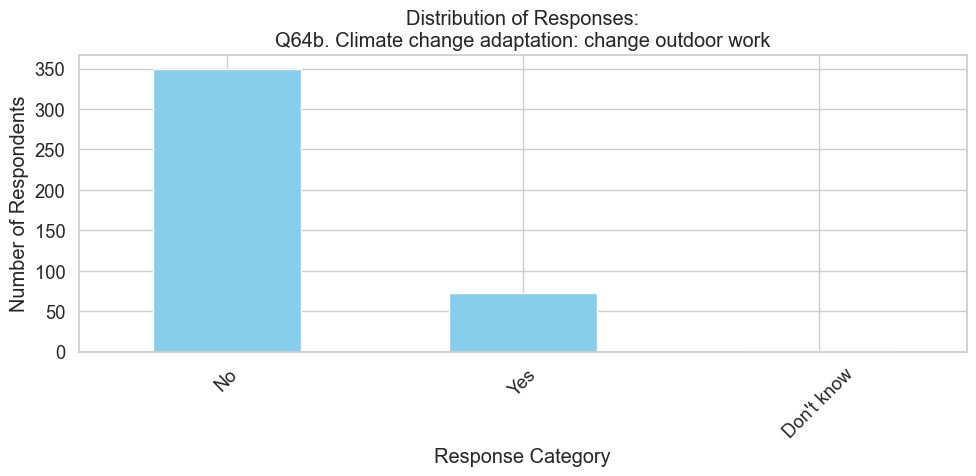

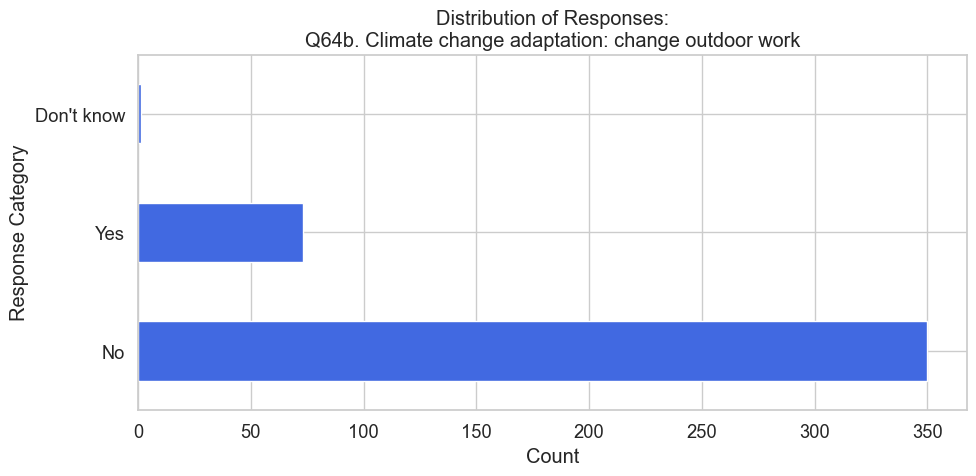

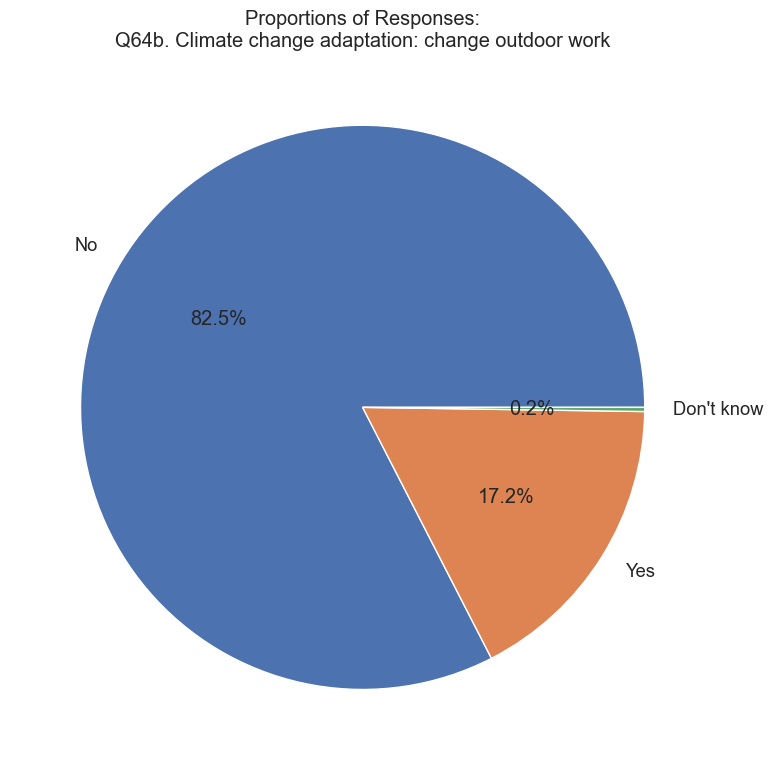


📊 Generating charts for:
Q64c. Climate change adaptation: move to another place



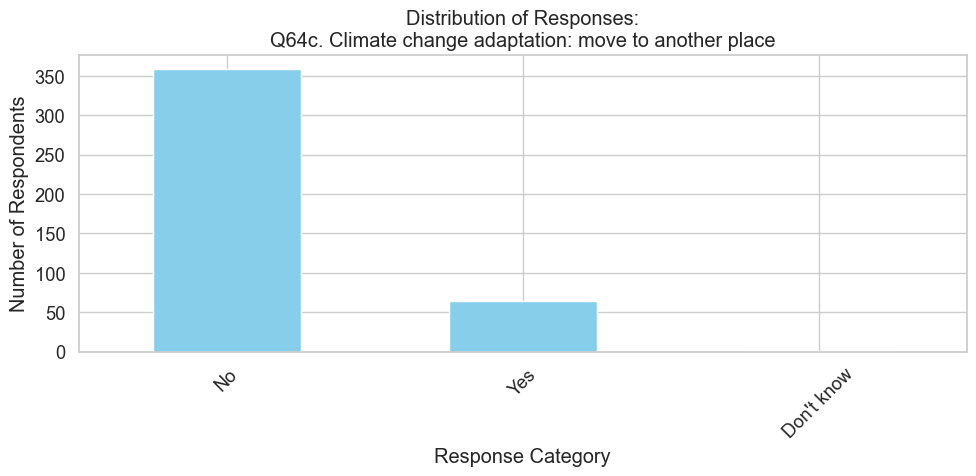

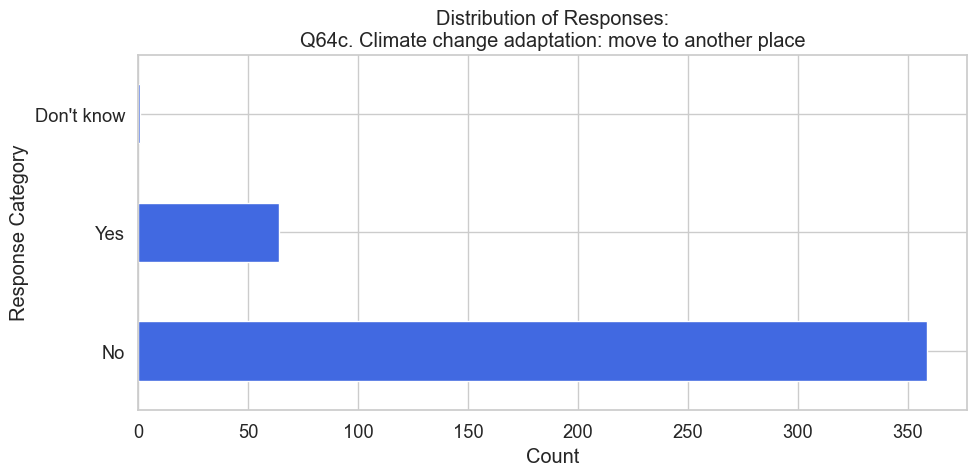

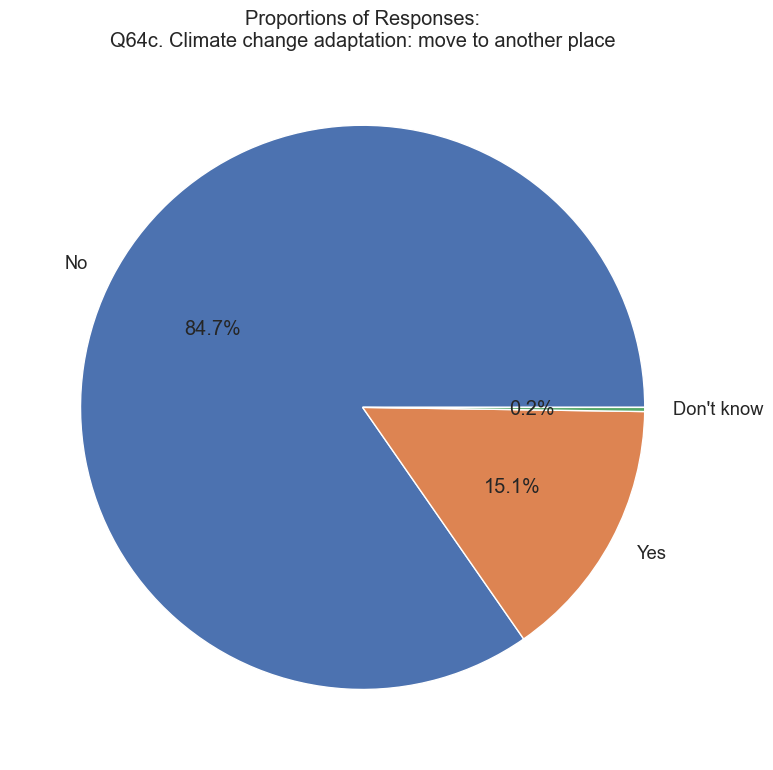


📊 Generating charts for:
Q64d. Climate change adaptation: change livestock rearing



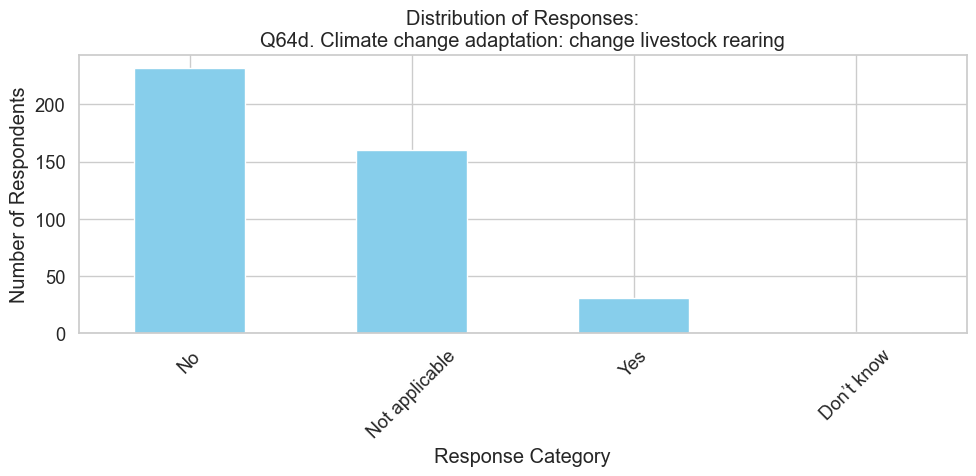

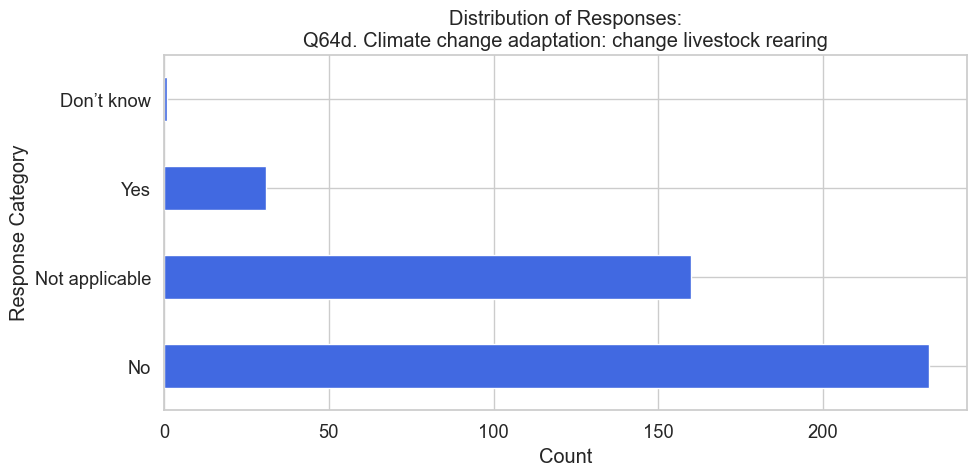

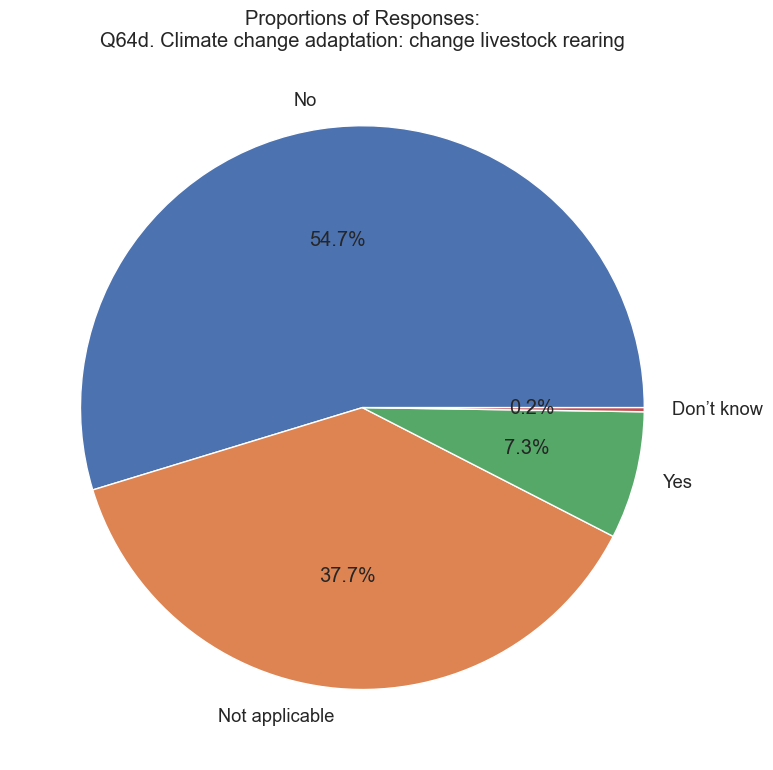

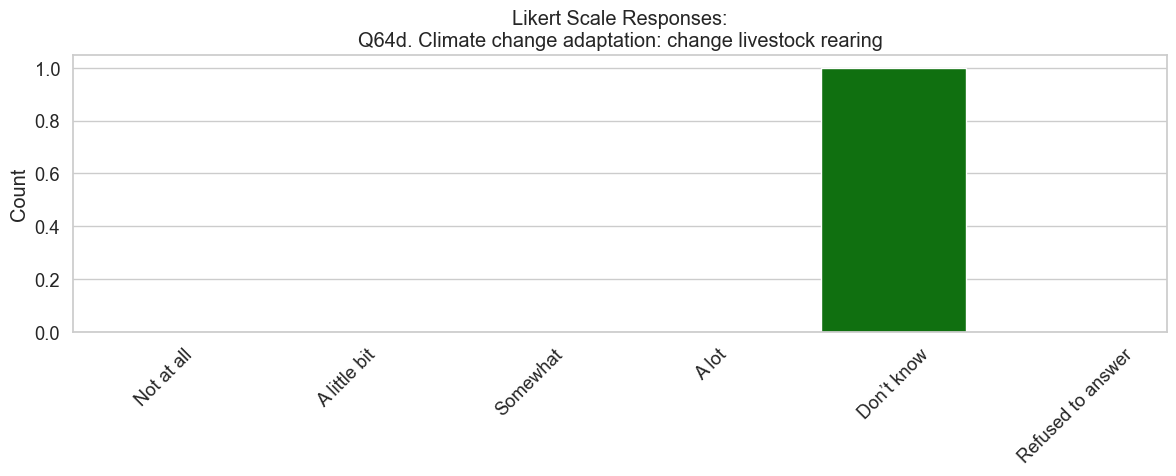


📊 Generating charts for:
Q64e. Climate change adaptation: change crops or food



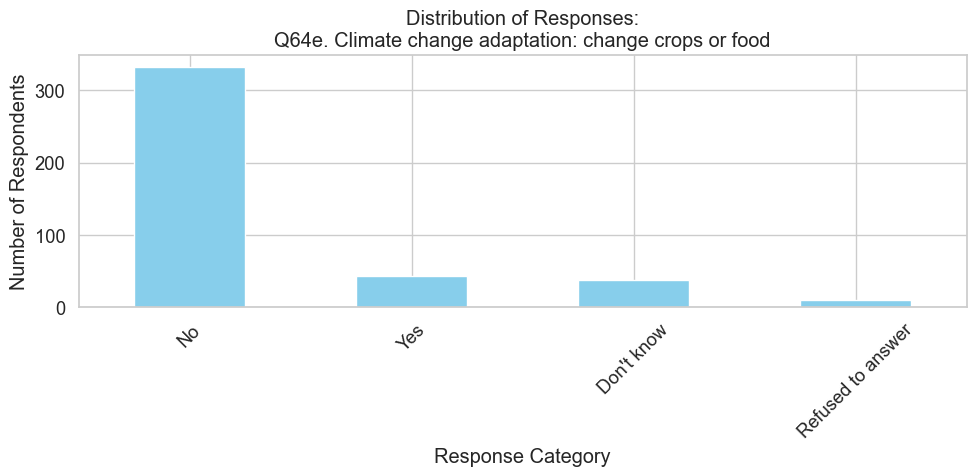

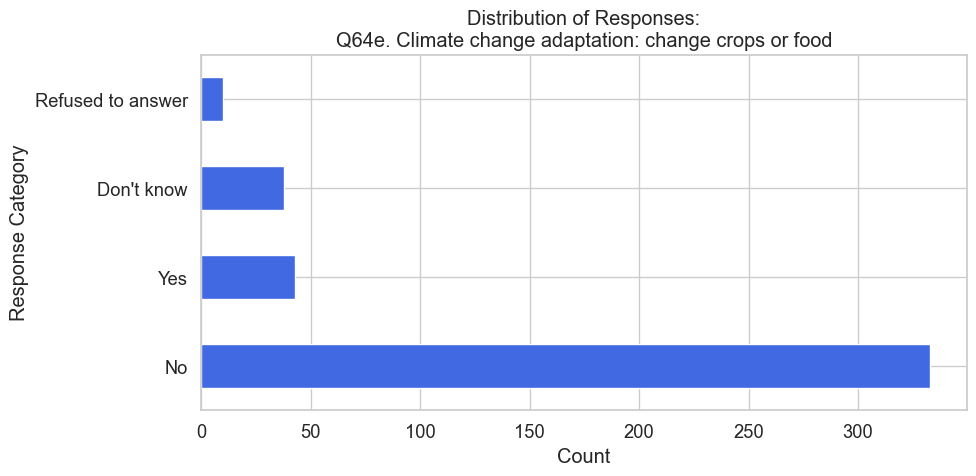

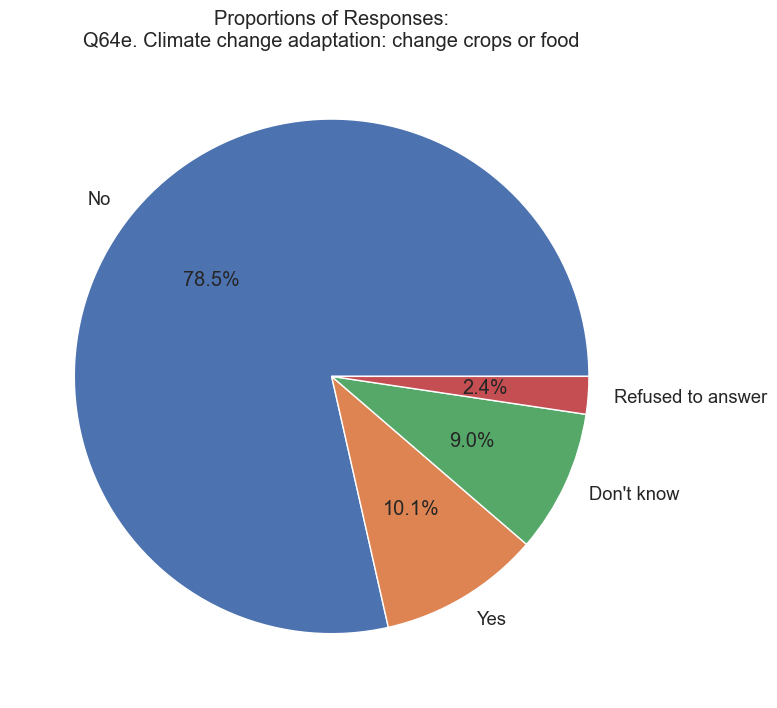

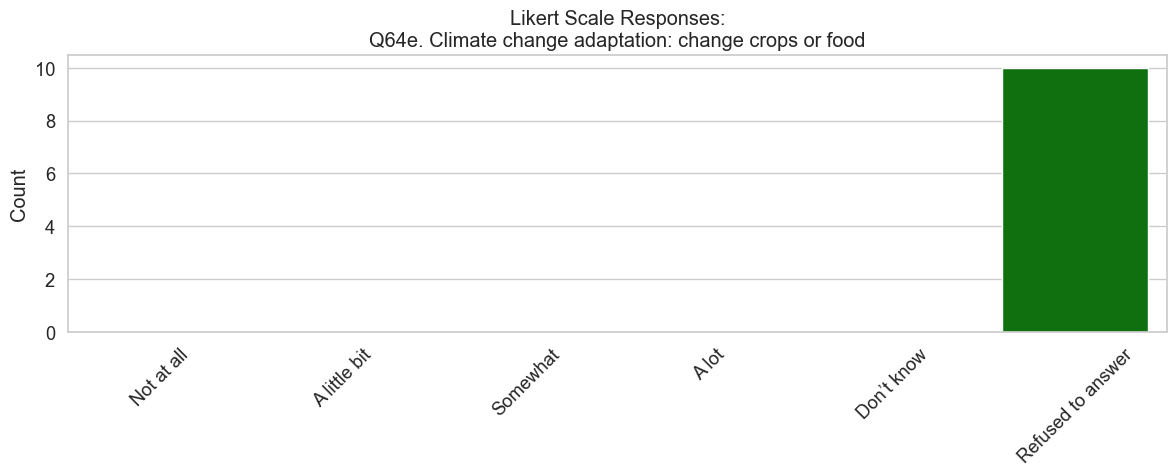


📊 Generating charts for:
Q100. Willing to participate in follow-up surveys



C:\Users\PC\AppData\Local\Temp\ipykernel_18668\3671823272.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


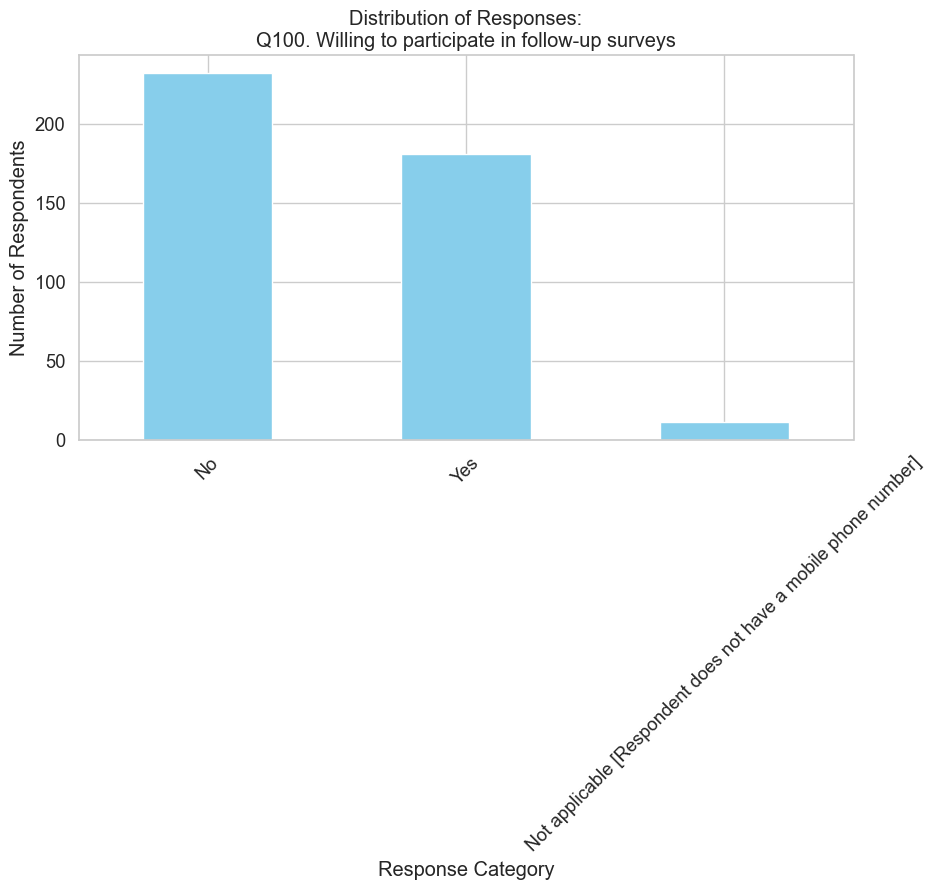

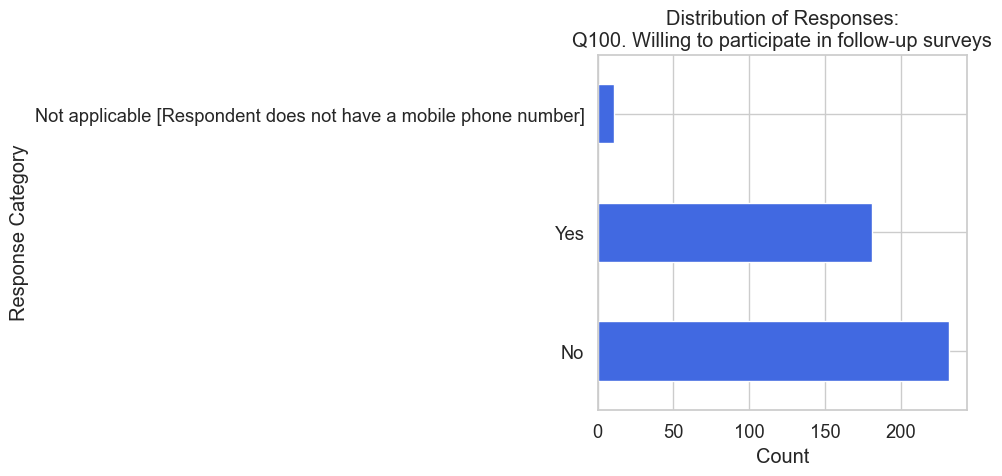

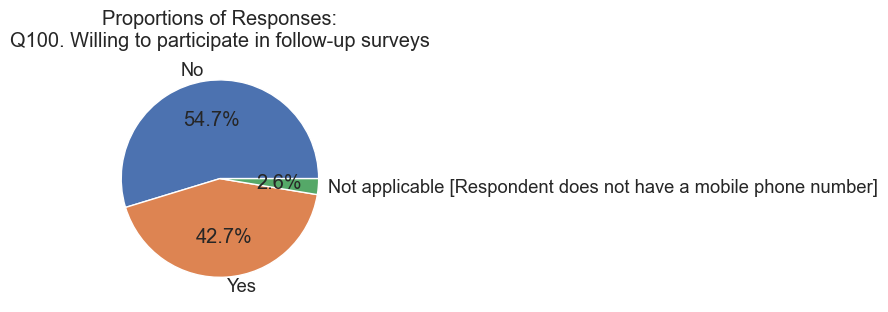


📊 Generating charts for:
Q101. Respondent's gender



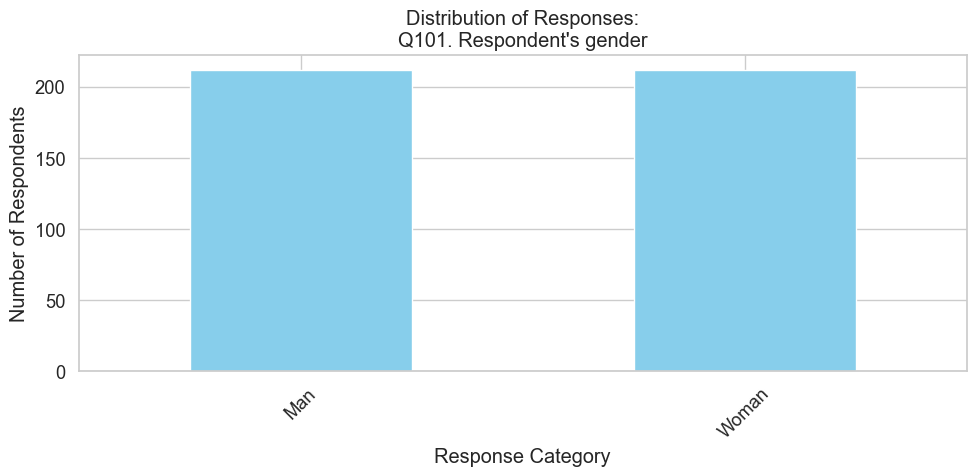

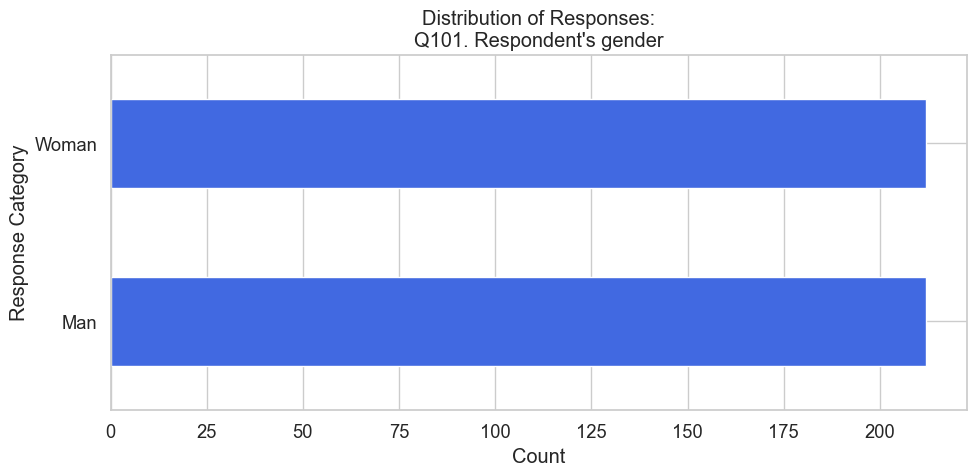

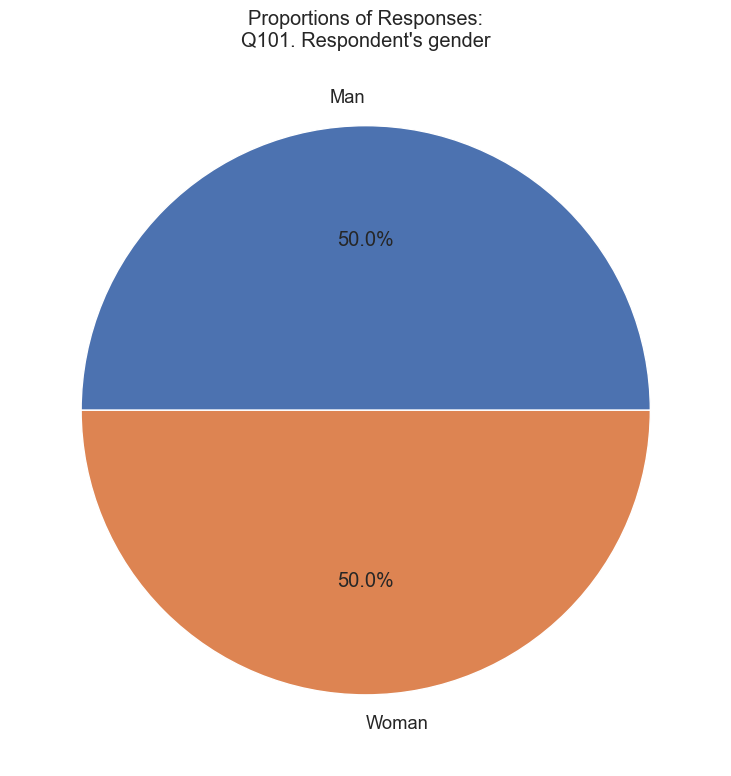


📊 Generating charts for:
Q102. Language of interview



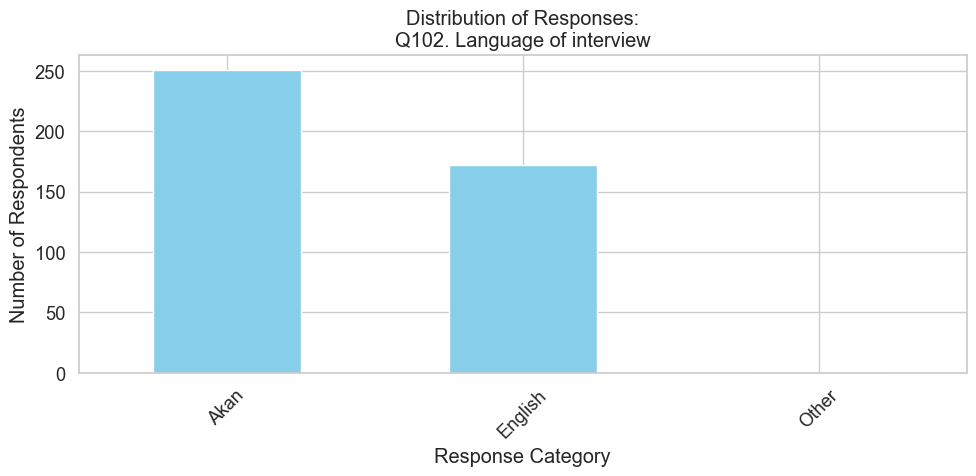

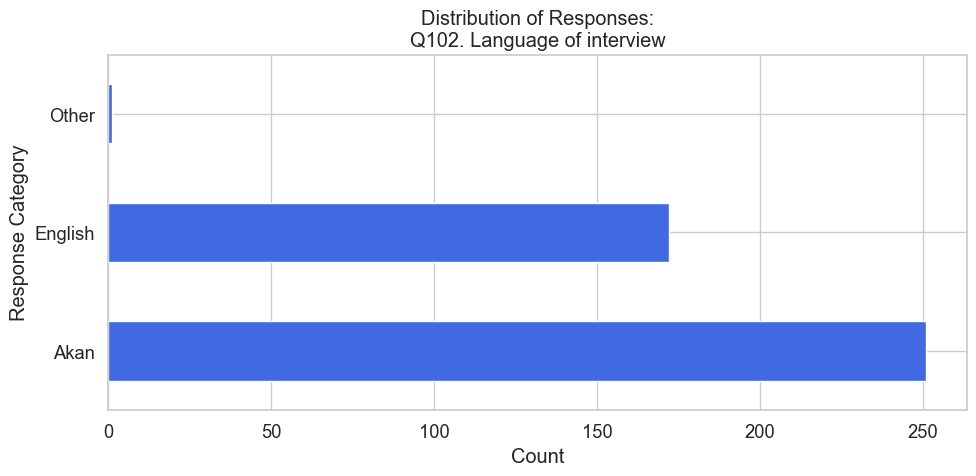

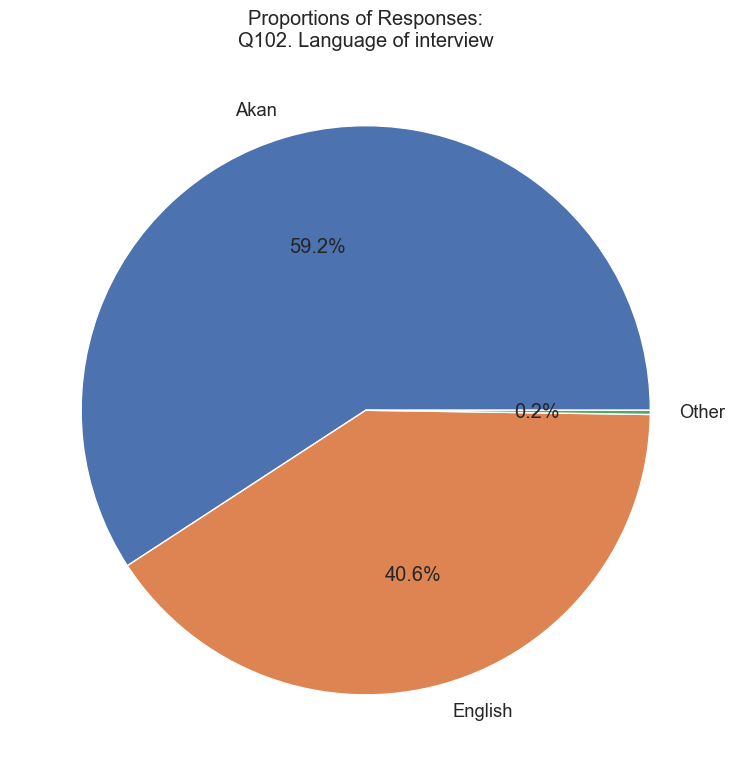


📊 Generating charts for:
Q103. Others present



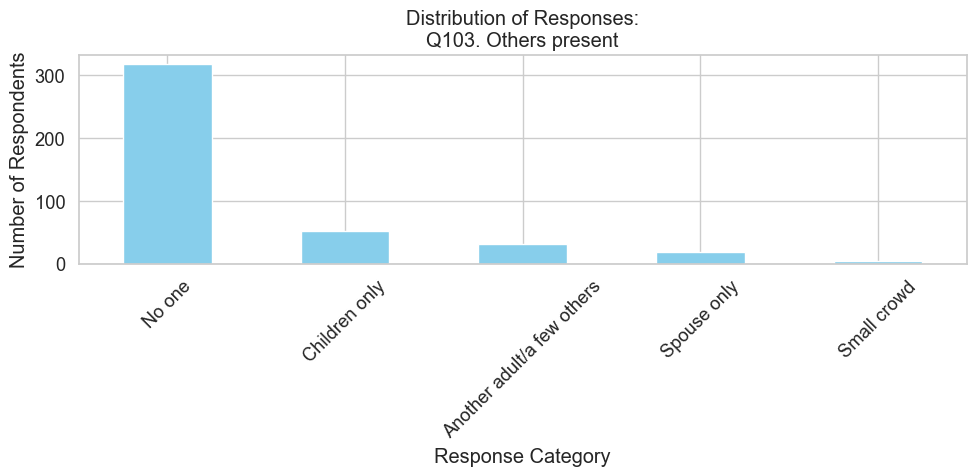

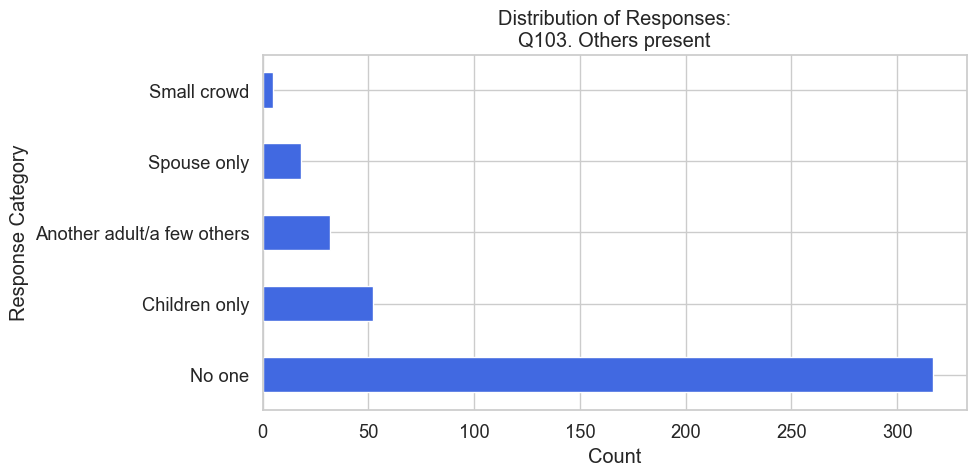

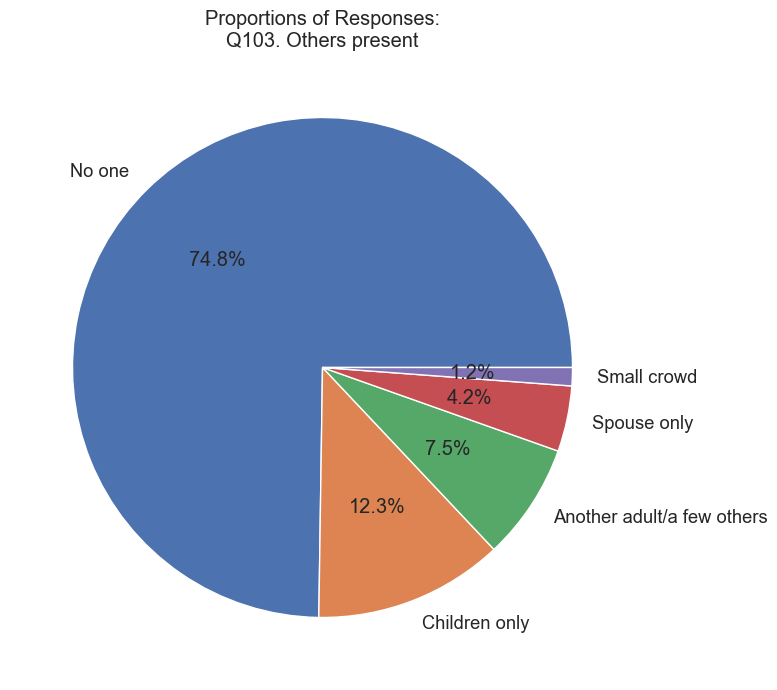


📊 Generating charts for:
Q104a. Check with others



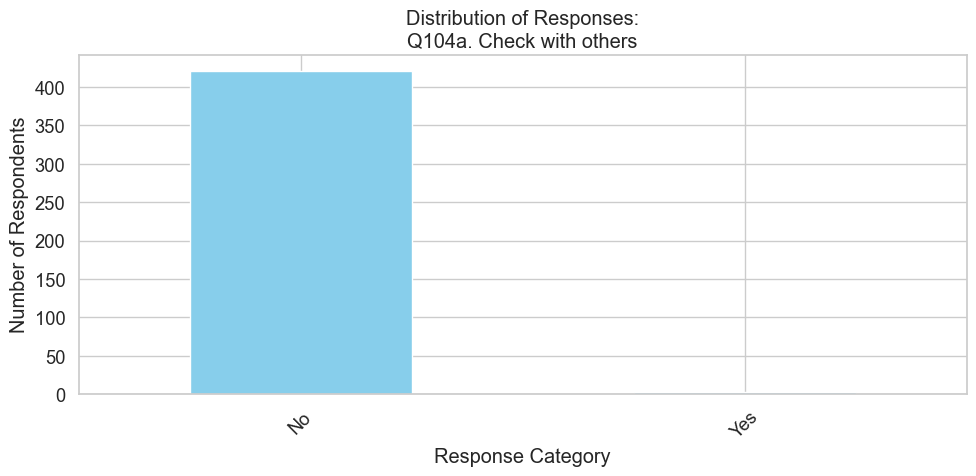

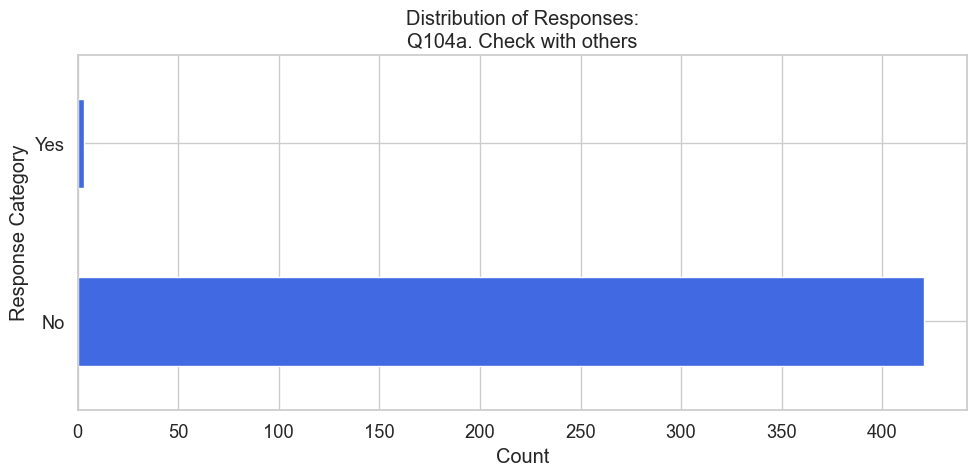

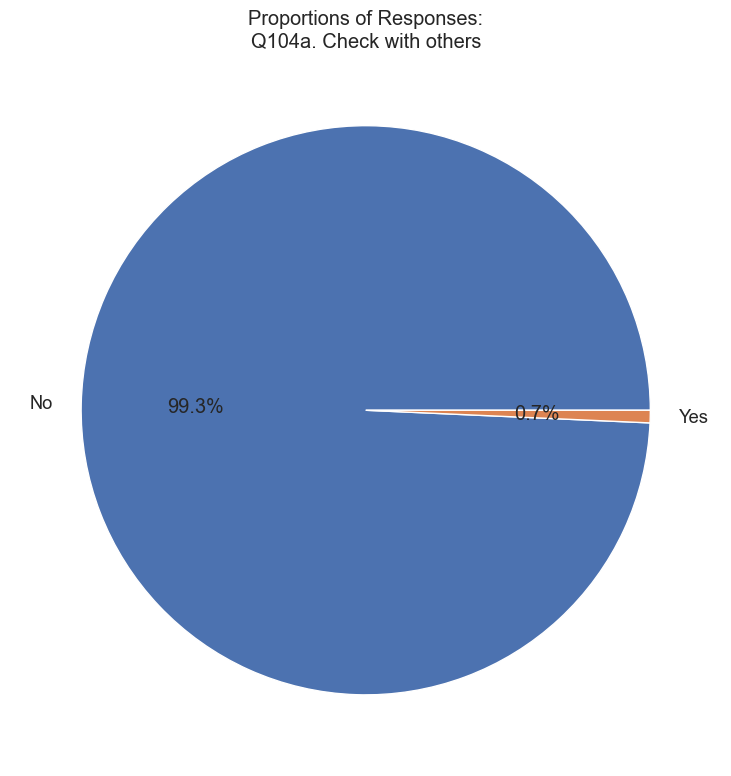


📊 Generating charts for:
Q104b. Influence by others



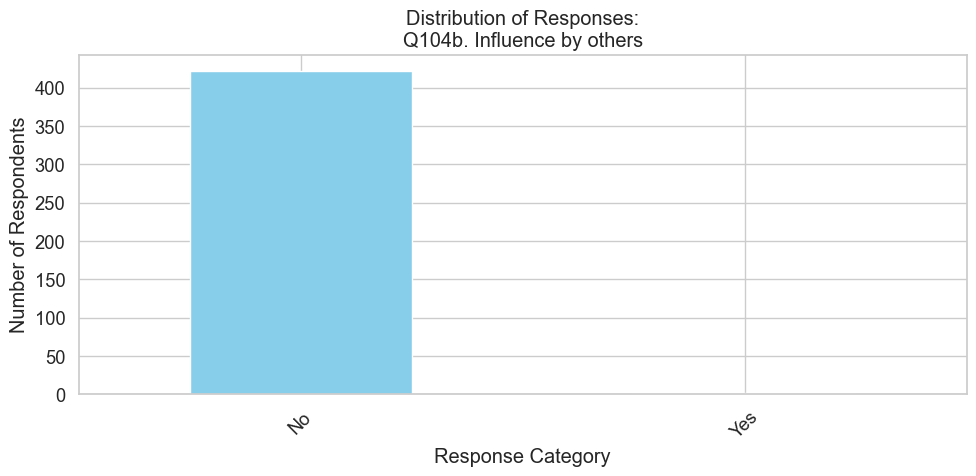

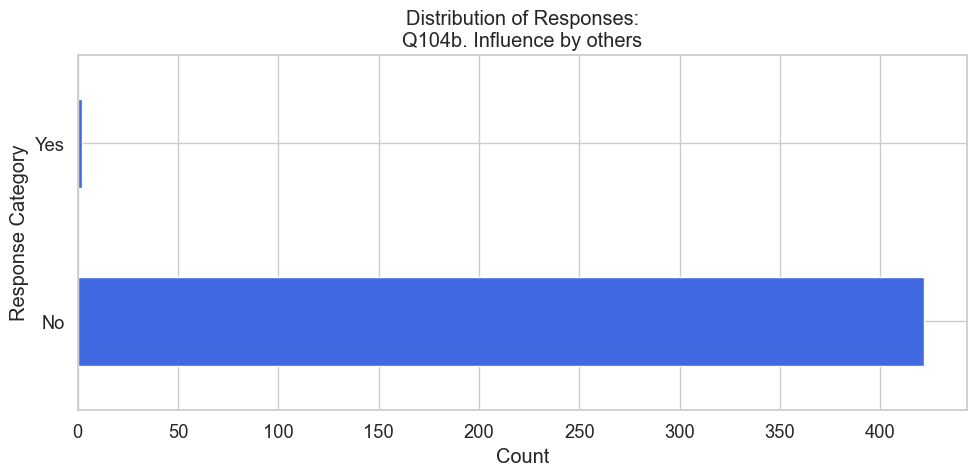

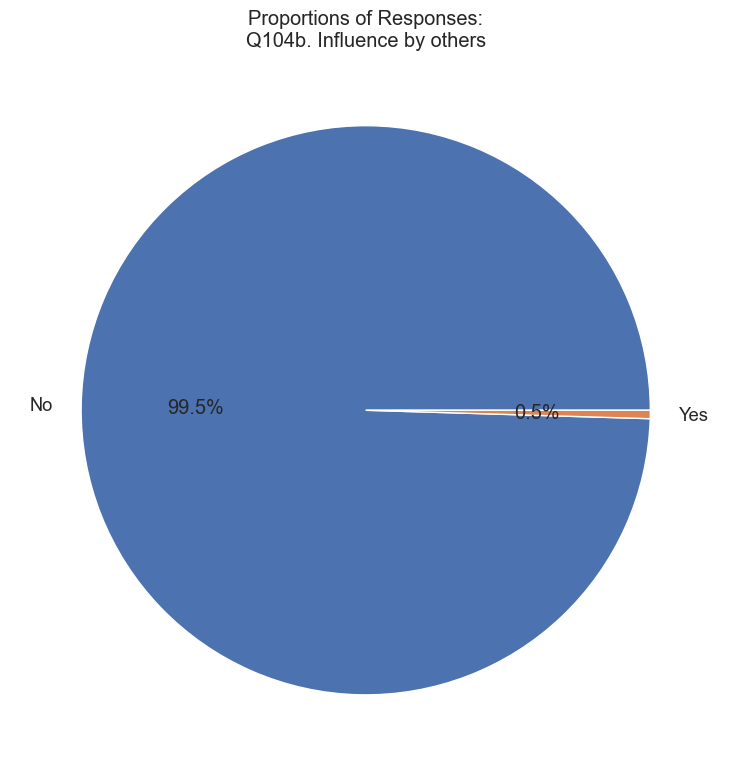


📊 Generating charts for:
Q104c. Approached by community/party representatives



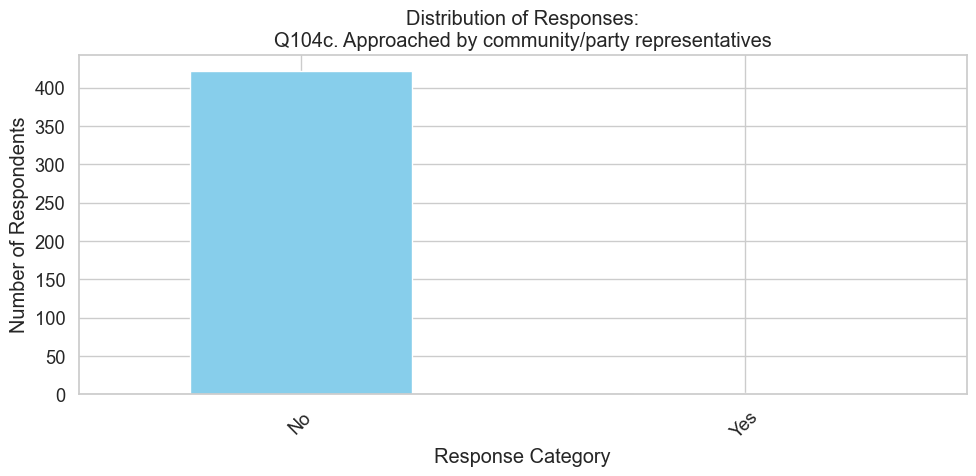

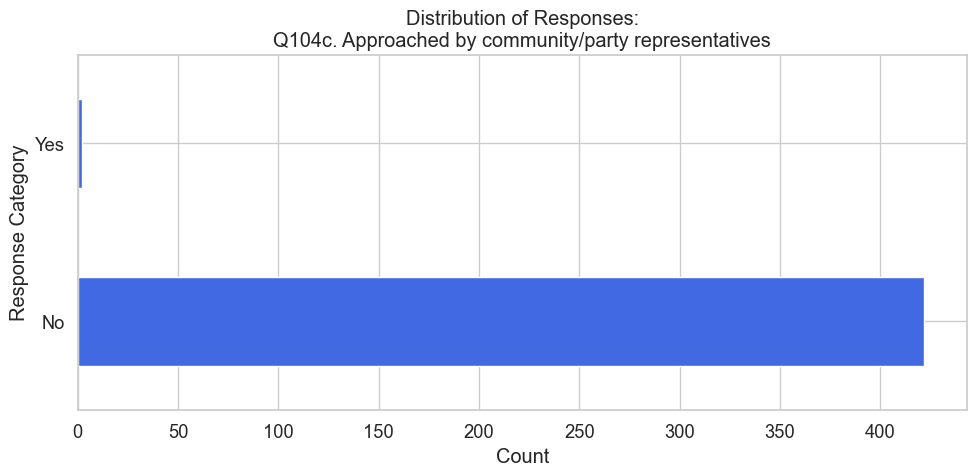

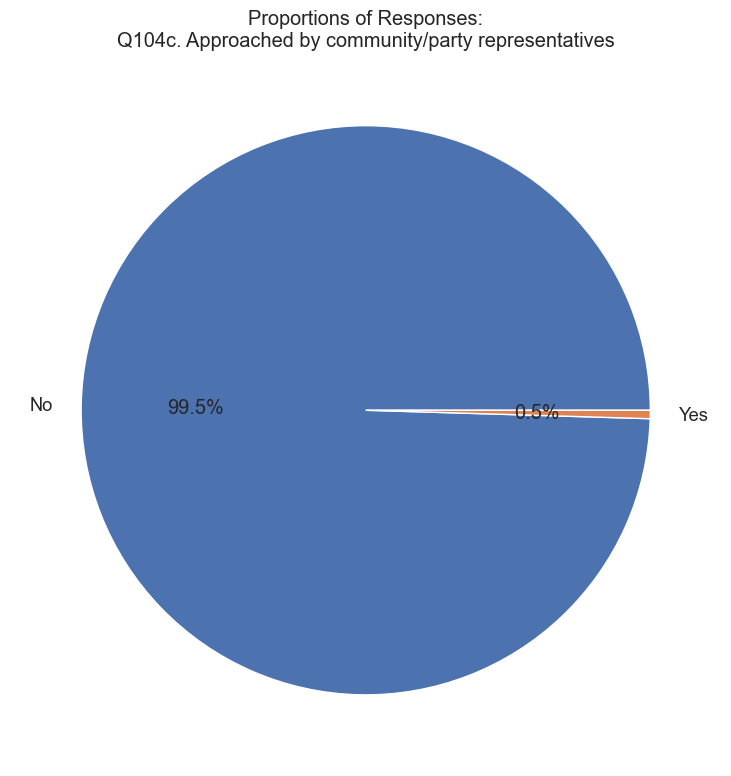


📊 Generating charts for:
Q104d. Feel threatened



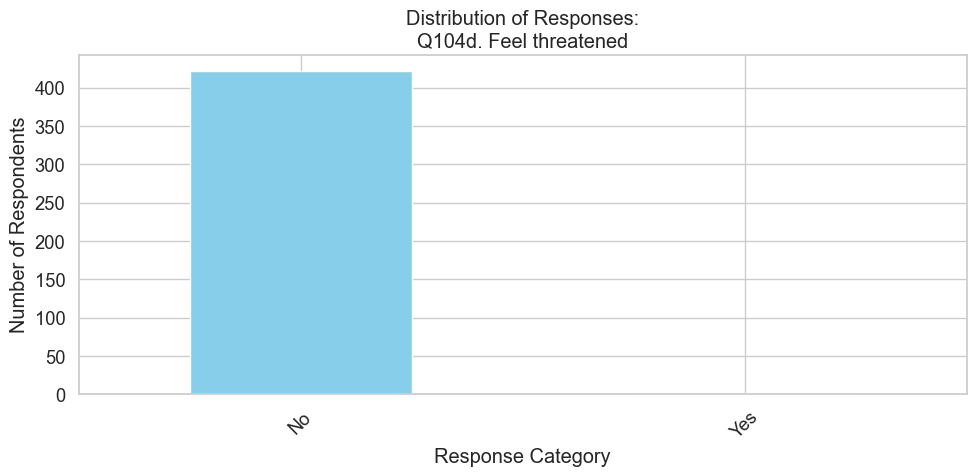

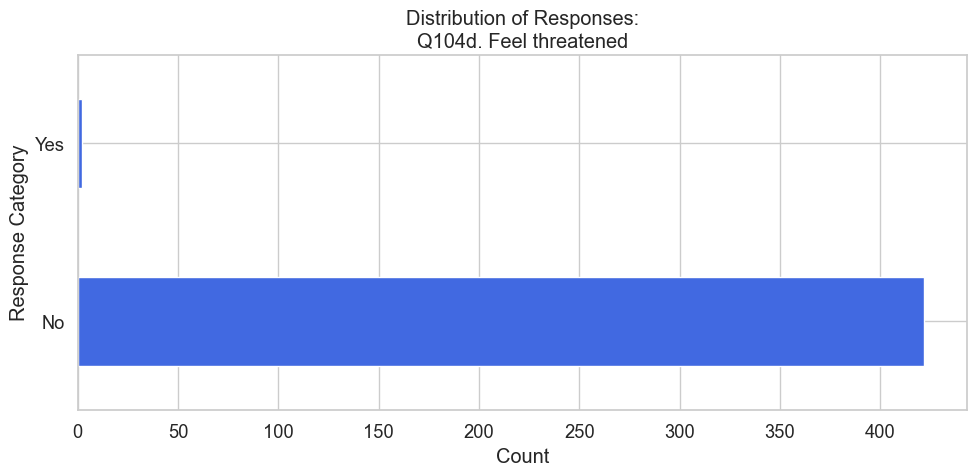

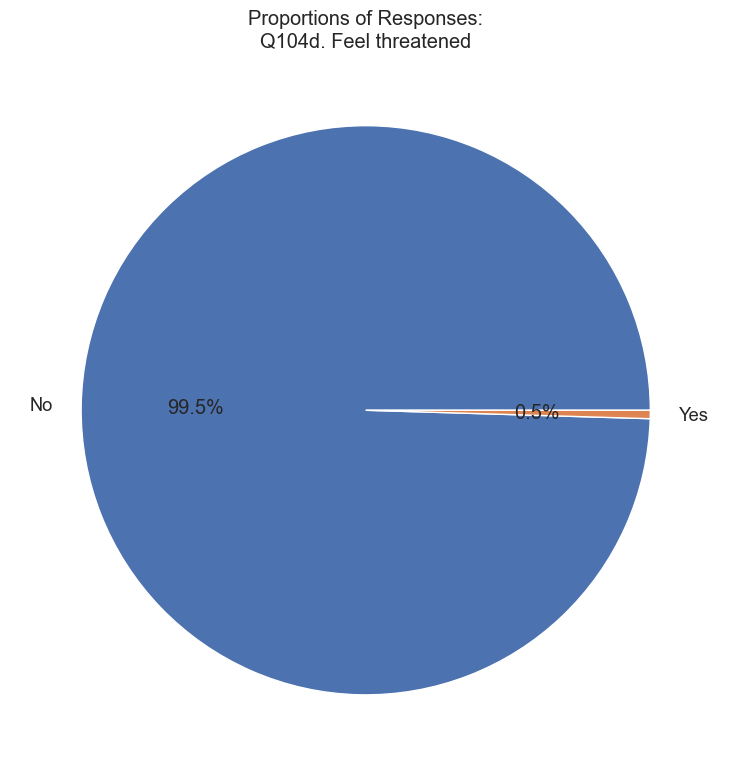


📊 Generating charts for:
Q104e. Physically threatened



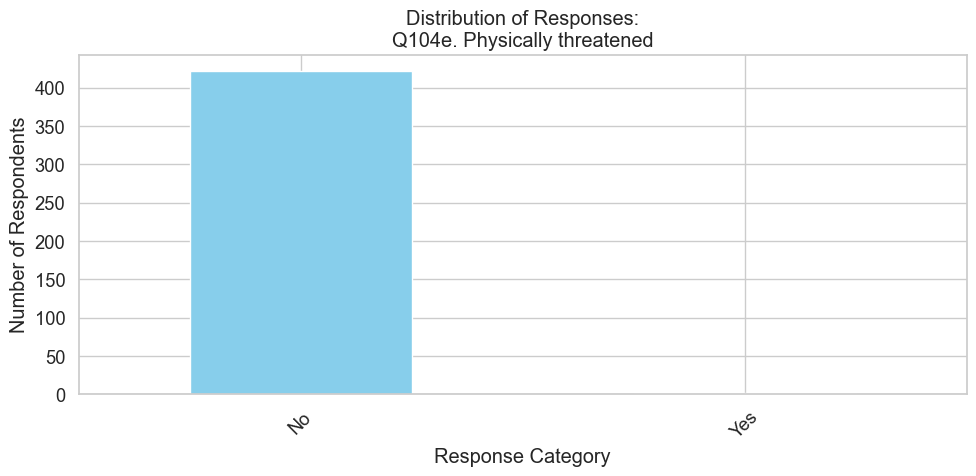

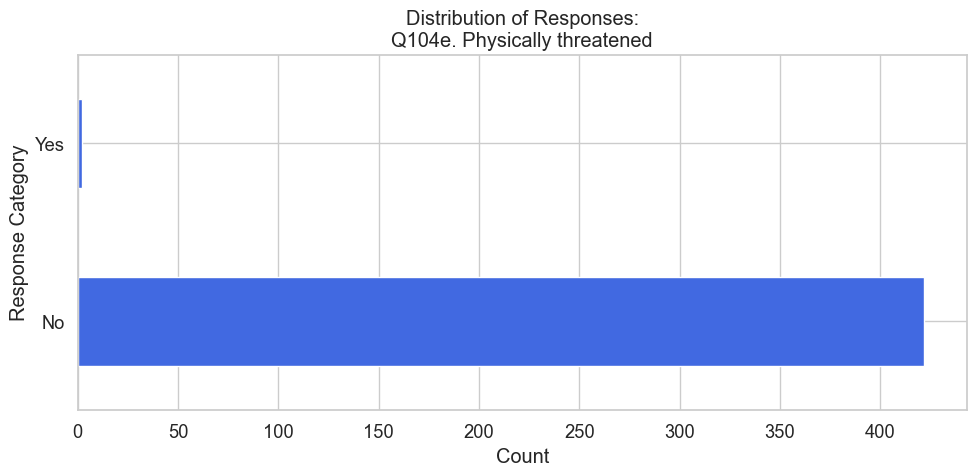

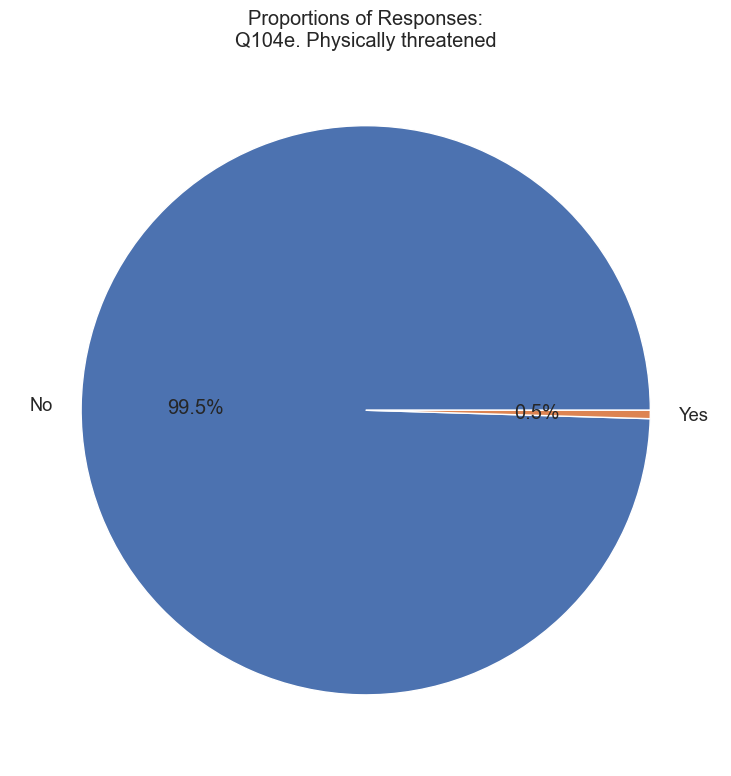

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make graphs nicer
sns.set(style="whitegrid", font_scale=1.2)

# List of human-readable label columns
readable_cols = list(rename_map.values())

# -------------------------------------------------------------------------------------
# 1. BAR CHART (Good for categorical corruption perception questions)
# -------------------------------------------------------------------------------------
def bar_chart(col):
    plt.figure(figsize=(10, 5))
    df_readable[col].value_counts().plot(kind="bar", color="skyblue")
    plt.title(f"Distribution of Responses:\n{col}")
    plt.xlabel("Response Category")
    plt.ylabel("Number of Respondents")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# -------------------------------------------------------------------------------------
# 2. HORIZONTAL BAR CHART (Better when category text is long)
# -------------------------------------------------------------------------------------
def barh_chart(col):
    plt.figure(figsize=(10, 5))
    df_readable[col].value_counts().plot(kind="barh", color="royalblue")
    plt.title(f"Distribution of Responses:\n{col}")
    plt.xlabel("Count")
    plt.ylabel("Response Category")
    plt.tight_layout()
    plt.show()


# -------------------------------------------------------------------------------------
# 3. PIE CHART (Useful for proportion visuals)
# -------------------------------------------------------------------------------------
def pie_chart(col):
    plt.figure(figsize=(8, 8))
    df_readable[col].value_counts().plot(kind="pie", autopct='%1.1f%%')
    plt.title(f"Proportions of Responses:\n{col}")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()


# -------------------------------------------------------------------------------------
# 4. LIKERT STYLE BAR PLOT (Works for: Not at all → A lot)
# -------------------------------------------------------------------------------------
LIKERT_ORDER = [
    "Not at all",
    "A little bit",
    "Somewhat",
    "A lot",
    "Don’t know",
    "Refused to answer"
]

def likert_chart(col):
    counts = df_readable[col].value_counts().reindex(LIKERT_ORDER).fillna(0)

    plt.figure(figsize=(12, 5))
    sns.barplot(x=counts.index, y=counts.values, color="green")
    plt.title(f"Likert Scale Responses:\n{col}")
    plt.ylabel("Count")
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# -------------------------------------------------------------------------------------
# 5. GENERATE ALL GRAPHS
# -------------------------------------------------------------------------------------
for col in readable_cols:
    
    print(f"\n📊 Generating charts for:\n{col}\n")

    # Show bar chart
    bar_chart(col)

    # Horizontal bar chart
    barh_chart(col)

    # Pie chart
    pie_chart(col)

    # Likert chart only if categories fit Likert
    vals = set(df_readable[col].dropna().unique())
    if len(vals & set(LIKERT_ORDER)) > 0:
        likert_chart(col)


In [41]:
# 1️⃣ List all variables in memory
print("All variables in memory:")
print(dir())

# 2️⃣ Check if your dataset is loaded and its type
try:
    print("\nDataset type and info:")
    print(type(Final_Data_Labeled))   # replace with your suspected variable name
    print(Final_Data_Labeled.info())
except NameError:
    print("Variable 'Final_Data_Labeled' not found in current session.")

# 3️⃣ Show first few rows to confirm contents
try:
    print("\nFirst 5 rows of the dataset:")
    print(Final_Data_Labeled.head())
except NameError:
    print("Variable 'Final_Data_Labeled' not found in current session.")

# 4️⃣ List column names to confirm renaming/cleaning
try:
    print("\nColumns in the dataset:")
    print(Final_Data_Labeled.columns.tolist())
except NameError:
    print("Variable 'Final_Data_Labeled' not found in current session.")


All variables in memory:
['ASHANTI_CODE', 'In', 'LIKERT_ORDER', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__session__', '__spec__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i40', '_i41', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'ashanti1', 'ashanti2', 'ast', 'bar_chart', 'barh_chart', 'base', 'base_var', 'col', 'corruption_cols', 'corruption_vars', 'csv_path', 'data_path', 'datasets', 'decoded_df', 'df', 'df_raw', 'df_readable', 'df_renamed', 'exit', 'ext', 'f', 'file', 'files', 'final_df', 'folder', 'freq_table', 'get_ipython', 'governance_cols', 'governance_vars', 'id_vars', 'k', 'keywords', 'label', 'label_cols', 'label_dict', 'labels', 'label

In [42]:
# Save the final cleaned dataset
final_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data_Labeled_Cleaned.csv"

# Save to CSV
df_readable.to_csv(final_path, index=False)

print(f"Final cleaned dataset saved successfully at:\n{final_path}")


Final cleaned dataset saved successfully at:
C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\Final_Data_Labeled_Cleaned.csv


In [43]:
df = pd.read_csv(final_path)


In [44]:
# Filter only Kumasi respondents
kumasi_data = df_readable[df_readable["REGION"] == "Ashanti"]  # Adjust if REGION column name differs


In [46]:
# List all columns in the cleaned dataset
for i, col in enumerate(df_readable.columns):
    print(i, col)


0 RESPNO
1 REGION
2 URBRUR
3 Q70A
4 Q70B
5 Q70C
6 Q71A
7 Q71B
8 Q60A
9 Q60B
10 Q61A
11 Q61B
12 Q62A
13 Q62B
14 Q62C
15 Q62D
16 Q63A
17 Q63B
18 Q63C
19 Q63D
20 Q63E_GHA
21 Q63F_GHA
22 Q64A
23 Q64B
24 Q64C
25 Q64D
26 Q64E
27 Q100
28 Q101
29 Q102
30 Q102Other
31 Q103
32 Q104A
33 Q104B
34 Q104C
35 Q104D
36 Q104E
37 Province or region
38 Urban or Rural Primary Sampling Unit
39 Q70a. Regional organisation recognizes our country's needs/interests
40 Q70b. African Union recognizes our country's needs/interests
41 Q70c. African countries should have greater influence in international bodies
42 Q71a. Considered emigration to other country
43 Q71b. Most likely country for emigration
44 Q60a. Heard about climate change
45 Q60b. Climate change: affecting country
46 Q61a. Climate change: main cause
47 Q61b. Main responsibility for causing climate change
48 Q62a. Government must act now to limit climate change
49 Q62b. Rich countries must act now to limit climate change
50 Q62c. Rich countries should

In [47]:
# Filter Kumasi respondents
kumasi_data = df_readable[df_readable["REGION"] == "Ashanti"]  # Adjust REGION column if needed


In [49]:
# Check exact REGION column name and values
print(df_readable.columns[37])  # check column name
print(df_readable[df_readable.columns[37]].unique())


Province or region
['ASHANTI']


In [50]:
# Filter only Kumasi respondents
kumasi_data = df_readable[df_readable["Province or region"] == "ASHANTI"]

# Check number of rows
print(f"Number of Kumasi respondents: {len(kumasi_data)}")


Number of Kumasi respondents: 424


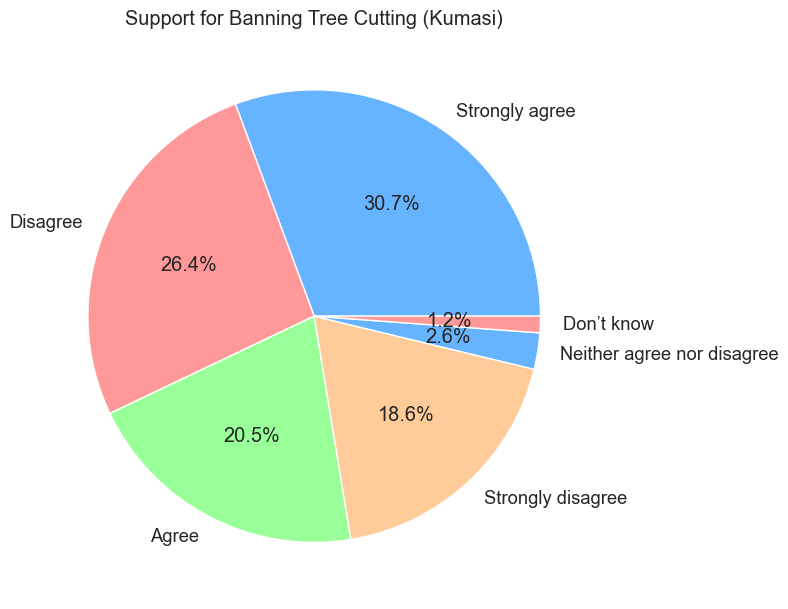

In [52]:
question = "Q63a. Ban tree cutting for firewood/charcoal even if fuel more costly"

plt.figure(figsize=(8,8))
kumasi_data[question].value_counts().plot(
    kind="pie",
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff9999','#99ff99','#ffcc99']
)
plt.title("Support for Banning Tree Cutting (Kumasi)")
plt.ylabel("")
plt.tight_layout()
plt.show()


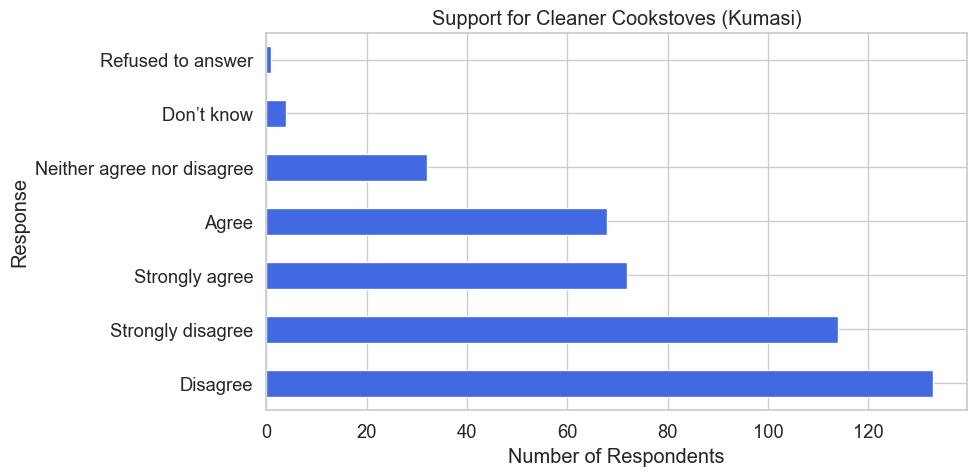

In [53]:
question = "Q63b. Require cleaner fuel cookstoves even if more costly"

plt.figure(figsize=(10,5))
kumasi_data[question].value_counts().plot(kind="barh", color="royalblue")
plt.title("Support for Cleaner Cookstoves (Kumasi)")
plt.xlabel("Number of Respondents")
plt.ylabel("Response")
plt.tight_layout()
plt.show()


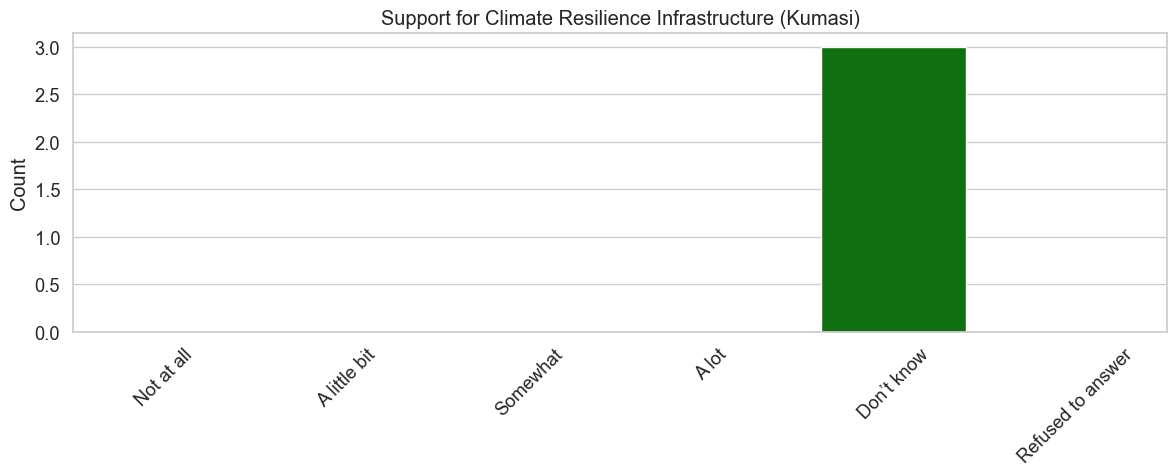

In [54]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.2)

question = "Q63c. Invest in infrastructure for climate resilience"

LIKERT_ORDER = ["Not at all", "A little bit", "Somewhat", "A lot", "Don’t know", "Refused to answer"]

counts = kumasi_data[question].value_counts().reindex(LIKERT_ORDER).fillna(0)

plt.figure(figsize=(12,5))
sns.barplot(x=counts.index, y=counts.values, color="green")
plt.title("Support for Climate Resilience Infrastructure (Kumasi)")
plt.ylabel("Count")
plt.xlabel("")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [55]:
# Keywords to search for
keywords = ["corruption", "government", "reform", "KMA", "trust", "satisfaction"]

# Search for columns containing these keywords (case-insensitive)
relevant_cols = [col for col in df_readable.columns 
                 if any(kw.lower() in col.lower() for kw in keywords)]

print("Relevant columns for corruption and government reform:")
for i, col in enumerate(relevant_cols):
    print(i, col)


Relevant columns for corruption and government reform:
0 Q62a. Government must act now to limit climate change


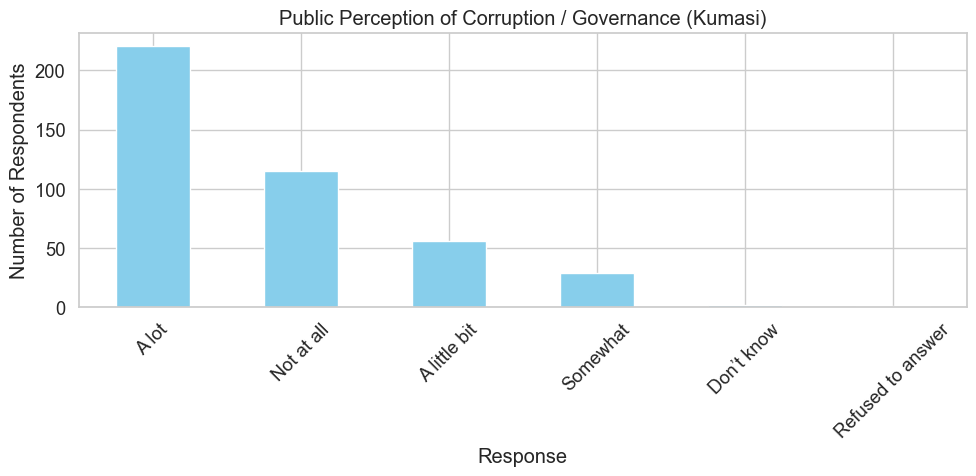

In [58]:
import matplotlib.pyplot as plt

# Filter Kumasi respondents
kumasi_data = df_readable[df_readable["Province or region"] == "ASHANTI"]

# Use the actual column name from your dataset
question = "Q71a. Considered emigration to other country"  # replace with the correct column you want

plt.figure(figsize=(10,5))
kumasi_data[question].value_counts().plot(kind="bar", color="skyblue")
plt.title("Public Perception of Corruption / Governance (Kumasi)")
plt.xlabel("Response")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


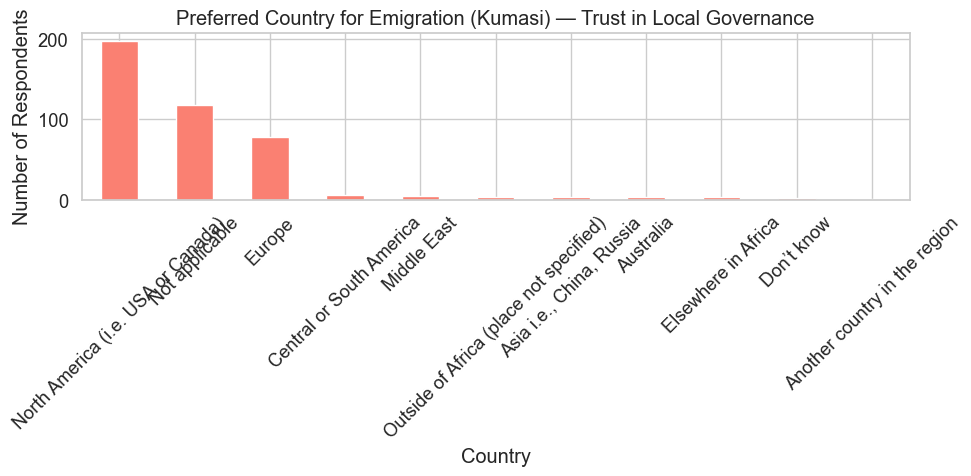

In [59]:
question = "Q71b. Most likely country for emigration"

plt.figure(figsize=(10,5))
kumasi_data[question].value_counts().plot(kind="bar", color="salmon")
plt.title("Preferred Country for Emigration (Kumasi) — Trust in Local Governance")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


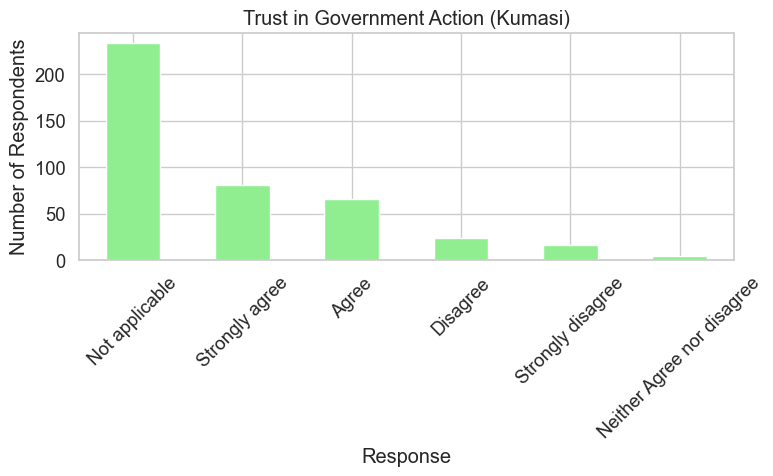

In [60]:
question = "Q62a. Government must act now to limit climate change"

plt.figure(figsize=(8,5))
kumasi_data[question].value_counts().plot(kind="bar", color="lightgreen")
plt.title("Trust in Government Action (Kumasi)")
plt.xlabel("Response")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


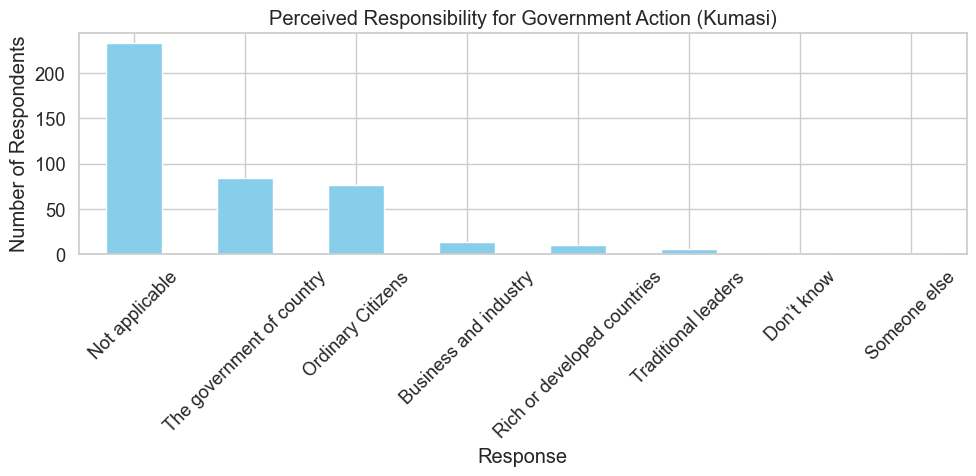

In [61]:
question = "Q62d. Who primarily responsible for limiting climate change"

plt.figure(figsize=(10,5))
kumasi_data[question].value_counts().plot(kind="bar", color="skyblue")
plt.title("Perceived Responsibility for Government Action (Kumasi)")
plt.xlabel("Response")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
# ==========================================================
# Python script to create a README.md file for GitHub
# ==========================================================

# Path where you want to save the README
readme_path = r"C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\README.md"

# Content for the README file
readme_content = """
# Public Opinion on Corruption and Government Reform Efforts in Kumasi Metropolitan Assembly

## Project Overview
This project analyzes survey data on public perceptions of corruption and government reform efforts in the Kumasi Metropolitan Assembly (KMA), Ashanti region, Ghana.

## Dataset
The analysis uses a dataset containing 424 respondents from Ashanti region with demographic details and responses to questions on corruption, governance, and trust in government.

## Analysis
- Summary statistics for relevant variables (perception of corruption, trust in government, responsibility for reform).
- Four super-relevant graphs visualizing public opinion in Kumasi.
- Interpretations and linkages to current literature.

## Findings
- Over 50% of respondents consider emigration due to perceived corruption.
- Moderate trust in government reform initiatives.
- Citizens perceive both government and ordinary citizens as responsible for reform efforts.

## Literature References
1. Anyanwu, J. C. (2022). *Perceptions of governance and emigration intentions in urban Ghana.*
2. Ayee, J. R. A. (2021). *Local governance reforms and citizen trust in Ghanaian cities.*
3. Gyimah-Boadi, E. (2021). *Corruption and political accountability in Ghana.*
4. Boafo-Arthur, K. (2020). *Citizen perception of government reforms in Ghana.*
5. Osei-Tutu, E., & Adu-Gyamfi, A. (2023). *Urban governance and trust in local authorities.*

## How to Run
1. Open the Python notebook or script in your environment.
2. Ensure the dataset (`Final_Data_Labeled_Cleaned.csv`) is in the same directory.
3. Run the analysis scripts to reproduce tables and figures.

## Author
Your Name
"""

# Write the README content to the file
with open(readme_path, "w", encoding="utf-8") as file:
    file.write(readme_content)

print(f"README.md has been created successfully at:\n{readme_path}")


README.md has been created successfully at:
C:\Users\PC\OneDrive\Desktop\New folder (2)\Ella\README.md
